For Capstone Project My topic is "DEMAND FORECASTING"

Now I have the data of one of the world's largest retail chains which has 76 stores & 28 unique products
 
My aim is to Forecast the sales values of those products for the next 12 weeks
 
so let's start


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

THESE ARE REQUIRED LIBRARIES TILL NOW 

ANYTHING NEED WE SHOULD IMPORT IT ON THAT STAGE

FOR NOW THIS IS WHAT IT IS

Read the Data

In [2]:
data=pd.read_csv(r"C:\Users\Soumadeep\Desktop\BIA DOCUMENTS\CAPSTONE PROJECT\train.csv")
data

record_ID      week  store_id  sku_id  total_price  base_price  \
0               1  17/01/11      8091  216418      99.0375    111.8625   
1               2  17/01/11      8091  216419      99.0375     99.0375   
2               3  17/01/11      8091  216425     133.9500    133.9500   
3               4  17/01/11      8091  216233     133.9500    133.9500   
4               5  17/01/11      8091  217390     141.0750    141.0750   
...           ...       ...       ...     ...          ...         ...   
150145     212638  09/07/13      9984  223245     235.8375    235.8375   
150146     212639  09/07/13      9984  223153     235.8375    235.8375   
150147     212642  09/07/13      9984  245338     357.6750    483.7875   
150148     212643  09/07/13      9984  547934     141.7875    191.6625   
150149     212644  09/07/13      9984  679023     234.4125    234.4125   

        is_featured_sku  is_display_sku  units_sold  
0                     0               0          20  
1                     0               0          28  
2                     0               0          19  
3                     0               0          44  
4                     0               0          52  
...                 ...             ...         ...  
150145                0               0          38  
150146                0               0          30  
150147                1               1          31  
150148                0               1          12  
150149                0               0          15  

[150150 rows x 9 columns]

This is our data

now if we see carefully we can easily understand that this is mixed up

As we concern about products so we need the forecasted sales of every unique product

let's do it

In [3]:
products=data['sku_id'].unique()
products
print(len(products),'&',products)

28 & [216418 216419 216425 216233 217390 219009 219029 223245 223153 300021
 219844 222087 320485 378934 222765 245387 245338 547934 300291 217217
 217777 398721 679023 546789 600934 545621 673209 327492]


SO WE SEE THAT THERE ARE 28 UNIQUE PRODUCTS IN THE DATA & THEY HAVE UNIQUE ID

In [4]:
data.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

IT SHOWS THE DATA TYPES OF ALL COLUMNS PRESENT IN OUR GIVEN DATA

WE CAN EASILY IDENTIFY THAT WEEK COLUMN HERE EXISTS AS AN OBJECT

BUT WE HAVE TO CONVERT IT TO DATE

In [5]:
data['date']=pd.to_datetime(data['week'])
data.drop(['week'], axis=1, inplace=True)
data

record_ID  store_id  sku_id  total_price  base_price  is_featured_sku  \
0               1      8091  216418      99.0375    111.8625                0   
1               2      8091  216419      99.0375     99.0375                0   
2               3      8091  216425     133.9500    133.9500                0   
3               4      8091  216233     133.9500    133.9500                0   
4               5      8091  217390     141.0750    141.0750                0   
...           ...       ...     ...          ...         ...              ...   
150145     212638      9984  223245     235.8375    235.8375                0   
150146     212639      9984  223153     235.8375    235.8375                0   
150147     212642      9984  245338     357.6750    483.7875                1   
150148     212643      9984  547934     141.7875    191.6625                0   
150149     212644      9984  679023     234.4125    234.4125                0   

        is_display_sku  units_sold       date  
0                    0          20 2011-01-17  
1                    0          28 2011-01-17  
2                    0          19 2011-01-17  
3                    0          44 2011-01-17  
4                    0          52 2011-01-17  
...                ...         ...        ...  
150145               0          38 2013-09-07  
150146               0          30 2013-09-07  
150147               1          31 2013-09-07  
150148               1          12 2013-09-07  
150149               0          15 2013-09-07  

[150150 rows x 9 columns]

In [6]:
data.dtypes

record_ID                   int64
store_id                    int64
sku_id                      int64
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
units_sold                  int64
date               datetime64[ns]
dtype: object

NOW THE PROBLEM OF DATE IS SOLVED AS IT BECOME DATETIME DATA TYPE

In [7]:
data.set_index('date', inplace=True)
data

record_ID  store_id  sku_id  total_price  base_price  \
date                                                               
2011-01-17          1      8091  216418      99.0375    111.8625   
2011-01-17          2      8091  216419      99.0375     99.0375   
2011-01-17          3      8091  216425     133.9500    133.9500   
2011-01-17          4      8091  216233     133.9500    133.9500   
2011-01-17          5      8091  217390     141.0750    141.0750   
...               ...       ...     ...          ...         ...   
2013-09-07     212638      9984  223245     235.8375    235.8375   
2013-09-07     212639      9984  223153     235.8375    235.8375   
2013-09-07     212642      9984  245338     357.6750    483.7875   
2013-09-07     212643      9984  547934     141.7875    191.6625   
2013-09-07     212644      9984  679023     234.4125    234.4125   

            is_featured_sku  is_display_sku  units_sold  
date                                                     
2011-01-17                0               0          20  
2011-01-17                0               0          28  
2011-01-17                0               0          19  
2011-01-17                0               0          44  
2011-01-17                0               0          52  
...                     ...             ...         ...  
2013-09-07                0               0          38  
2013-09-07                0               0          30  
2013-09-07                1               1          31  
2013-09-07                0               1          12  
2013-09-07                0               0          15  

[150150 rows x 8 columns]

HERE WE SET THE DATES AS OUR INDEX

As we take care of each product individually so we have to extract our data for only that product that means we have to extract the total sales of that product on a particular date & have to do further work on that data

Our forecasted sales values will be come that dataframe

SO THERE YOU GO

In [8]:
# PRODUCT-1: ID-216418
data1=data.where(data['sku_id']==216418)
data1=data1.dropna()
data1=data1.groupby(['date'])[['units_sold']].sum()
data1

units_sold
date                  
2011-01-08      4695.0
2011-01-17      5732.0
2011-01-24      6735.0
2011-01-31      6092.0
2011-02-05      5050.0
...                ...
2013-09-04      5965.0
2013-09-07      5706.0
2013-11-06      6506.0
2013-12-02      7107.0
2013-12-03      6205.0

[130 rows x 1 columns]

In [9]:
# in the dates there is no pattern & there are missing values
# that's why we resample the data & use forward fill the new date values with previous one
data1=data1.resample('W').ffill()
data1

units_sold
date                  
2011-01-09      4695.0
2011-01-16      4695.0
2011-01-23      5732.0
2011-01-30      6735.0
2011-02-06      5050.0
...                ...
2013-11-10      6506.0
2013-11-17      6506.0
2013-11-24      6506.0
2013-12-01      6506.0
2013-12-08      6205.0

[153 rows x 1 columns]

AS WE USE "FFILL" METHOD TO FILL THE MISSING DATES SO THERE WILL BE HIGH BIAS WHICH AFFECT OUR FORECAST CERTAINLY

SO WE HAVE TO SMOOTH THE DATA BEFORE FORECASTING

In [10]:
data1['rolling_mean'] = data1['units_sold'].rolling(window=2).mean()
data1.drop(['units_sold'], axis=1, inplace=True)
data1

rolling_mean
date                    
2011-01-09           NaN
2011-01-16        4695.0
2011-01-23        5213.5
2011-01-30        6233.5
2011-02-06        5892.5
...                  ...
2013-11-10        6106.0
2013-11-17        6506.0
2013-11-24        6506.0
2013-12-01        6506.0
2013-12-08        6355.5

[153 rows x 1 columns]

A rolling average smoothing method is a statistical technique used to analyze data points by creating a series of averages of different selections of the full data set. It is also called a moving average or running average.

The rolling average smoothing method is used to smooth out short-term fluctuations and highlight longer-term trends or cycles in time series data.The method works by calculating the mean of a fixed subset of the number series, then modifying the subset by “shifting forward” and recalculating the mean. This process is repeated until all data points have been included in at least one subset.

 NOW WE SEE THE DATA IS SMOOTHED BY ROLLING AVERAGE METHOD BUT THERE WILL BE SOME NAN VALUES
 
 WE FILL THOSE NAN VALUES BY MEAN

Rolling averages are a powerful tool used by businesses, investors, and analysts in order to track and manage market trends, forecast future results, and make better decisions. A rolling average is a statistical technique that smooths out short-term fluctuations in data and provides a more accurate view of the overall trend

In [11]:
data1['rolling_mean'] = data1['rolling_mean'].fillna(data1['rolling_mean'].mean())
data1

rolling_mean
date                    
2011-01-09       5989.75
2011-01-16       4695.00
2011-01-23       5213.50
2011-01-30       6233.50
2011-02-06       5892.50
...                  ...
2013-11-10       6106.00
2013-11-17       6506.00
2013-11-24       6506.00
2013-12-01       6506.00
2013-12-08       6355.50

[153 rows x 1 columns]

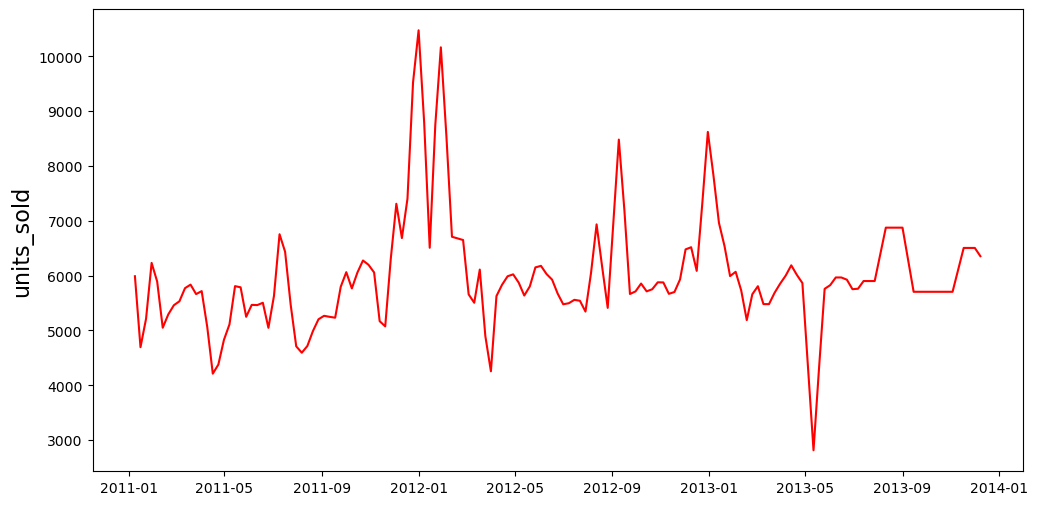

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data1['rolling_mean'], color='red')
plt.ylabel('units_sold', fontsize=16)
plt.show()

THIS IS THE PLOT WHICH IS COMING FROM THE DATA

THIS IS THE PLOT OF TOTAL SALES OVER TIME OF THE PRODUCT 216418

NO WE DO AUGMENTED DICKEY-FULLER TEST TO CHECK THIS DATA IS STATIONARY OR NOT

IF THE p-VALUE GETS HIGHER THAN 0.05 THEN THE DATA WILL BE NON-STATIONARY OTHERWISE THE DATA WILL BE STATIONARY

IF THE DATA BECOME NON-STATIONARY WE HAVE TO MAKE IT STATIONARY FIRST

WE DESCRIBE THE METHODS OF MAKING NON-STATIONARY DATA TO STATIONARY ON THAT AREA WHERE WE GET NON-STATIONARY TIME SERIES DATA

In [13]:
from statsmodels.tsa.stattools import adfuller
# NECESSARY LIBRARY FOR DOING AUGMENTED DICKEY-FULLER TEST
result = adfuller(data1['rolling_mean'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.046815
p-value: 0.001184


THE p-VALUE BECOME LESS THAN 0.05 SO OUR DATA(FOR PRODUCT ID - 216418) IS STATIONARY

NOW WE DRAW THE PARTIAL AUTO CORRELATION PLOT & AUTO CORRELATION PLOT

Autocorrelation is a statistical method used to measure the similarity between a time series and a lagged version of itself over successive time intervals. 
It is used to identify patterns and trends in time series data that would otherwise go unnoticed

Partial autocorrelation is a statistical method used to measure the correlation between a time series and a lagged version of itself after controlling for the effects of the other lags. 

It is used to identify patterns and trends in time series data that would otherwise go unnoticed.

In fitting ARIMA model those plots are so useful  as from partial auto correlation plot we can get the order of AR process & from auto correlation plot we get the order of MA process

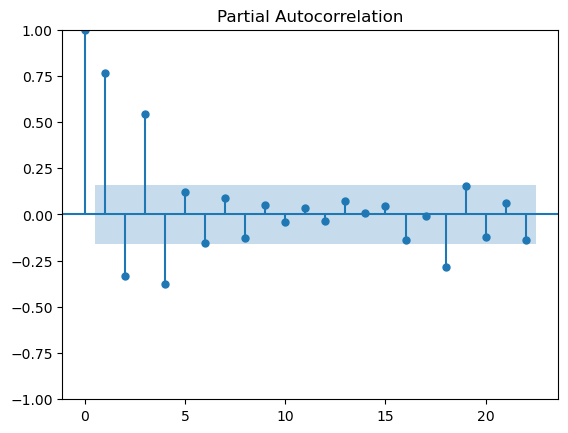

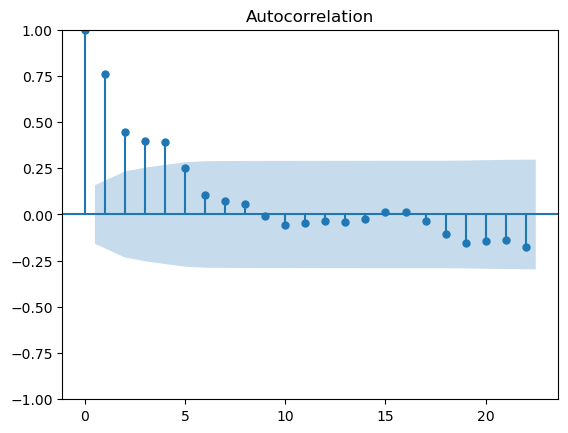

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # NECESSARY LIBRARY FOR DOING ACF & PACF PLOT
plot_pacf(data1)
plot_acf(data1)
plt.show()

NOW WE SEE THAT THERE IS A WAVE LIKE STRUCTURE COME IN OUR ACF PLOT 

THAT MEANS IT CONTAINS SOME SORT OF SEASONAL COMPONENT

SO WE HAVE TO FIT SARIMA THEN

The Akaike Information Criterion (AIC) lets you test how well your model fits the data set without over-fitting it.

The AIC score rewards models that achieve a high goodness-of-fit score and penalizes them if they become overly complex.

By itself, the AIC score is not of much use unless it is compared with the AIC score of a competing model.

The model with the lower AIC score is expected to strike a superior balance between its ability to fit the data set and its ability to avoid over-fitting the data set.



Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. The BIC resolves this problem by introducing a penalty term for the number of parameters in the model. The penalty term is larger in BIC than in AIC.

The models can be tested using corresponding BIC values. Lower BIC value indicates lower penalty terms hence a better model.



In [15]:
# FITTING THE MODEL 
from pmdarima import auto_arima
model=auto_arima(data1,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 2)   Log Likelihood               -1166.445
Date:                            Sun, 15 Oct 2023   AIC                           2342.890
Time:                                    10:36:15   BIC                           2358.042
Sample:                                01-09-2011   HQIC                          2349.045
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1845.4169    446.666      4.132      0.000     969.967    2720.867
ar.L1          0.7931      0.051     15.449      0.000       0.692       0.894
ma.L1          0.6401      0.072      8.877      0.000       0.499       0.781
ar.S.L2       -0.4837      0.068     -7.156      0.000      -0.616      -0.351
sigma2      2.409e+05   2.07e+04     11.615      0.000       2e+05    2.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               141.35
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.87
Prob(H) (two-sided):                  0.34   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX(1, 0, 1)x(1, 0, 2) is our forecasting model

now we forecast using this model

In [16]:
# FORECASTING BY THE MODEL & MAKE A DATAFRAME OF IT
forecast1=pd.DataFrame(model.predict(12))
forecast1.rename(columns={0:'216418_forecast'},inplace=True)
forecast1

216418_forecast
2013-12-15      6150.202975
2013-12-22      6144.546762
2013-12-29      6181.626716
2014-01-05      6135.023802
2014-01-12      6077.961368
2014-01-19      6069.469596
2014-01-26      6072.458160
2014-02-02      6057.048050
2014-02-09      6040.124265
2014-02-16      6035.302106
2014-02-23      6033.752259
2014-03-02      6028.363969

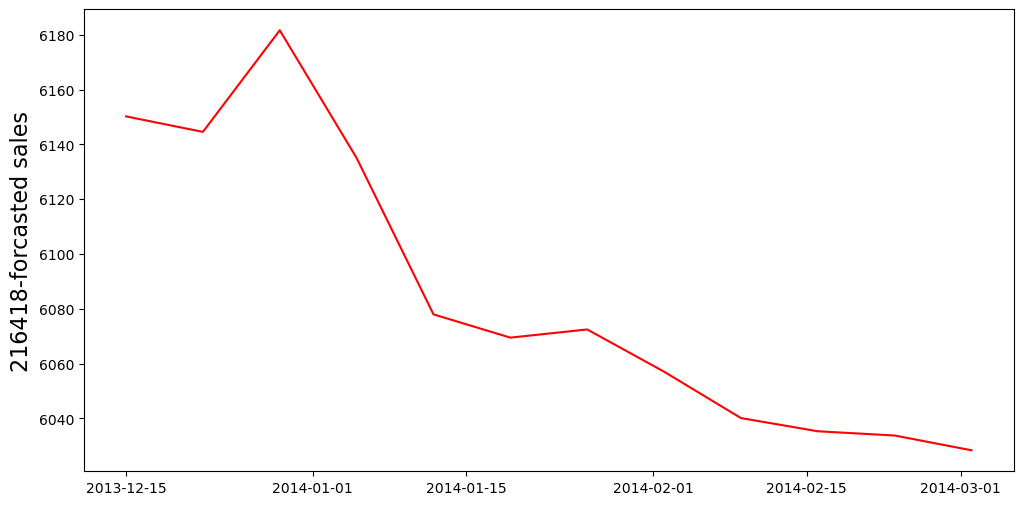

In [17]:
# MAKE A PLOT OF THE FORECASTED SALES   
plt.figure(figsize=(12,6))
plt.plot(forecast1, color='red')
plt.ylabel('216418-forcasted sales', fontsize=16)
plt.show()

This whole work we do on other 27 products as well individually 

So for making our work a little bit easy we create some functions so that we can save some time


In [18]:
# Function 1
i=0
def create_data(i):
    if i in products:
        data_i=data.where(data['sku_id']==i)
        data_i=data_i.dropna()
        data_i=data_i.groupby(['date'])[['units_sold']].sum() 
        data_i=data_i.resample('W').ffill()
        data_i['rolling_mean'] = data_i['units_sold'].rolling(window=2).mean()
        data_i.drop(['units_sold'], axis=1, inplace=True)
        data_i['rolling_mean'] = data_i['rolling_mean'].fillna(data_i['rolling_mean'].mean())
        return data_i
    else:
        print('INVALID PRODUCT ID')

#  this function gives our extracted data on which we apply our time series operations

In [19]:
# Function 2
i=0
def plot(i):
    plt.figure(figsize=(12,6))
    plt.ylabel('units_sold', fontsize=16)
    if i in products:
        return plt.plot(create_data(i),color='red')
    else:
        print('INVALID PRODUCT ID')

  # This function gives the plot of total number of sales over time of the particular product      

In [20]:
#Function 3
from statsmodels.tsa.stattools import adfuller
i=0
def dickey_fuller(i):
    if i in products:
        result = adfuller(create_data(i))
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
    else:
        print('INVALID PRODUCT ID')
# This function gives us the augmented dickey-fuller test results of the sales over time data of a particuler data
# By this we can interprete that the data is stationary or not

In [21]:
#Function 4
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # NECESSARY LIBRARY FOR DOING ACF & PACF PLOT
i=0
def corr_plot(i):
    if i in products:
        plot_pacf(create_data(i))
        plot_acf(create_data(i))
        return plt.show()
    else:
        print('INVALID PRODUCT ID')

# PRODUCT-2: ID-216419

In [22]:
data2=create_data(216419)
data2

rolling_mean
date                    
2011-01-09   4694.960526
2011-01-16   4502.000000
2011-01-23   5422.000000
2011-01-30   6873.000000
2011-02-06   6146.500000
...                  ...
2013-11-10   4132.500000
2013-11-17   4323.000000
2013-11-24   4323.000000
2013-12-01   4323.000000
2013-12-08   4619.500000

[153 rows x 1 columns]

ADF Statistic: -2.781243
p-value: 0.061003


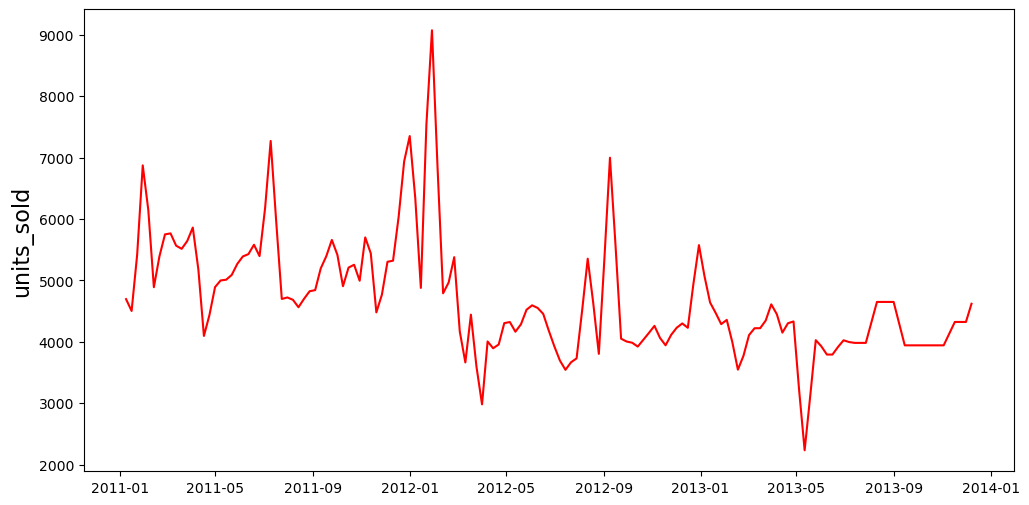

In [23]:
plot(216419)
dickey_fuller(216419)

AS p-VALUE IS GREATER THAN 0.05 SO THIS DATA IS NON-STATIONARY

SO WE HAVE TO MAKE IT STATIONARY BEFORE FORECASTING

In [24]:
data2_diff=data2.diff().dropna()# DOING 1ST ORDER DIFFERENCING
result = adfuller(data2_diff)
p_value= result[1]
p_value

4.141109873999349e-07

AS NOW p-VALUE BECOME LESS THAN 0.05 SO OUR DATA BECOME STATIONARY AFTER DONG DIFFERENCING OF ORDER 1

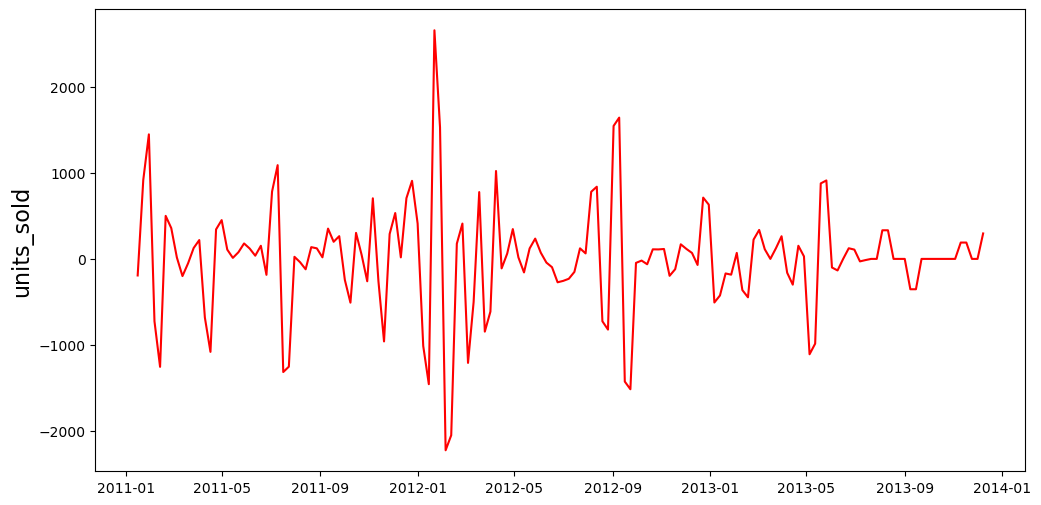

In [25]:
plt.figure(figsize=(12,6))
plt.ylabel('units_sold', fontsize=16)
plt.plot(data2_diff,color='red')

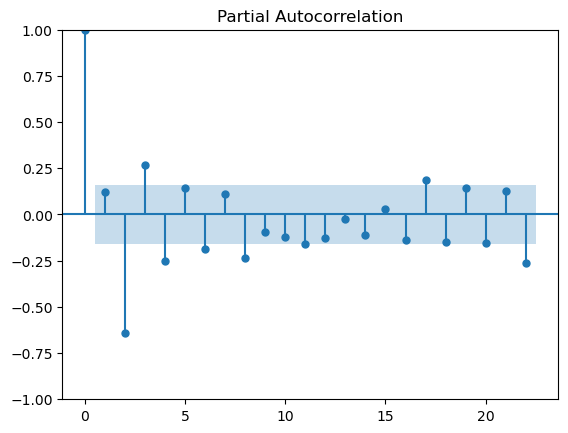

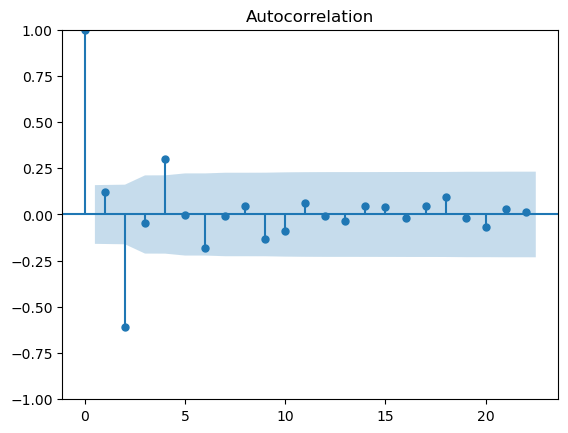

In [26]:
plot_pacf(data2_diff)
plot_acf(data2_diff)
plt.show()

AS THERE IS NO WAVE LIKE PATTERN IN THE ACF PLOT THEN HERE WE FIT ARIMA MODEL

In [27]:
from statsmodels.tsa.arima.model import ARIMA #NECESSARY LIBRARY FOR FITTING ARMA OR ARIMA
model1 = ARIMA(data2_diff,order=(2,1,2))
model2=ARIMA(data2_diff,order=(2,1,4))
model3=ARIMA(data2_diff,order=(3,1,2))
model4=ARIMA(data2_diff,order=(3,1,4))
model5=ARIMA(data2_diff,order=(4,1,2))
model6=ARIMA(data2_diff,order=(4,1,4))
model7=ARIMA(data2_diff,order=(8,1,2))
model8=ARIMA(data2_diff,order=(8,1,4))
model9=ARIMA(data2_diff,order=(22,1,2))
model10=ARIMA(data2_diff,order=(22,1,4))

model1_fit=model1.fit()
model2_fit=model2.fit()
model3_fit=model3.fit()
model4_fit=model4.fit()
model5_fit=model5.fit()
model6_fit=model6.fit()
model7_fit=model7.fit()
model8_fit=model8.fit()
model9_fit=model9.fit()
model10_fit=model10.fit()

print('AIC:',model1_fit.aic,',','BIC:',model1_fit.bic)
print('AIC:',model2_fit.aic,',','BIC:',model2_fit.bic)
print('AIC:',model3_fit.aic,',','BIC:',model3_fit.bic)
print('AIC:',model4_fit.aic,',','BIC:',model4_fit.bic)
print('AIC:',model5_fit.aic,',','BIC:',model5_fit.bic)
print('AIC:',model6_fit.aic,',','BIC:',model6_fit.bic)
print('AIC:',model7_fit.aic,',','BIC:',model7_fit.bic)
print('AIC:',model8_fit.aic,',','BIC:',model8_fit.bic)
print('AIC:',model9_fit.aic,',','BIC:',model9_fit.bic)
print('AIC:',model10_fit.aic,',','BIC:',model10_fit.bic)

C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

AIC: 2290.624209735759 , BIC: 2305.7106089198337
AIC: 2286.309230335085 , BIC: 2307.4301891927894
AIC: 2282.951840493687 , BIC: 2301.0555195145766
AIC: 2286.1240358109944 , BIC: 2310.2622745055137
AIC: 2284.750996816052 , BIC: 2305.8719556737565
AIC: 2295.0574302909827 , BIC: 2322.212948822317
AIC: 2291.7824057389435 , BIC: 2324.9724839439077
AIC: 2293.632111907238 , BIC: 2332.856749785832
AIC: 2301.17437156116 , BIC: 2376.606367481533
AIC: 2300.649202514918 , BIC: 2382.115758108921


WE GET THE LOWEST AIC ON MODEL 3 THAT IS ARiMA(3,1,2)

WE TAKE THAT MODEL FOR FORECASTING 

In [28]:
prediction_info2=model3_fit.forecast(12)
prediction_info2=(prediction_info2+data2['rolling_mean'][-1])
forecast2=pd.DataFrame(prediction_info2)
forecast2.rename(columns={'predicted_mean':'216419_forecast'},inplace=True)
forecast2

216419_forecast
2013-12-15      4745.621679
2013-12-22      4407.860569
2013-12-29      4562.251613
2014-01-05      4717.568880
2014-01-12      4658.361226
2014-01-19      4562.572155
2014-01-26      4593.833978
2014-02-02      4645.902017
2014-02-09      4632.294853
2014-02-16      4602.812033
2014-02-23      4608.934453
2014-03-02      4625.243806

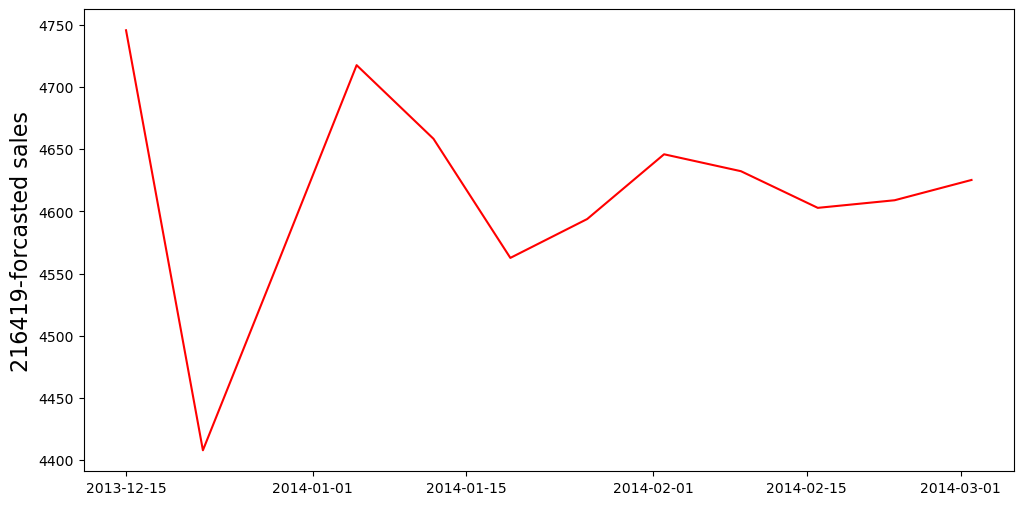

In [29]:
plt.figure(figsize=(12,6))
plt.plot(prediction_info2, color='red')
plt.ylabel('216419-forcasted sales', fontsize=16)
plt.show()

# PROCEEDING SIMILARLY FOR OTHER PRODUCTS

SO THE PLAN IS AS FOLLOWS:
1. AT FIRST WE JUST EXTRACT THE SALES DATA FOR THAT PARTICULER PRODUCT ID
2. AS THE DATA HAS SO MANY MISSING DATES SO WE FILL THE MISSING DATES BY "ffill" METHOD
3. AS THAT METHOD CREATES A HIGH BIAS SO WE HAVE TO SMOOTH THE DATA TO TACKLE THAT BIAS. FOR SMOOTHING WE USE HERE ROLLING AVERAGE SMOOTHING
4. NOW SEE THE DATA IS STATIONARY OR NOT BY AUGMENTED DICKEY FULLER TEST
5. IF p-VALUE < 0.05 THEN THE DATA IS STATIONARY & WE GO AHEAD. BUT IF p-VALUE>0.05 THEN THE DATA IS NON-STATIONARY & THEN WE HAVE TO MAKE IT STATIONARY FIRST BY DIFFERENCING.
6. WE PLOT THE ACF & PACF ON THE STATIONARY DATA & WATCH FOR ACF PLOT TO SEE ANY WAVE LIKE PATTERN. IF THERE IS A WAVE PATTERN THEN WE CONCLUDE THAT THERE IS A SEASONAL COMPONENT PRESENT IN OUR DATA & WE HAVE TO FIT SARIMA MODEL. OTHERWISE WE GO AHEAD WITH ARIMA MODEL.
7. LASTLY WE FORECAST USING THAT ARIMA/SARIMA MODEL FOR NEXT 12 WEEKS & SAVE THEM AS A DATAFRAME & ALSO PLOT THEM TO SEE THE BEHAVIOUR

# PRODUCT 3 : ID-216425

In [30]:
data3=create_data(216425)
data3

rolling_mean
date                    
2011-01-09   2223.944079
2011-01-16   1726.000000
2011-01-23   1913.000000
2011-01-30   2052.500000
2011-02-06   2002.500000
...                  ...
2013-11-10   2539.000000
2013-11-17   2539.000000
2013-11-24   2539.000000
2013-12-01   2539.000000
2013-12-08   2761.000000

[153 rows x 1 columns]

ADF Statistic: -2.087280
p-value: 0.249660


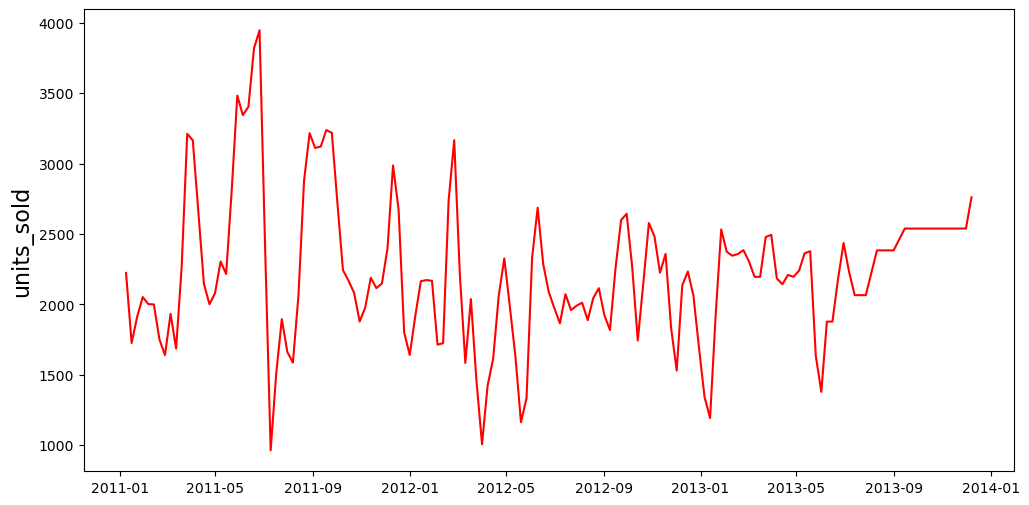

In [31]:
plot(216425)
dickey_fuller(216425)

In [32]:
data3_diff=data3.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data3_diff)
p_value= result[1]
p_value

0.001035492049658861

Text(0, 0.5, 'units_sold')

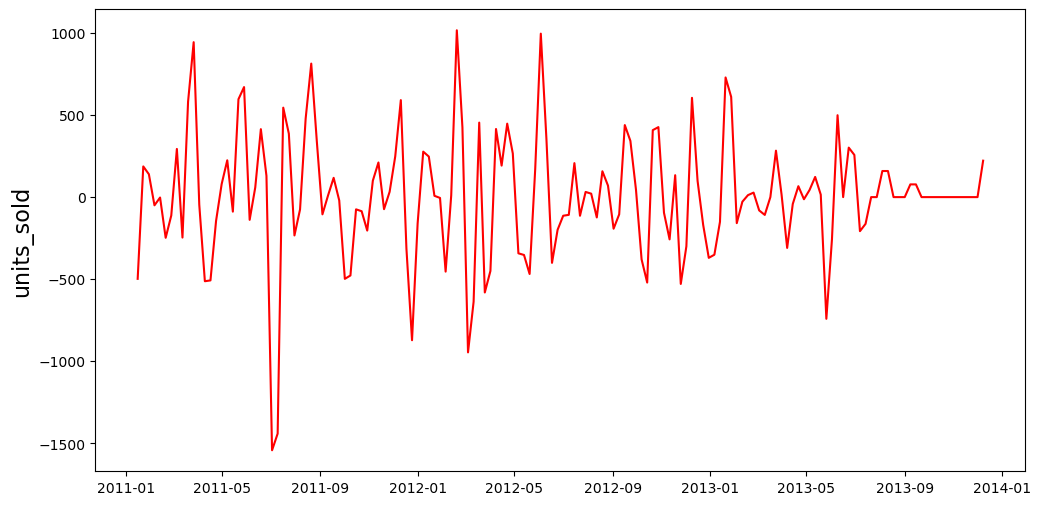

In [33]:
plt.figure(figsize=(12,6))
plt.plot(data3_diff, color='red')
plt.ylabel('units_sold', fontsize=16)

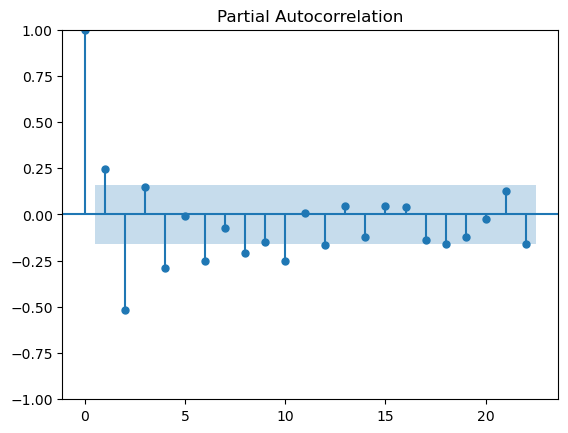

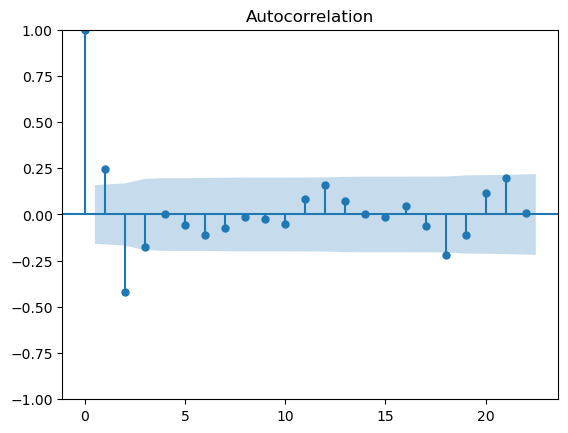

In [34]:
plot_pacf(data3_diff)
plot_acf(data3_diff)
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA #NECESSARY LIBRARY FOR FITTING ARMA OR ARIMA
model1 = ARIMA(data3_diff,order=(1,1,1))
model2=ARIMA(data3_diff,order=(1,1,2))
model3=ARIMA(data3_diff,order=(2,1,1))
model4=ARIMA(data3_diff,order=(2,1,2))
model5=ARIMA(data3_diff,order=(4,1,1))
model6=ARIMA(data3_diff,order=(4,1,2))
model7=ARIMA(data3_diff,order=(6,1,1))
model8=ARIMA(data3_diff,order=(6,1,2))
model9=ARIMA(data3_diff,order=(8,1,1))
model10=ARIMA(data3_diff,order=(8,1,2))
model11=ARIMA(data3_diff,order=(10,1,1))
model12=ARIMA(data3_diff,order=(10,1,2))
model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()
model6_fit = model6.fit()
model7_fit = model7.fit()
model8_fit = model8.fit()
model9_fit = model9.fit()
model10_fit = model10.fit()
model11_fit = model11.fit()
model12_fit = model12.fit()
print('AIC:',model1_fit.aic,',','BIC:',model1_fit.bic)
print('AIC:',model2_fit.aic,',','BIC:',model2_fit.bic)
print('AIC:',model3_fit.aic,',','BIC:',model3_fit.bic)
print('AIC:',model4_fit.aic,',','BIC:',model4_fit.bic)
print('AIC:',model5_fit.aic,',','BIC:',model5_fit.bic)
print('AIC:',model6_fit.aic,',','BIC:',model6_fit.bic)
print('AIC:',model7_fit.aic,',','BIC:',model7_fit.bic)
print('AIC:',model8_fit.aic,',','BIC:',model8_fit.bic)
print('AIC:',model9_fit.aic,',','BIC:',model9_fit.bic)
print('AIC:',model10_fit.aic,',','BIC:',model10_fit.bic)
print('AIC:',model11_fit.aic,',','BIC:',model11_fit.bic)
print('AIC:',model12_fit.aic,',','BIC:',model12_fit.bic)

AIC: 2223.9382390925257 , BIC: 2232.9900786029702
AIC: 2162.971641417217 , BIC: 2175.040760764477
AIC: 2180.6017035813675 , BIC: 2192.6708229286273
AIC: 2155.535110440588 , BIC: 2170.621509624663
AIC: 2167.475209237379 , BIC: 2185.5788882582688
AIC: 2153.59251728053 , BIC: 2174.7134761382345
AIC: 2162.5948942017967 , BIC: 2186.733132896316
AIC: 2152.7009481022696 , BIC: 2179.8564666336038
AIC: 2160.4913248099683 , BIC: 2190.6641231781177
AIC: 2149.9952144538374 , BIC: 2183.1852926588017
AIC: 2151.990378316906 , BIC: 2188.1977363586852
AIC: 2143.253137924199 , BIC: 2182.477775802793


FROM THE VALUES OF AIC WE EASILY MARK THAT ARiMA(10,1,2) MODEL WILL BE BEST MODEL FOR THIS DATA

In [36]:
prediction_info3=model12_fit.forecast(12)
prediction_info3=(prediction_info3+data3['rolling_mean'][-1])
forecast3=pd.DataFrame(prediction_info3)
forecast3.rename(columns={'predicted_mean':'216425_forecast'},inplace=True)
forecast3

216425_forecast
2013-12-15      2904.495756
2013-12-22      2612.853861
2013-12-29      2672.750979
2014-01-05      2757.711617
2014-01-12      2758.818203
2014-01-19      2738.720955
2014-01-26      2756.375793
2014-02-02      2759.263763
2014-02-09      2780.325934
2014-02-16      2778.440215
2014-02-23      2776.975447
2014-03-02      2824.292294

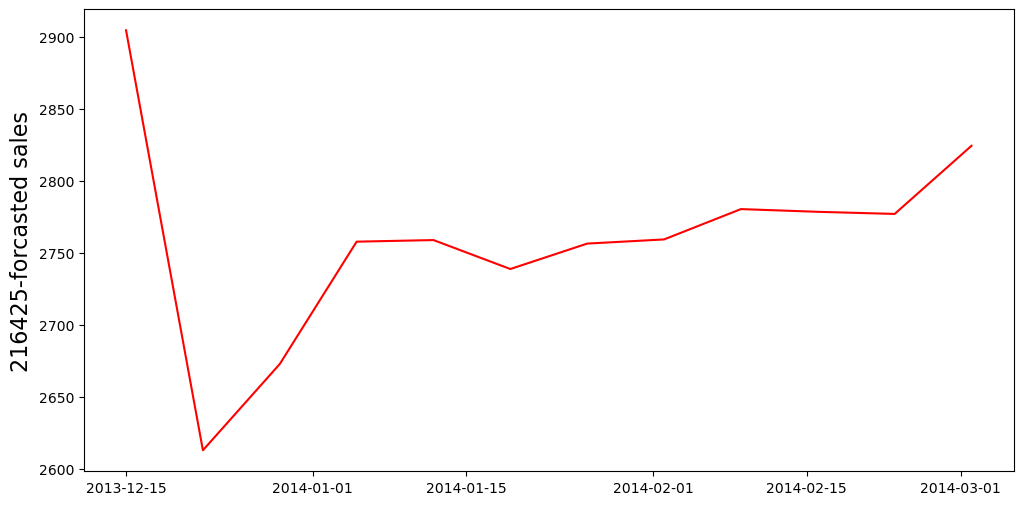

In [37]:
plt.figure(figsize=(12,6))
plt.plot(forecast3, color='red')
plt.ylabel('216425-forcasted sales', fontsize=16)
plt.show()

# PRODUCT 4 : ID-216233

In [38]:
data4=create_data(216233)
data4

rolling_mean
date                    
2011-01-09   3378.740132
2011-01-16   3578.000000
2011-01-23   3337.500000
2011-01-30   2967.000000
2011-02-06   2722.000000
...                  ...
2013-11-10   3457.000000
2013-11-17   3557.000000
2013-11-24   3557.000000
2013-12-01   3557.000000
2013-12-08   4272.000000

[153 rows x 1 columns]

ADF Statistic: -1.428860
p-value: 0.568365


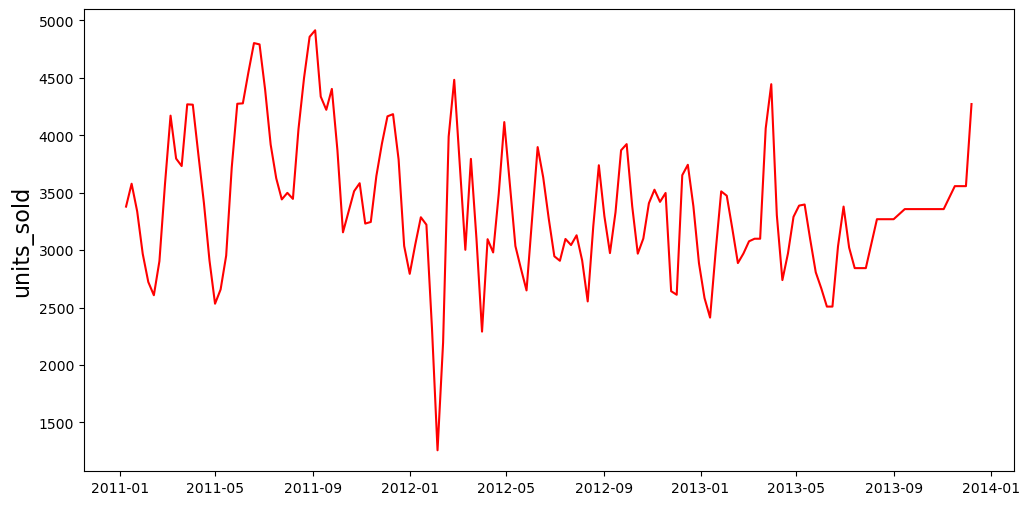

In [39]:
plot(216233)
dickey_fuller(216233)

In [40]:
data4_diff=data4.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data4_diff)
p_value= result[1]
p_value

0.00965372531351

Text(0, 0.5, 'units_sold')

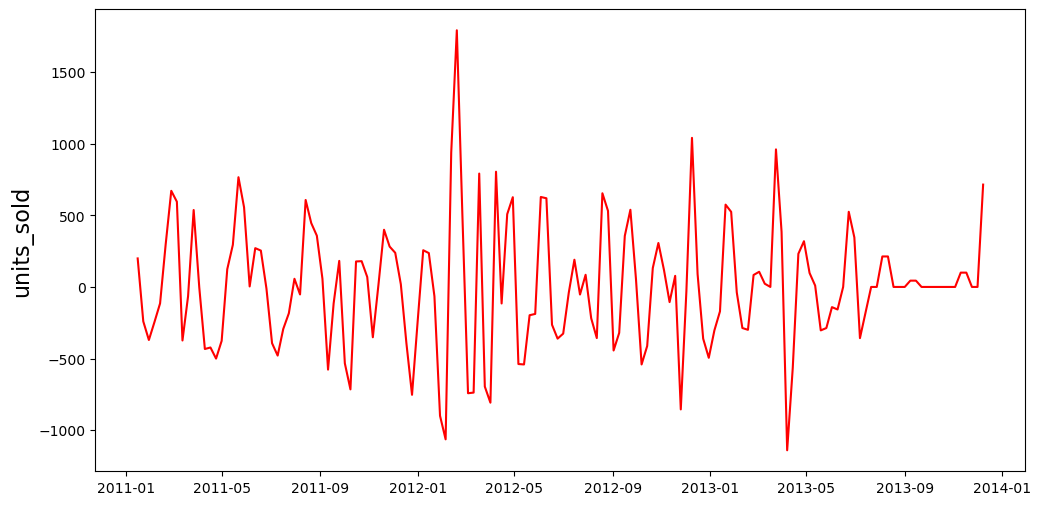

In [41]:
plt.figure(figsize=(12,6))
plt.plot(data4_diff, color='red')
plt.ylabel('units_sold', fontsize=16)

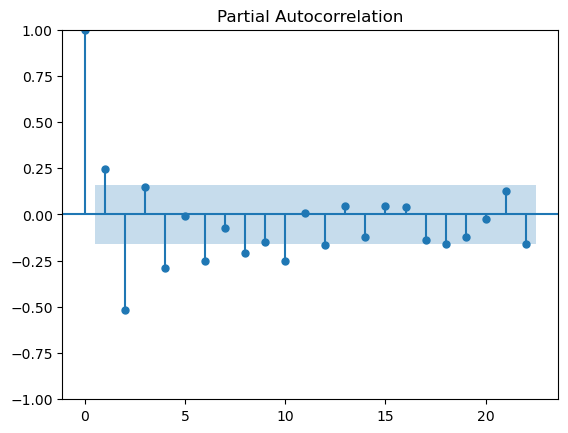

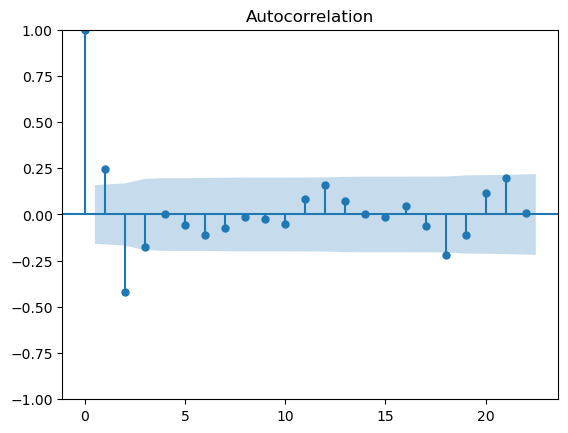

In [42]:
plot_pacf(data3_diff)
plot_acf(data3_diff)
plt.show()


In [43]:
from statsmodels.tsa.arima.model import ARIMA #NECESSARY LIBRARY FOR FITTING ARMA OR ARIMA
model1 = ARIMA(data3_diff,order=(1,1,1))
model2=ARIMA(data3_diff,order=(1,1,2))
model3=ARIMA(data3_diff,order=(2,1,1))
model4=ARIMA(data3_diff,order=(2,1,2))
model5=ARIMA(data3_diff,order=(4,1,1))
model6=ARIMA(data3_diff,order=(4,1,2))
model7=ARIMA(data3_diff,order=(6,1,1))
model8=ARIMA(data3_diff,order=(6,1,2))
model9=ARIMA(data3_diff,order=(8,1,1))
model10=ARIMA(data3_diff,order=(8,1,2))
model11=ARIMA(data3_diff,order=(10,1,1))
model12=ARIMA(data3_diff,order=(10,1,2))
model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()
model6_fit = model6.fit()
model7_fit = model7.fit()
model8_fit = model8.fit()
model9_fit = model9.fit()
model10_fit = model10.fit()
model11_fit = model11.fit()
model12_fit = model12.fit()
print('AIC:',model1_fit.aic,',','BIC:',model1_fit.bic)
print('AIC:',model2_fit.aic,',','BIC:',model2_fit.bic)
print('AIC:',model3_fit.aic,',','BIC:',model3_fit.bic)
print('AIC:',model4_fit.aic,',','BIC:',model4_fit.bic)
print('AIC:',model5_fit.aic,',','BIC:',model5_fit.bic)
print('AIC:',model6_fit.aic,',','BIC:',model6_fit.bic)
print('AIC:',model7_fit.aic,',','BIC:',model7_fit.bic)
print('AIC:',model8_fit.aic,',','BIC:',model8_fit.bic)
print('AIC:',model9_fit.aic,',','BIC:',model9_fit.bic)
print('AIC:',model10_fit.aic,',','BIC:',model10_fit.bic)
print('AIC:',model11_fit.aic,',','BIC:',model11_fit.bic)
print('AIC:',model12_fit.aic,',','BIC:',model12_fit.bic)

AIC: 2223.9382390925257 , BIC: 2232.9900786029702
AIC: 2162.971641417217 , BIC: 2175.040760764477
AIC: 2180.6017035813675 , BIC: 2192.6708229286273
AIC: 2155.535110440588 , BIC: 2170.621509624663
AIC: 2167.475209237379 , BIC: 2185.5788882582688
AIC: 2153.59251728053 , BIC: 2174.7134761382345
AIC: 2162.5948942017967 , BIC: 2186.733132896316
AIC: 2152.7009481022696 , BIC: 2179.8564666336038
AIC: 2160.4913248099683 , BIC: 2190.6641231781177
AIC: 2149.9952144538374 , BIC: 2183.1852926588017
AIC: 2151.990378316906 , BIC: 2188.1977363586852
AIC: 2143.253137924199 , BIC: 2182.477775802793


AIC OF MODEL 12: ARIMA(10,1,2) IS MINIMUM 

SO WE ARE TAKING IT AS THIS PRODUCT'S FORECASTING MODEL 

In [44]:
prediction_info4=model12_fit.forecast(12)
prediction_info4=(prediction_info4+data4['rolling_mean'][-1])
forecast4=pd.DataFrame(prediction_info4)
forecast4.rename(columns={'predicted_mean':'216233_forecast'},inplace=True)
forecast4

216233_forecast
2013-12-15      4415.495756
2013-12-22      4123.853861
2013-12-29      4183.750979
2014-01-05      4268.711617
2014-01-12      4269.818203
2014-01-19      4249.720955
2014-01-26      4267.375793
2014-02-02      4270.263763
2014-02-09      4291.325934
2014-02-16      4289.440215
2014-02-23      4287.975447
2014-03-02      4335.292294

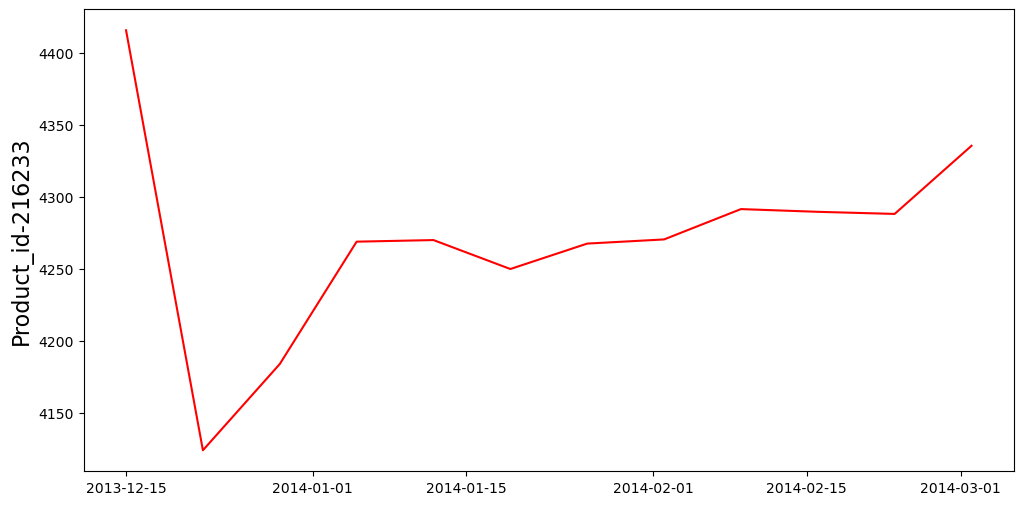

In [45]:
plt.figure(figsize=(12,6))
plt.plot(forecast4,color='red')
plt.ylabel('Product_id-216233',fontsize=16)
plt.show()

# PRODUCT 5 : ID-217390

In [46]:
data5=create_data(217390)
data5

rolling_mean
date                    
2011-01-09   4358.355263
2011-01-16   4312.000000
2011-01-23   4641.000000
2011-01-30   4834.000000
2011-02-06   4478.500000
...                  ...
2013-11-10   5316.000000
2013-11-17   6634.000000
2013-11-24   6634.000000
2013-12-01   6634.000000
2013-12-08   5528.000000

[153 rows x 1 columns]

ADF Statistic: -2.504173
p-value: 0.114462


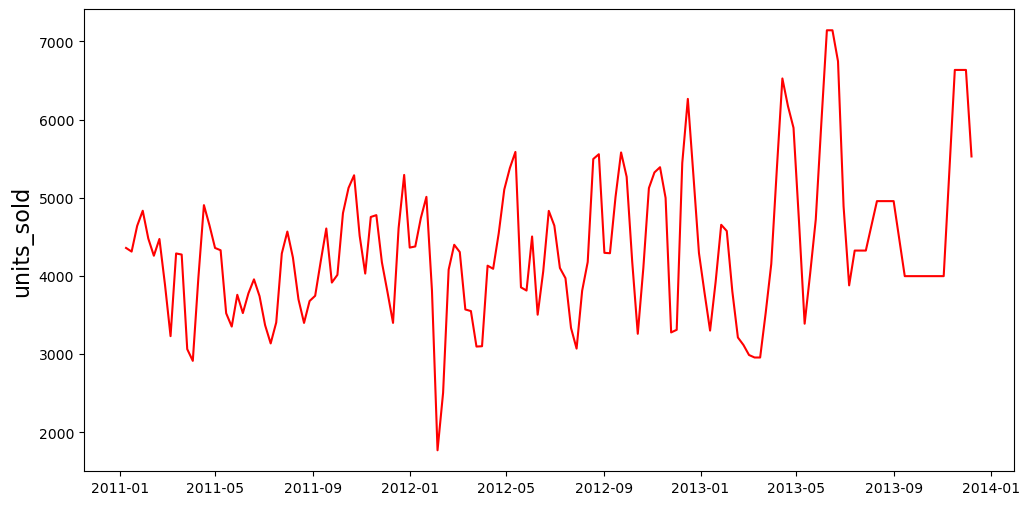

In [47]:
plot(217390)
dickey_fuller(217390)

In [48]:
data5_diff=data5.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data5_diff)
p_value= result[1]
p_value

8.74849463871224e-11

Text(0, 0.5, 'units_sold')

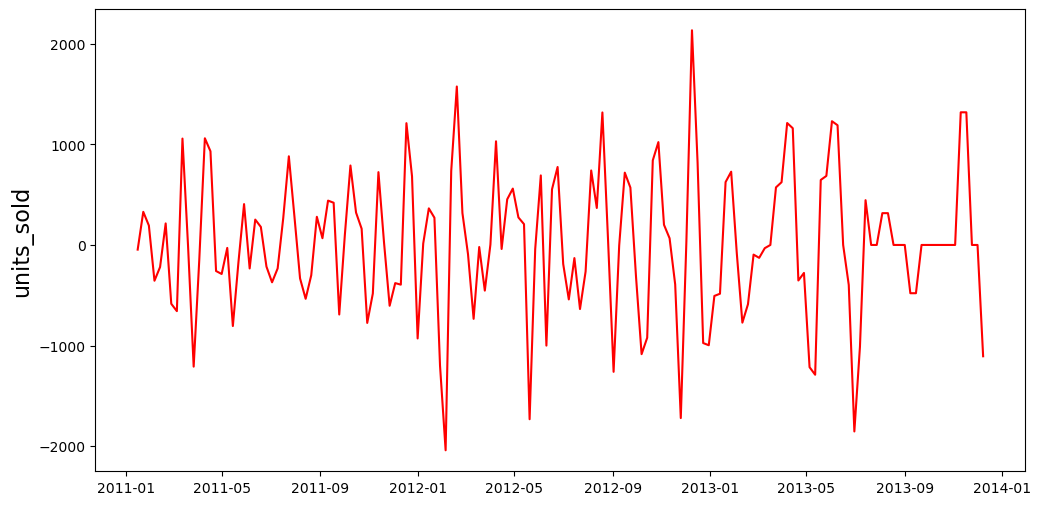

In [49]:
plt.figure(figsize=(12,6))
plt.plot(data5_diff, color='red')
plt.ylabel('units_sold', fontsize=16)

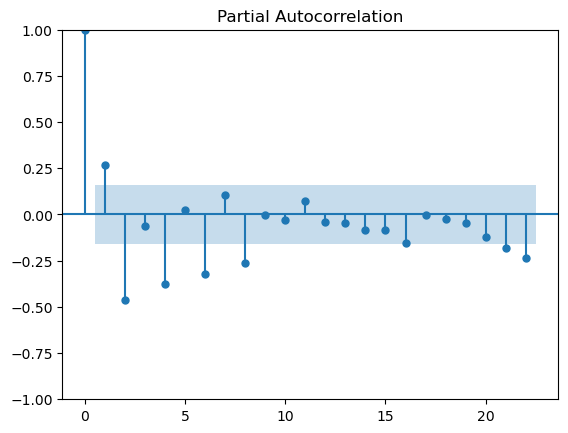

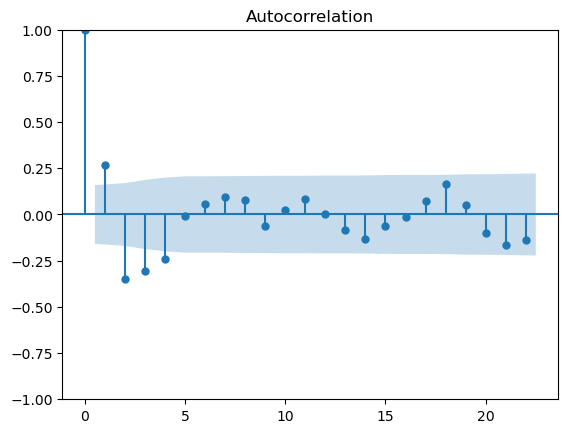

In [50]:
plot_pacf(data5_diff)
plot_acf(data5_diff)
plt.show()


In [51]:
from statsmodels.tsa.arima.model import ARIMA #NECESSARY LIBRARY FOR FITTING ARMA OR ARIMA
model1 = ARIMA(data5_diff,order=(1,1,1))
model2=ARIMA(data5_diff,order=(1,1,2))
model3=ARIMA(data5_diff,order=(1,1,3))
model4=ARIMA(data5_diff,order=(1,1,4))
model5=ARIMA(data5_diff,order=(2,1,1))
model6=ARIMA(data5_diff,order=(2,1,2))
model7=ARIMA(data5_diff,order=(2,1,3))
model8=ARIMA(data5_diff,order=(2,1,4))
model9=ARIMA(data5_diff,order=(4,1,1))
model10=ARIMA(data5_diff,order=(4,1,2))
model11=ARIMA(data5_diff,order=(4,0,3))
model12=ARIMA(data5_diff,order=(4,1,4))
model13=ARIMA(data5_diff,order=(6,1,1))
model14=ARIMA(data5_diff,order=(6,1,2))
model15=ARIMA(data5_diff,order=(6,1,3))
model16=ARIMA(data5_diff,order=(6,1,4))
model17=ARIMA(data5_diff,order=(8,1,1))
model18=ARIMA(data5_diff,order=(8,1,2))
model19=ARIMA(data5_diff,order=(8,1,3))
model20=ARIMA(data5_diff,order=(8,1,4))
model21=ARIMA(data5_diff,order=(8,1,1))
model22=ARIMA(data5_diff,order=(8,1,2))
model23=ARIMA(data5_diff,order=(8,1,3))
model24=ARIMA(data5_diff,order=(8,1,4))

model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()
model6_fit = model6.fit()
model7_fit = model7.fit()
model8_fit = model8.fit()
model9_fit = model9.fit()
model10_fit = model10.fit()
model11_fit = model11.fit()
model12_fit = model12.fit()
model13_fit = model13.fit()
model14_fit = model14.fit()
model15_fit = model15.fit()
model16_fit = model16.fit()
model17_fit = model17.fit()
model18_fit = model18.fit()
model19_fit = model19.fit()
model20_fit = model20.fit()
model21_fit = model21.fit()
model22_fit = model22.fit()
model23_fit = model23.fit()
model24_fit = model24.fit()

print('AIC:',model1_fit.aic,',','BIC:',model1_fit.bic)
print('AIC:',model2_fit.aic,',','BIC:',model2_fit.bic)
print('AIC:',model3_fit.aic,',','BIC:',model3_fit.bic)
print('AIC:',model4_fit.aic,',','BIC:',model4_fit.bic)
print('AIC:',model5_fit.aic,',','BIC:',model5_fit.bic)
print('AIC:',model6_fit.aic,',','BIC:',model6_fit.bic)
print('AIC:',model7_fit.aic,',','BIC:',model7_fit.bic)
print('AIC:',model8_fit.aic,',','BIC:',model8_fit.bic)
print('AIC:',model9_fit.aic,',','BIC:',model9_fit.bic)
print('AIC:',model10_fit.aic,',','BIC:',model10_fit.bic)
print('AIC:',model11_fit.aic,',','BIC:',model11_fit.bic)
print('AIC:',model12_fit.aic,',','BIC:',model12_fit.bic)
print('AIC:',model13_fit.aic,',','BIC:',model13_fit.bic)
print('AIC:',model14_fit.aic,',','BIC:',model14_fit.bic)
print('AIC:',model15_fit.aic,',','BIC:',model15_fit.bic)
print('AIC:',model16_fit.aic,',','BIC:',model16_fit.bic)
print('AIC:',model17_fit.aic,',','BIC:',model17_fit.bic)
print('AIC:',model18_fit.aic,',','BIC:',model18_fit.bic)
print('AIC:',model19_fit.aic,',','BIC:',model19_fit.bic)
print('AIC:',model20_fit.aic,',','BIC:',model20_fit.bic)
print('AIC:',model21_fit.aic,',','BIC:',model21_fit.bic)
print('AIC:',model22_fit.aic,',','BIC:',model22_fit.bic)
print('AIC:',model23_fit.aic,',','BIC:',model23_fit.bic)
print('AIC:',model24_fit.aic,',','BIC:',model24_fit.bic)

C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

AIC: 2407.649235249618 , BIC: 2416.7010747600625
AIC: 2351.810561025597 , BIC: 2363.879680372857
AIC: 2317.406248400486 , BIC: 2332.492647584561
AIC: 2319.8489691987243 , BIC: 2337.952648219614
AIC: 2374.841925587528 , BIC: 2386.9110449347877
AIC: 2348.6715801531 , BIC: 2363.7579793371747
AIC: 2319.4608267669655 , BIC: 2337.564505787855
AIC: 2358.806666683614 , BIC: 2379.9276255413183
AIC: 2354.9935476423043 , BIC: 2373.097226663194
AIC: 2332.333789432754 , BIC: 2353.4547482904586
AIC: 2323.967962120875 , BIC: 2351.1828868084917
AIC: 2324.3292111117753 , BIC: 2351.4847296431094
AIC: 2342.403652985532 , BIC: 2366.5418916800513
AIC: 2328.50261127619 , BIC: 2355.658129807524
AIC: 2327.2200873815564 , BIC: 2357.392885749706
AIC: 2327.16465814967 , BIC: 2360.354736354634
AIC: 2331.3782208658936 , BIC: 2361.551019234043
AIC: 2330.440281708172 , BIC: 2363.630359913136
AIC: 2333.199293545372 , BIC: 2369.406651587151
AIC: 2334.527769239766 , BIC: 2373.7524071183598
AIC: 2331.3782208658936 , BIC

C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
prediction_info5=model.predict(12)
prediction_info5=(prediction_info5+data5['rolling_mean'][-1])
prediction_info5
forecast5=pd.DataFrame(prediction_info5)
forecast5.rename(columns={0:'217390_forecast'},inplace=True)
forecast5

217390_forecast
2013-12-15     11678.202975
2013-12-22     11672.546762
2013-12-29     11709.626716
2014-01-05     11663.023802
2014-01-12     11605.961368
2014-01-19     11597.469596
2014-01-26     11600.458160
2014-02-02     11585.048050
2014-02-09     11568.124265
2014-02-16     11563.302106
2014-02-23     11561.752259
2014-03-02     11556.363969

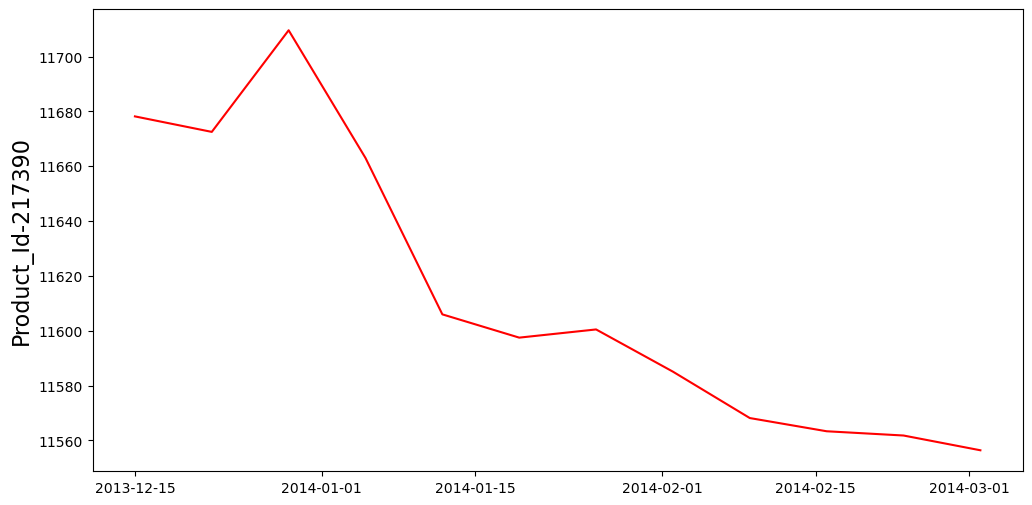

In [53]:
plt.figure(figsize=(12,6))
plt.plot(forecast5, color='red')
plt.ylabel('Product_Id-217390', fontsize=16)
plt.show()

# Product 6 : ID-219009

In [54]:
data6=create_data(219009)
data6

rolling_mean
date                    
2011-01-09   7147.138158
2011-01-16   3026.000000
2011-01-23   3948.000000
2011-01-30   4454.500000
2011-02-06   4378.500000
...                  ...
2013-11-10   6000.000000
2013-11-17   6739.000000
2013-11-24   6739.000000
2013-12-01   6739.000000
2013-12-08   5873.500000

[153 rows x 1 columns]

ADF Statistic: -5.806713
p-value: 0.000000


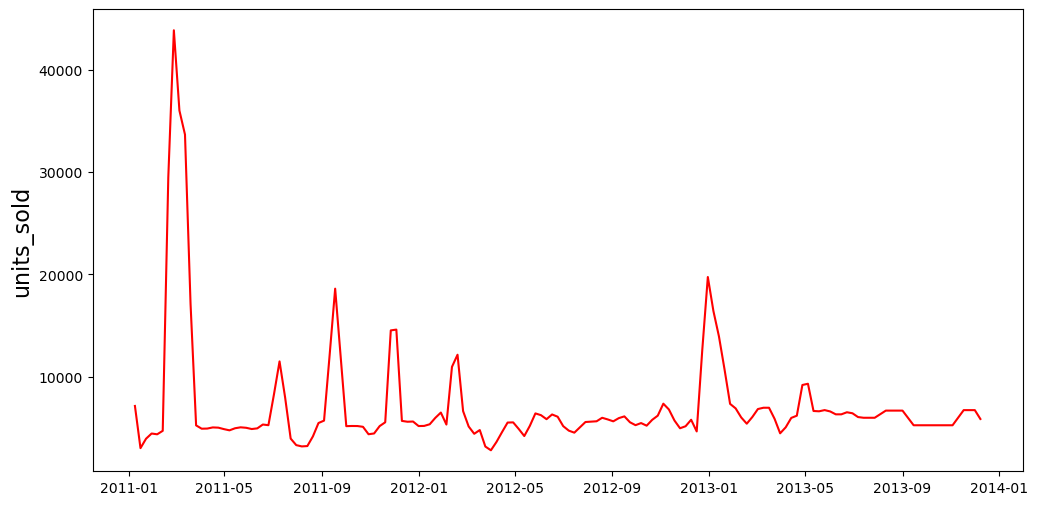

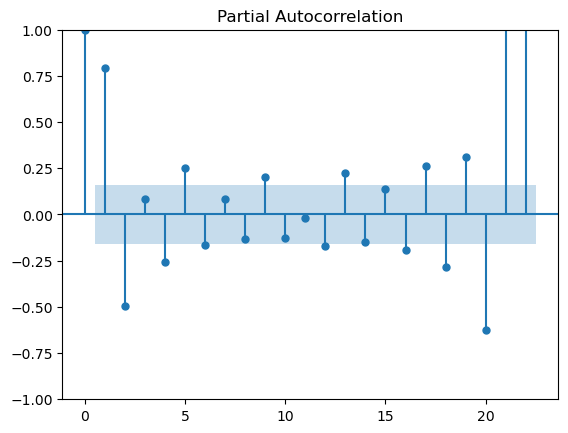

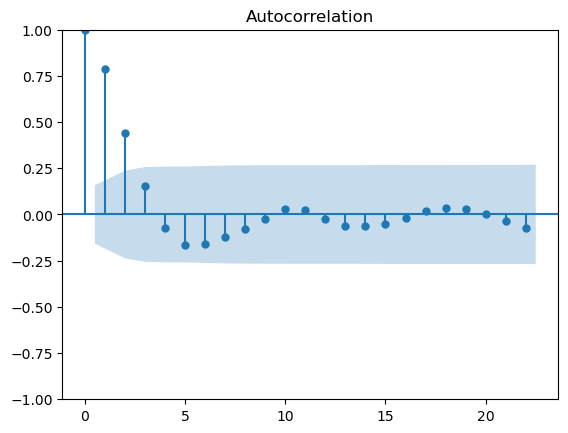

In [55]:
plot(219009)
dickey_fuller(219009)
corr_plot(219009)

In [56]:
model=auto_arima(data6,m=4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 4)   Log Likelihood               -1424.719
Date:                            Sun, 15 Oct 2023   AIC                           2863.437
Time:                                    10:38:27   BIC                           2884.650
Sample:                                01-09-2011   HQIC                          2872.054
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2080.8482   1874.794      1.110      0.267   -1593.680    5755.376
ar.L1          0.5617      0.097      5.804      0.000       0.372       0.751
ar.L2          0.1875      0.153      1.227      0.220      -0.112       0.487
ma.L1          0.9816      0.078     12.544      0.000       0.828       1.135
ar.S.L4       -0.2541      0.106     -2.397      0.017      -0.462      -0.046
ar.S.L8       -0.1098      0.159     -0.689      0.491      -0.422       0.202
sigma2      8.926e+06   8.27e+05     10.794      0.000    7.31e+06    1.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):             11551.06
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             5.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.81e+14. Standard errors may be unstable.
"""

In [57]:
forecast6=pd.DataFrame(model.predict(12))
forecast6.rename(columns={0:'219009_forecast'},inplace=True)
forecast6


219009_forecast
2013-12-15      5157.968102
2013-12-22      5469.932570
2013-12-29      5546.241360
2014-01-05      5786.364641
2014-01-12      5958.271728
2014-01-19      5938.022605
2014-01-26      5965.141179
2014-02-02      6036.346849
2014-02-09      6100.839831
2014-02-16      6095.337380
2014-02-23      6098.879383
2014-03-02      6069.414352

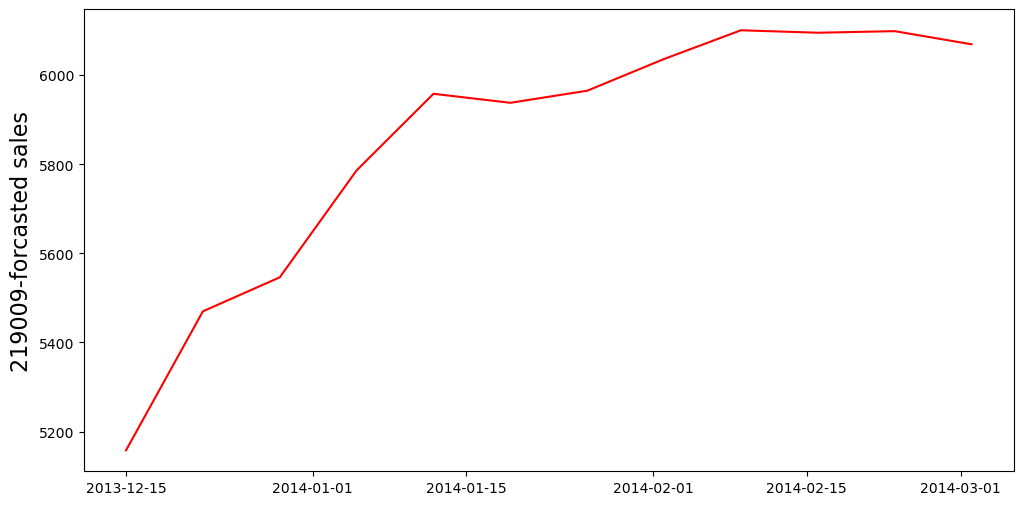

In [58]:
plt.figure(figsize=(12,6))
plt.plot(forecast6, color='red')
plt.ylabel('219009-forcasted sales', fontsize=16)
plt.show()

# Product 7 : ID-219029

In [59]:
data7=create_data(219029)
data7

rolling_mean
date                    
2011-01-09   3747.993421
2011-01-16   2736.000000
2011-01-23   2883.000000
2011-01-30   2639.500000
2011-02-06   2473.500000
...                  ...
2013-11-10   2911.000000
2013-11-17   2835.000000
2013-11-24   2835.000000
2013-12-01   2835.000000
2013-12-08   2857.500000

[153 rows x 1 columns]

ADF Statistic: -3.776065
p-value: 0.003162


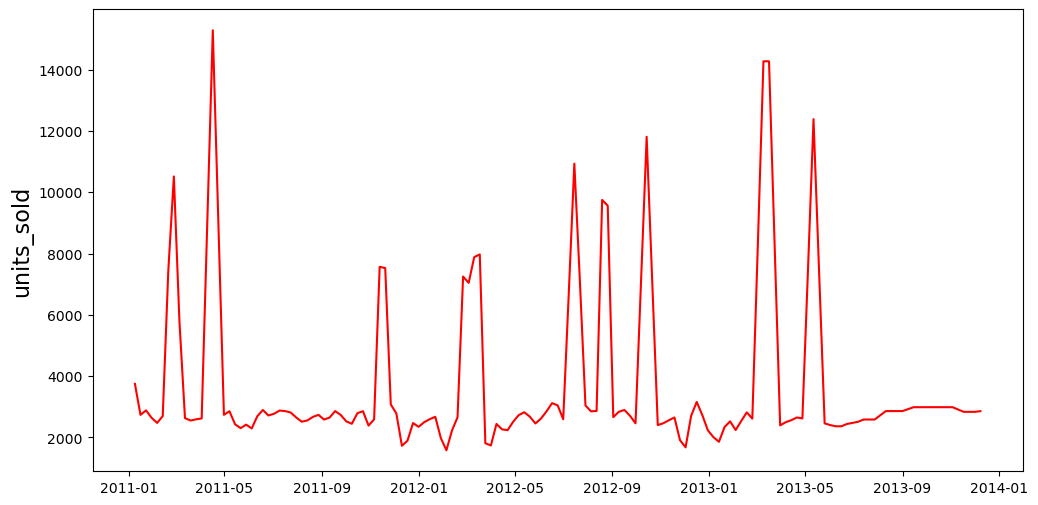

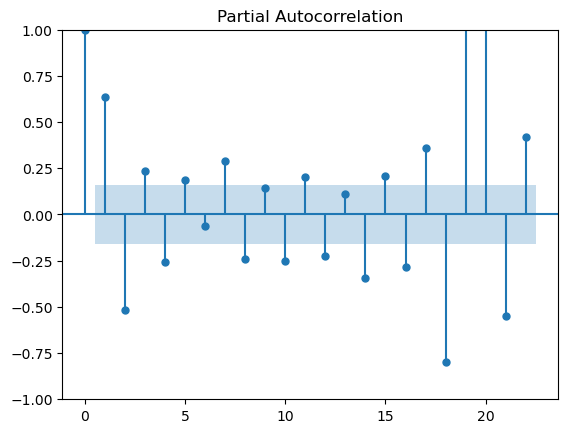

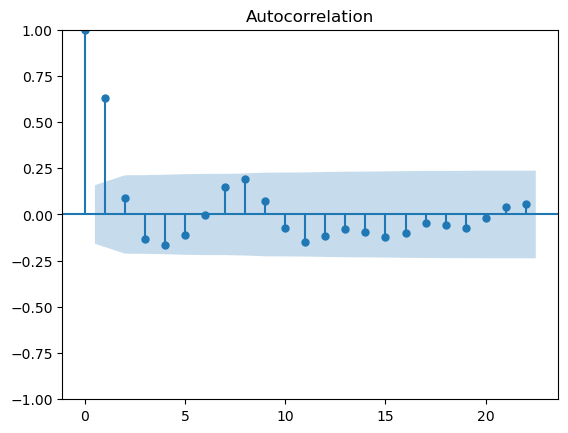

In [60]:
plot(219029)
dickey_fuller(219029)
corr_plot(219029)

In [61]:
model=auto_arima(data7,m=4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(3, 0, 1)x(1, 0, [], 4)   Log Likelihood               -1347.042
Date:                            Sun, 15 Oct 2023   AIC                           2708.084
Time:                                    10:38:48   BIC                           2729.297
Sample:                                01-09-2011   HQIC                          2716.701
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1639.8481    903.930      1.814      0.070    -131.822    3411.518
ar.L1          0.8322      0.135      6.163      0.000       0.568       1.097
ar.L2         -0.6534      0.162     -4.039      0.000      -0.970      -0.336
ar.L3          0.5205      0.119      4.391      0.000       0.288       0.753
ma.L1          0.4200      0.131      3.196      0.001       0.162       0.678
ar.S.L4       -0.4957      0.099     -5.026      0.000      -0.689      -0.302
sigma2      2.554e+06    3.2e+05      7.993      0.000    1.93e+06    3.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               265.38
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             2.13
Prob(H) (two-sided):                  0.72   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
forecast7=pd.DataFrame(model.predict(12))
forecast7.rename(columns={0:'219029_forecast'},inplace=True)
forecast7


219029_forecast
2013-12-15      3138.068661
2013-12-22      3452.186809
2013-12-29      3547.002002
2014-01-05      3535.949215
2014-01-12      3498.510013
2014-01-19      3476.675914
2014-01-26      3474.732840
2014-02-02      3483.143064
2014-02-09      3544.386404
2014-02-16      3612.270710
2014-02-23      3634.357964
2014-03-02      3632.704546

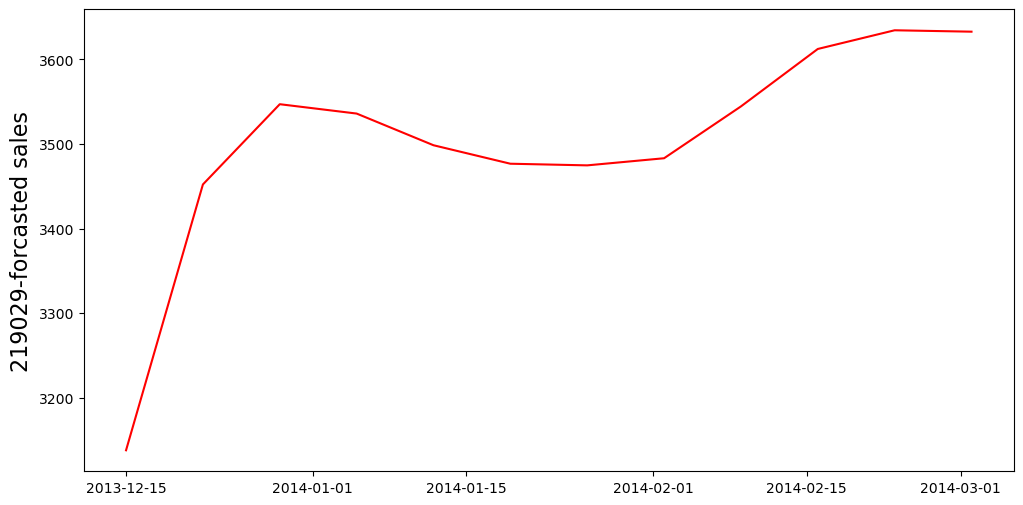

In [63]:
plt.figure(figsize=(12,6))
plt.plot(forecast7, color='red')
plt.ylabel('219029-forcasted sales', fontsize=16)
plt.show()

# Product 8 : ID-223245

In [64]:
data8=create_data(223245)
data8

rolling_mean
date                    
2011-01-09   5276.838816
2011-01-16   2198.000000
2011-01-23   3064.500000
2011-01-30   3822.000000
2011-02-06   3345.500000
...                  ...
2013-11-10   3584.000000
2013-11-17   2825.000000
2013-11-24   2825.000000
2013-12-01   2825.000000
2013-12-08   3154.000000

[153 rows x 1 columns]

ADF Statistic: -3.944318
p-value: 0.001732


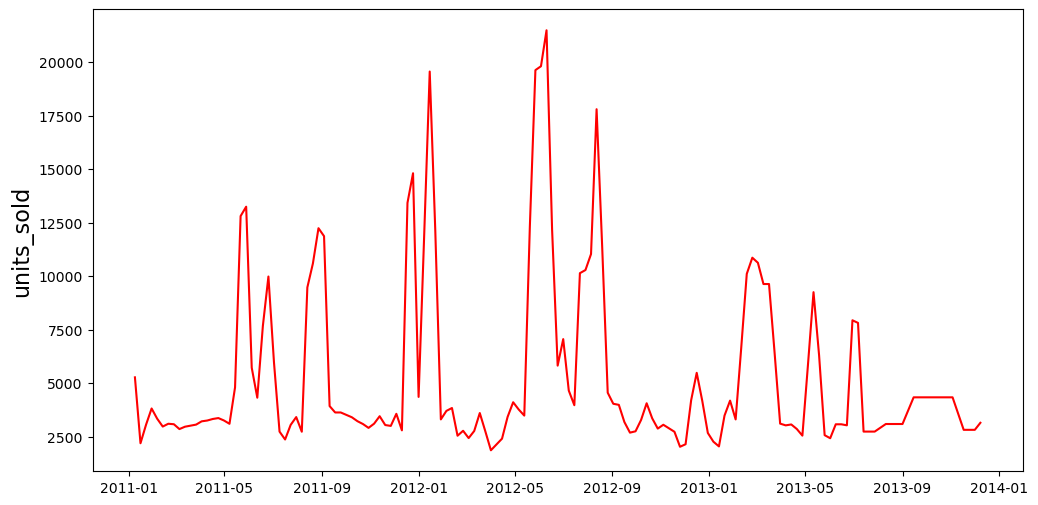

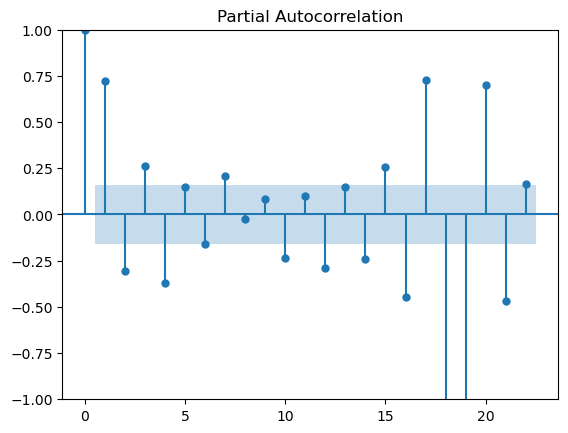

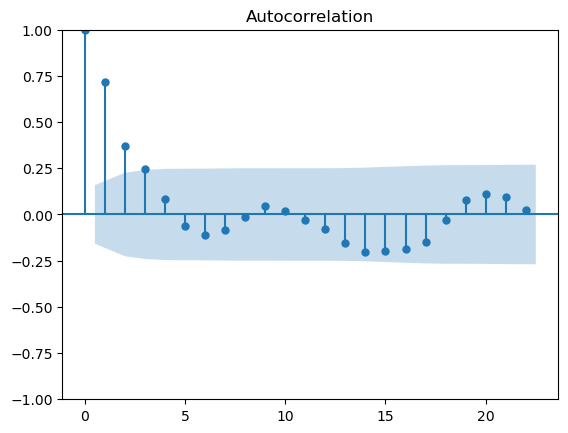

In [65]:
plot(223245)
dickey_fuller(223245)
corr_plot(223245)

In [66]:
model=auto_arima(data8,m=7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  153
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -1395.868
Date:                Sun, 15 Oct 2023   AIC                           2807.736
Time:                        10:39:17   BIC                           2831.980
Sample:                    01-09-2011   HQIC                          2817.584
                         - 12-08-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2282.7267    757.823      3.012      0.003     797.421    3768.033
ar.L1          1.2819      0.255      5.020      0.000       0.781       1.782
ar.L2         -0.7102      0.183     -3.880      0.000      -1.069      -0.351
ma.L1          0.0106      0.254      0.042      0.967      -0.488       0.509
ma.L2         -0.4436      0.174     -2.544      0.011      -0.785      -0.102
ma.L3          0.6556      0.137      4.776      0.000       0.387       0.925
ma.L4          0.1489      0.095      1.559      0.119      -0.038       0.336
sigma2      4.816e+06      0.658   7.32e+06      0.000    4.82e+06    4.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               217.81
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.06e+21. Standard errors may be unstable.
"""

In [67]:
forecast8=pd.DataFrame(model.predict(12))
forecast8.rename(columns={0:'223245_forecast'},inplace=True)
forecast8


223245_forecast
2013-12-15      4191.385637
2013-12-22      4875.197503
2013-12-29      5296.791556
2014-01-05      5580.044984
2014-01-12      5674.109431
2014-01-19      5593.521163
2014-01-26      5423.404893
2014-02-02      5262.561510
2014-02-09      5177.190362
2014-02-16      5181.984377
2014-02-23      5248.762661
2014-03-02      5330.963690

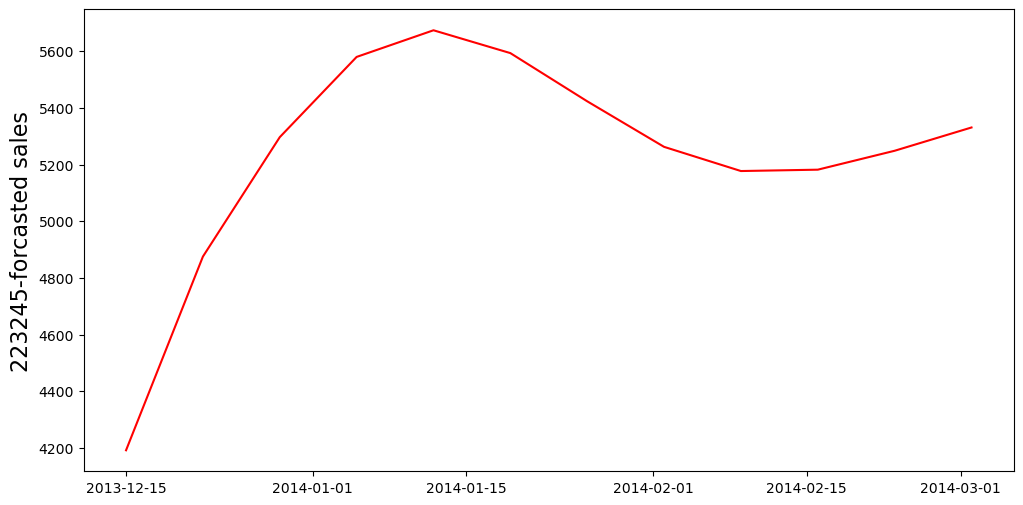

In [68]:
plt.figure(figsize=(12,6))
plt.plot(forecast8, color='red')
plt.ylabel('223245-forcasted sales', fontsize=16)
plt.show()

# product 9 : ID-223153

In [69]:
data9=create_data(223153)
data9

rolling_mean
date                    
2011-01-09   3687.753289
2011-01-16   1054.000000
2011-01-23   2751.000000
2011-01-30   3560.000000
2011-02-06   1786.000000
...                  ...
2013-11-10   1687.000000
2013-11-17   1925.000000
2013-11-24   1925.000000
2013-12-01   1925.000000
2013-12-08   2149.000000

[153 rows x 1 columns]

ADF Statistic: -3.906276
p-value: 0.001989


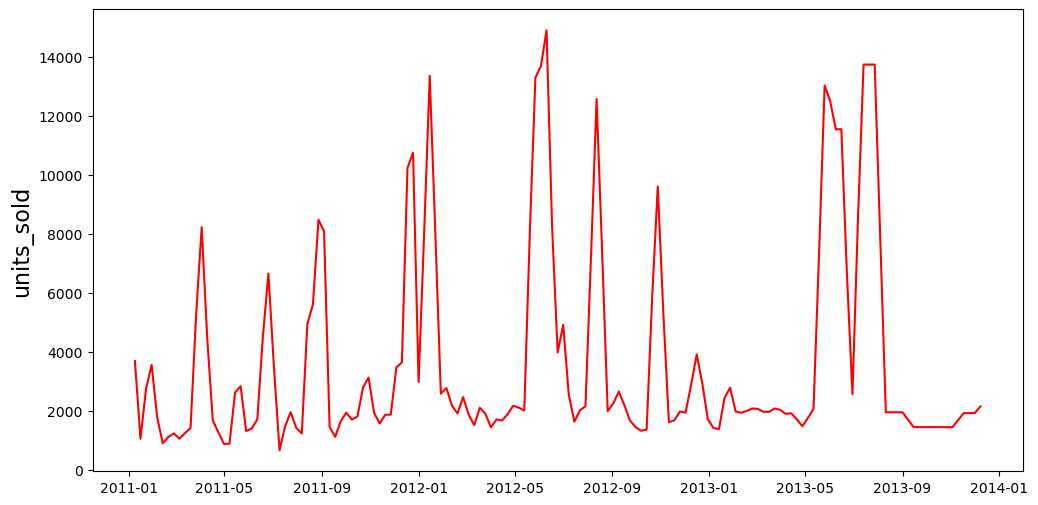

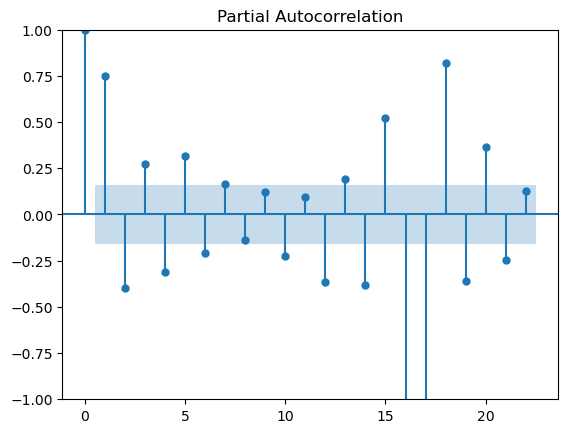

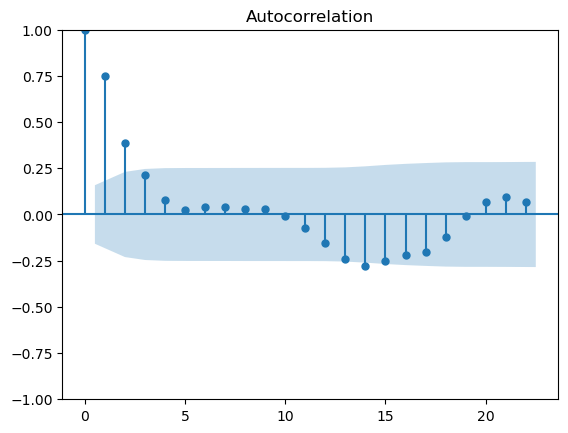

In [70]:
plot(223153)
dickey_fuller(223153)
corr_plot(223153)

In [71]:
model=auto_arima(data9,m=7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  153
Model:             SARIMAX(5, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -1359.554
Date:                                Sun, 15 Oct 2023   AIC                           2743.107
Time:                                        10:40:08   BIC                           2779.473
Sample:                                    01-09-2011   HQIC                          2757.879
                                         - 12-08-2013                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    881.1482   1396.639      0.631      0.528   -1856.215    3618.511
ar.L1          0.4802      0.109      4.395      0.000       0.266       0.694
ar.L2         -0.0575      0.113     -0.510      0.610      -0.279       0.164
ar.L3          0.1462      0.114      1.279      0.201      -0.078       0.370
ar.L4         -0.1813      0.132     -1.377      0.168      -0.439       0.077
ar.L5          0.0592      0.116      0.510      0.610      -0.168       0.287
ma.L1          0.9630      0.055     17.614      0.000       0.856       1.070
ar.S.L7        0.0702      0.377      0.186      0.852      -0.669       0.810
ar.S.L14       0.5076      0.467      1.087      0.277      -0.408       1.423
ma.S.L7       -0.0093      0.347     -0.027      0.979      -0.689       0.671
ma.S.L14      -0.7537      0.393     -1.919      0.055      -1.523       0.016
sigma2      3.636e+06    5.9e+05      6.163      0.000    2.48e+06    4.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                71.24
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.25
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.61e+14. Standard errors may be unstable.
"""

In [72]:
forecast9=pd.DataFrame(model.predict(12))
forecast9.rename(columns={0:'223153_forecast'},inplace=True)
forecast9

223153_forecast
2013-12-15      3031.657154
2013-12-22      3581.792157
2013-12-29      3503.817133
2014-01-05      3801.572523
2014-01-12      4206.379797
2014-01-19      3310.491507
2014-01-26      3001.817162
2014-02-02      3338.113957
2014-02-09      3230.727536
2014-02-16      4295.014666
2014-02-23      5045.236662
2014-03-02      4509.506433

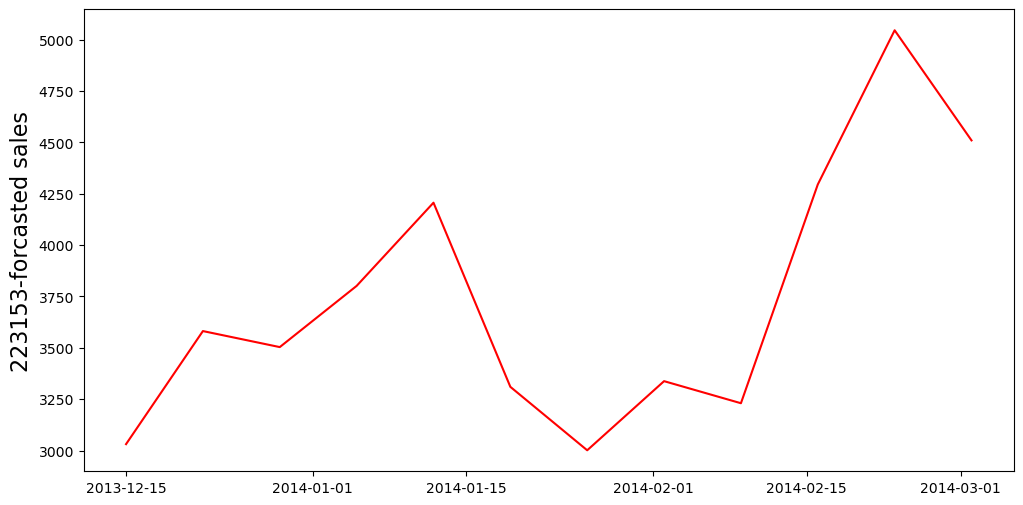

In [73]:
plt.figure(figsize=(12,6))
plt.plot(forecast9, color='red')
plt.ylabel('223153-forcasted sales', fontsize=16)
plt.show()

# PRODUCT 10 : ID-300021

In [74]:
data10=create_data(300021)
data10

rolling_mean
date                    
2011-01-09   1984.289474
2011-01-16   1736.000000
2011-01-23   1646.000000
2011-01-30   1939.000000
2011-02-06   1995.000000
...                  ...
2013-11-10   1608.000000
2013-11-17   1691.000000
2013-11-24   1691.000000
2013-12-01   1691.000000
2013-12-08   1677.500000

[153 rows x 1 columns]

ADF Statistic: -2.127927
p-value: 0.233434


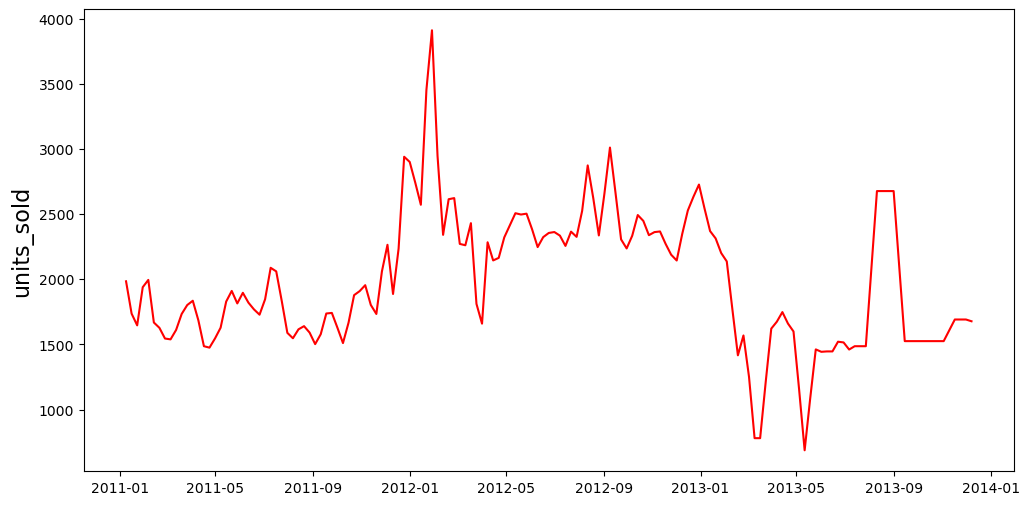

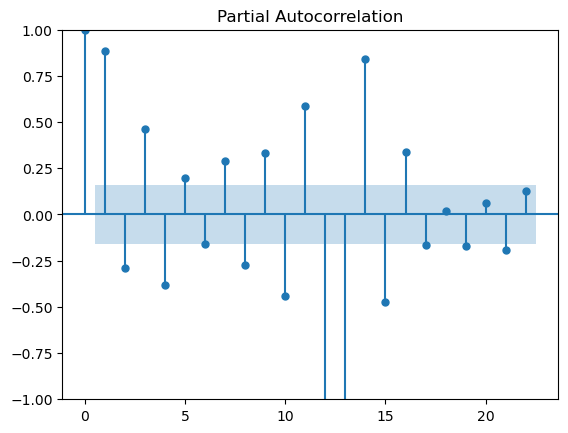

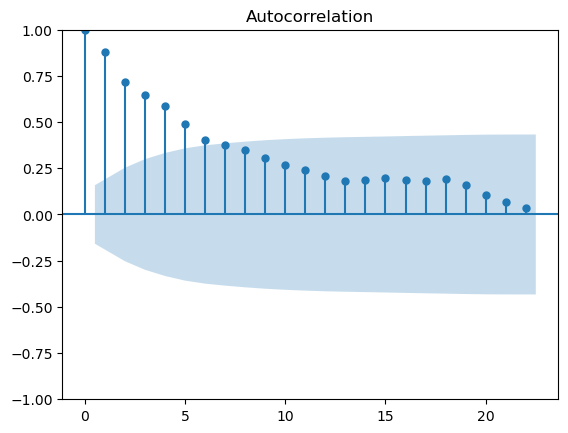

In [75]:
plot(300021)
dickey_fuller(300021)
corr_plot(300021)

In [76]:
data10_diff=data10.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data10_diff)
p_value= result[1]
p_value

1.2215437319467355e-06

Text(0, 0.5, 'units_sold')

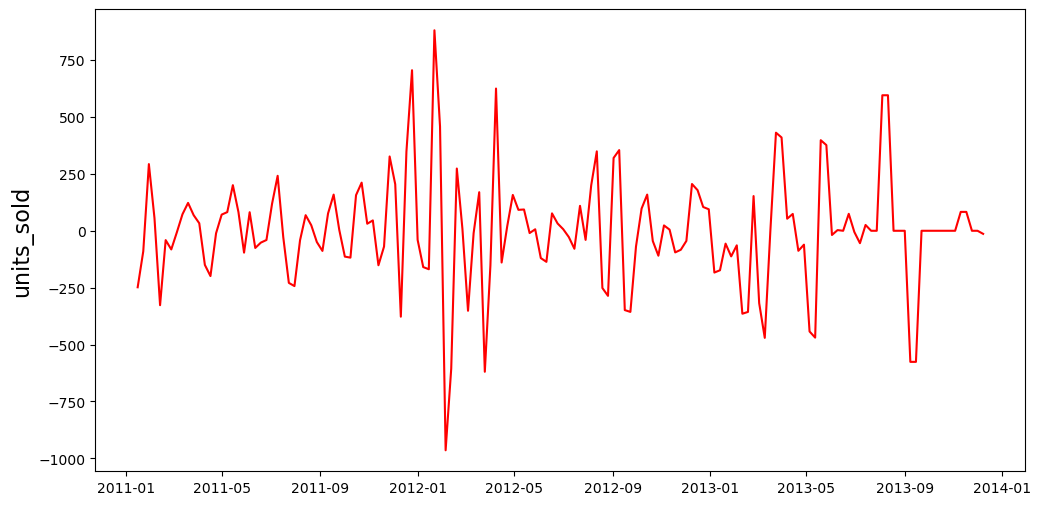

In [77]:
plt.figure(figsize=(12,6))
plt.plot(data10_diff, color='red')
plt.ylabel('units_sold', fontsize=16)

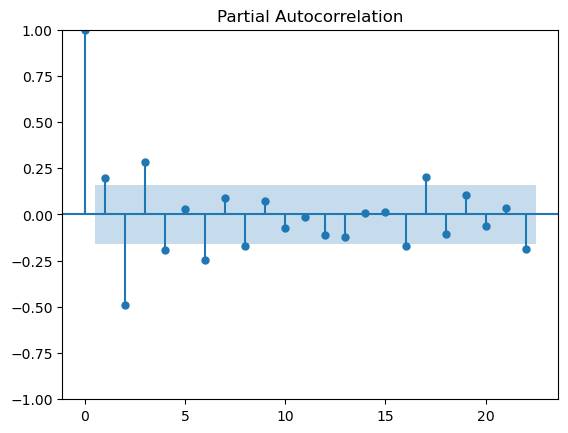

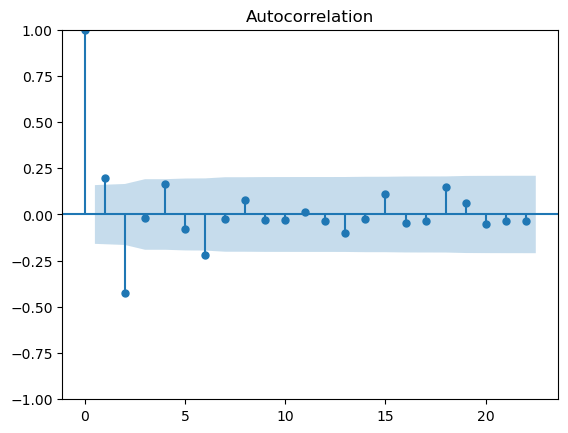

In [78]:
plot_pacf(data10_diff)
plot_acf(data10_diff)
plt.show()

In [79]:
from statsmodels.tsa.arima.model import ARIMA #NECESSARY LIBRARY FOR FITTING ARMA OR ARIMA
model1 = ARIMA(data10_diff,order=(1,1,1))
model2=ARIMA(data10_diff,order=(1,1,2))
model3=ARIMA(data10_diff,order=(1,1,6))
model4=ARIMA(data10_diff,order=(2,1,1))
model5=ARIMA(data10_diff,order=(2,1,2))
model6=ARIMA(data10_diff,order=(2,1,6))
model7=ARIMA(data10_diff,order=(3,1,1))
model8=ARIMA(data10_diff,order=(3,1,2))
model9=ARIMA(data10_diff,order=(3,1,6))
model10=ARIMA(data10_diff,order=(4,1,1))
model11=ARIMA(data10_diff,order=(4,1,2))
model12=ARIMA(data10_diff,order=(4,1,6))
model13=ARIMA(data10_diff,order=(6,1,1))
model14=ARIMA(data10_diff,order=(6,1,2))
model15=ARIMA(data10_diff,order=(6,1,6))
model16=ARIMA(data10_diff,order=(17,1,1))
model17=ARIMA(data10_diff,order=(17,1,2))
model18=ARIMA(data10_diff,order=(17,1,6))
model19=ARIMA(data10_diff,order=(22,1,1))
model20=ARIMA(data10_diff,order=(22,1,2))
model21=ARIMA(data10_diff,order=(22,1,6))


model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()
model6_fit = model6.fit()
model7_fit = model7.fit()
model8_fit = model8.fit()
model9_fit = model9.fit()
model10_fit = model10.fit()
model11_fit = model11.fit()
model12_fit = model12.fit()
model13_fit = model13.fit()
model14_fit = model14.fit()
model15_fit = model15.fit()
model16_fit = model16.fit()
model17_fit = model17.fit()
model18_fit = model18.fit()
model19_fit = model19.fit()
model20_fit = model20.fit()
model21_fit = model21.fit()


print('AIC:',model1_fit.aic,',','BIC:',model1_fit.bic)
print('AIC:',model2_fit.aic,',','BIC:',model2_fit.bic)
print('AIC:',model3_fit.aic,',','BIC:',model3_fit.bic)
print('AIC:',model4_fit.aic,',','BIC:',model4_fit.bic)
print('AIC:',model5_fit.aic,',','BIC:',model5_fit.bic)
print('AIC:',model6_fit.aic,',','BIC:',model6_fit.bic)
print('AIC:',model7_fit.aic,',','BIC:',model7_fit.bic)
print('AIC:',model8_fit.aic,',','BIC:',model8_fit.bic)
print('AIC:',model9_fit.aic,',','BIC:',model9_fit.bic)
print('AIC:',model10_fit.aic,',','BIC:',model10_fit.bic)
print('AIC:',model11_fit.aic,',','BIC:',model11_fit.bic)
print('AIC:',model12_fit.aic,',','BIC:',model12_fit.bic)
print('AIC:',model13_fit.aic,',','BIC:',model13_fit.bic)
print('AIC:',model14_fit.aic,',','BIC:',model14_fit.bic)
print('AIC:',model15_fit.aic,',','BIC:',model15_fit.bic)
print('AIC:',model16_fit.aic,',','BIC:',model16_fit.bic)
print('AIC:',model17_fit.aic,',','BIC:',model17_fit.bic)
print('AIC:',model18_fit.aic,',','BIC:',model18_fit.bic)
print('AIC:',model19_fit.aic,',','BIC:',model19_fit.bic)
print('AIC:',model20_fit.aic,',','BIC:',model20_fit.bic)
print('AIC:',model21_fit.aic,',','BIC:',model21_fit.bic)


C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Soumadeep\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

AIC: 2098.682519672623 , BIC: 2107.7343591830677
AIC: 2042.447356091557 , BIC: 2054.5164754388165
AIC: 2038.4153890750208 , BIC: 2062.55362776954
AIC: 2061.2209479474795 , BIC: 2073.2900672947394
AIC: 2034.6981900023166 , BIC: 2049.7845891863913
AIC: 2032.4145425972497 , BIC: 2059.570061128584
AIC: 2050.7804319673187 , BIC: 2065.8668311513934
AIC: 2032.619769914315 , BIC: 2050.7234489352045
AIC: 2036.4771881764023 , BIC: 2066.6499865445517
AIC: 2048.2974211834626 , BIC: 2066.401100204352
AIC: 2033.561026710564 , BIC: 2054.6819855682684
AIC: 2040.938026177651 , BIC: 2074.128104382615
AIC: 2044.4838481364739 , BIC: 2068.6220868309933
AIC: 2035.4545002747827 , BIC: 2062.610018806117
AIC: 2045.4323670919234 , BIC: 2084.6570049705174
AIC: 2049.5521765918447 , BIC: 2106.8804934913283
AIC: 2047.3162438240327 , BIC: 2107.6618405603313
AIC: 2054.1745509516904 , BIC: 2126.589267035248
AIC: 2060.0501834042398 , BIC: 2132.464899487798
AIC: 2054.9602517215444 , BIC: 2130.3922476419175
AIC: 2064.397

In [80]:
prediction_info10=model6_fit.forecast(12)
prediction_info10=(prediction_info10+data10['rolling_mean'][-1])
forecast10=pd.DataFrame(prediction_info10)
forecast10.rename(columns={'predicted_mean':'300021_forecast'},inplace=True)
forecast10

300021_forecast
2013-12-15      1654.951960
2013-12-22      1621.659379
2013-12-29      1680.522007
2014-01-05      1752.589417
2014-01-12      1639.869458
2014-01-19      1619.000000
2014-01-26      1735.057854
2014-02-02      1700.378347
2014-02-09      1607.190309
2014-02-16      1683.535406
2014-02-23      1735.644910
2014-03-02      1639.253121

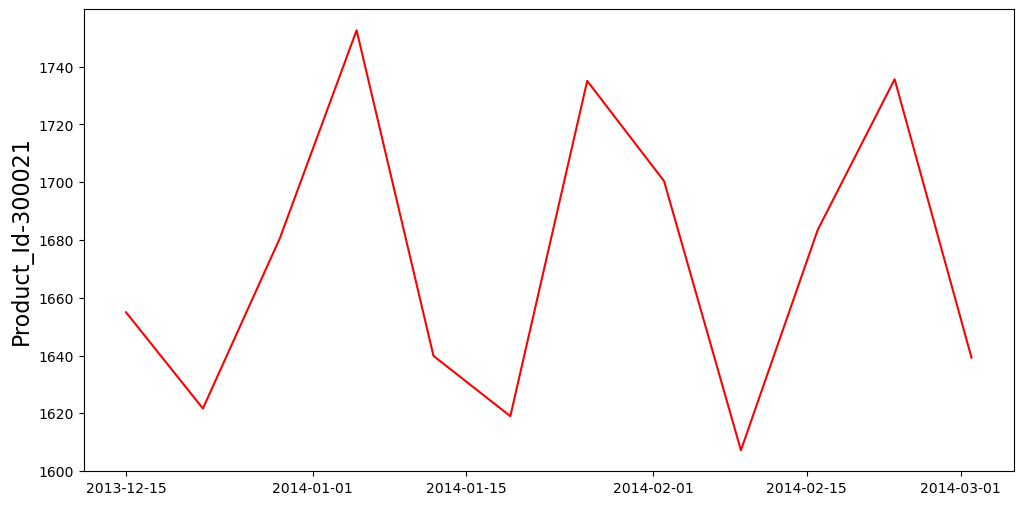

In [81]:
plt.figure(figsize=(12,6))
plt.plot(forecast10, color='red')
plt.ylabel('Product_Id-300021', fontsize=16)
plt.show()

# Product 11 : ID- 219844

In [82]:
data11=create_data(219844)
data11

rolling_mean
date                    
2011-01-09    783.631579
2011-01-16    693.000000
2011-01-23    976.500000
2011-01-30   1171.500000
2011-02-06    970.000000
...                  ...
2013-11-10    816.500000
2013-11-17    671.000000
2013-11-24    671.000000
2013-12-01    671.000000
2013-12-08    641.000000

[153 rows x 1 columns]

ADF Statistic: -4.279244
p-value: 0.000482


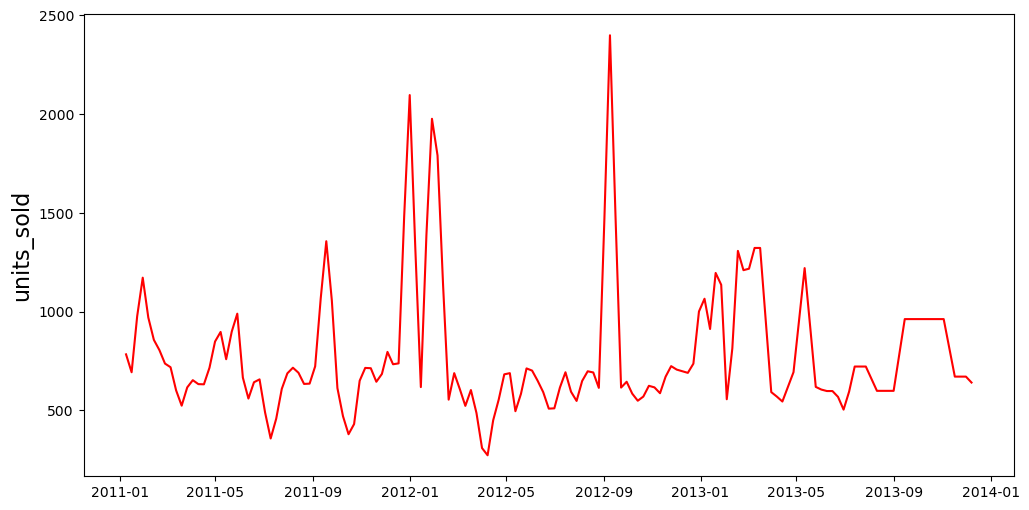

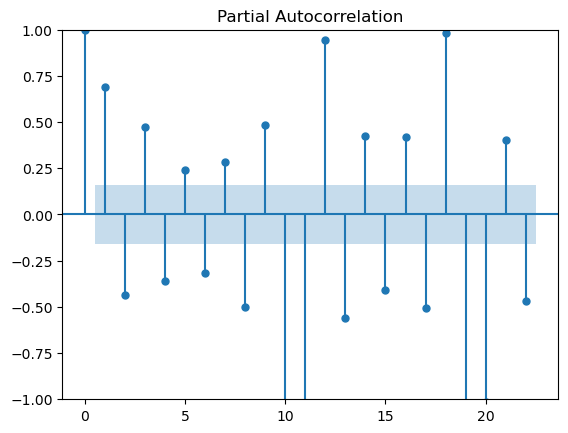

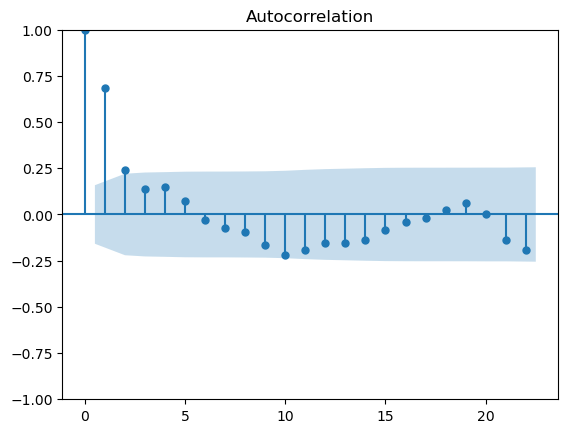

In [83]:
plot(219844)
dickey_fuller(219844)
corr_plot(219844)

In [84]:
model=auto_arima(data11,m=4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  153
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 4)   Log Likelihood                -991.469
Date:                             Sun, 15 Oct 2023   AIC                           1996.939
Time:                                     10:41:49   BIC                           2018.152
Sample:                                 01-09-2011   HQIC                          2005.556
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    235.3291    394.706      0.596      0.551    -538.280    1008.938
ar.L1          0.0866      0.111      0.779      0.436      -0.131       0.304
ma.L1          1.5712      0.086     18.312      0.000       1.403       1.739
ma.L2          0.5759      0.091      6.310      0.000       0.397       0.755
ar.S.L4        0.6700      0.534      1.254      0.210      -0.377       1.717
ma.S.L4       -0.5667      0.535     -1.059      0.289      -1.615       0.482
sigma2      2.388e+04   1742.920     13.700      0.000    2.05e+04    2.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               564.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             2.08
Prob(H) (two-sided):                  0.36   Kurtosis:                        11.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
forecast11=pd.DataFrame(model.predict(12))
forecast11.rename(columns={0:'219844_forecast'},inplace=True)
forecast11

219844_forecast
2013-12-15       646.897050
2013-12-22       730.305262
2013-12-29       779.247789
2014-01-05       774.084712
2014-01-12       766.611482
2014-01-19       775.605257
2014-01-26       782.247383
2014-02-02       776.522437
2014-02-09       771.318902
2014-02-16       777.327963
2014-02-23       781.776888
2014-03-02       777.940896

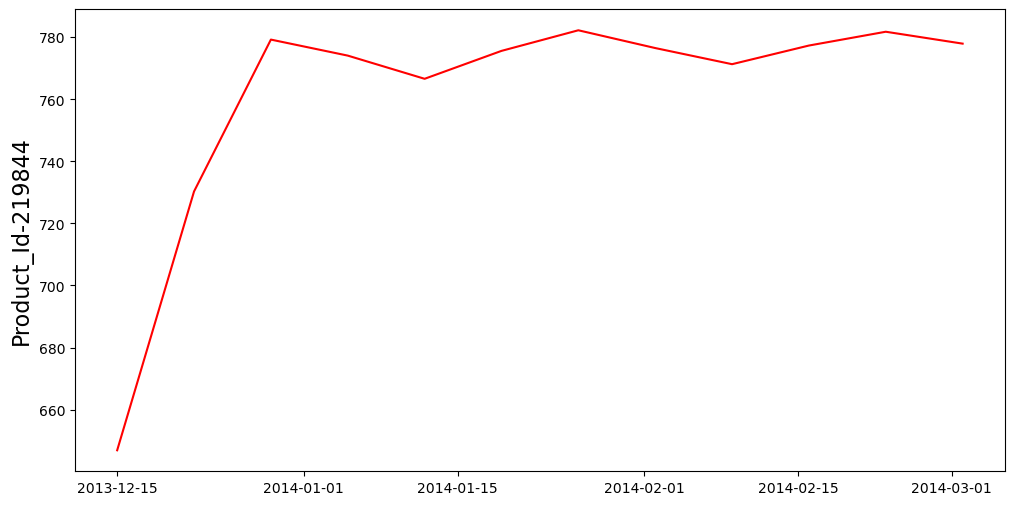

In [86]:
plt.figure(figsize=(12,6))
plt.plot(forecast11, color='red')
plt.ylabel('Product_Id-219844', fontsize=16)
plt.show()

# Product 12 : ID-222087

In [87]:
data12=create_data(222087)
data12

rolling_mean
date                    
2011-01-09   5122.421053
2011-01-16   3855.000000
2011-01-23   5370.500000
2011-01-30   6169.000000
2011-02-06   4566.000000
...                  ...
2013-11-10  10492.000000
2013-11-17   3846.000000
2013-11-24   3846.000000
2013-12-01   3846.000000
2013-12-08   3695.500000

[153 rows x 1 columns]

ADF Statistic: -3.889249
p-value: 0.002115


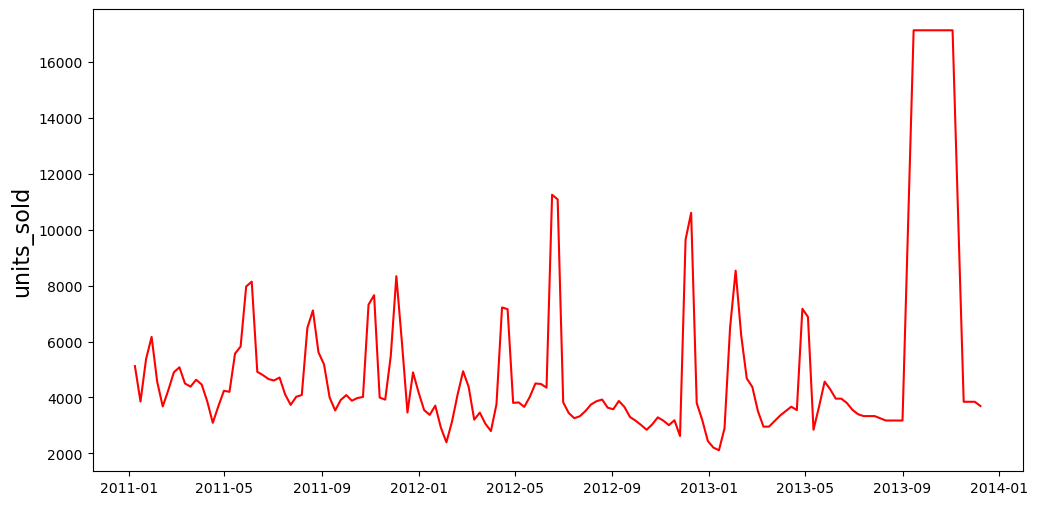

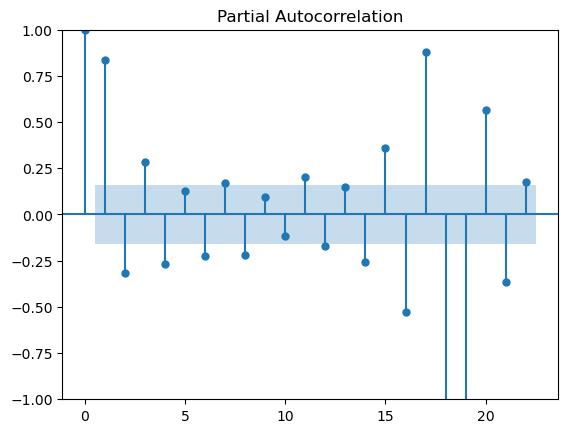

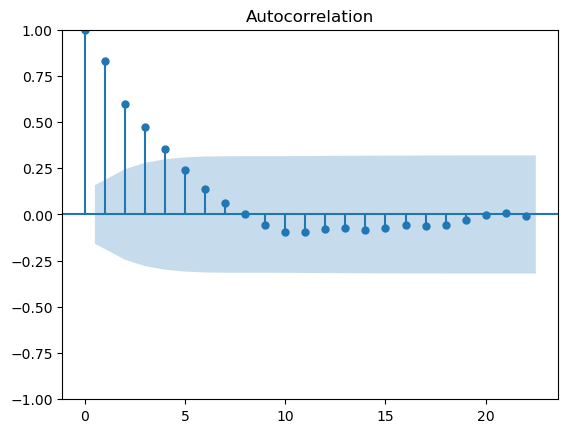

In [88]:
plot(222087)
dickey_fuller(222087)
corr_plot(222087)

In [89]:
model=auto_arima(data12,m=14)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  153
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 14)   Log Likelihood               -1338.657
Date:                             Sun, 15 Oct 2023   AIC                           2691.314
Time:                                     10:42:27   BIC                           2712.527
Sample:                                 01-09-2011   HQIC                          2699.931
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    863.7727    788.657      1.095      0.273    -681.967    2409.512
ar.L1          0.8299      0.351      2.367      0.018       0.143       1.517
ar.L2          0.0036      0.241      0.015      0.988      -0.469       0.476
ma.L1          0.6083      0.344      1.768      0.077      -0.066       1.283
ma.L2         -0.3767      0.326     -1.156      0.248      -1.016       0.262
ar.S.L14      -0.0771      0.263     -0.293      0.770      -0.593       0.439
sigma2      2.248e+06   2.32e+05      9.704      0.000    1.79e+06     2.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               506.98
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
forecast12=pd.DataFrame(model.predict(12))
forecast12.rename(columns={0:'222087_forecast'},inplace=True)
forecast12


222087_forecast
2013-12-15      3415.700104
2013-12-22      3141.577989
2013-12-29      3261.510748
2014-01-05      3362.004985
2014-01-12      3445.841724
2014-01-19      3515.783648
2014-01-26      3574.133631
2014-02-02      3622.812882
2014-02-09      3663.424195
2014-02-16      4209.650618
2014-02-23      4750.261794
2014-03-02      4773.842483

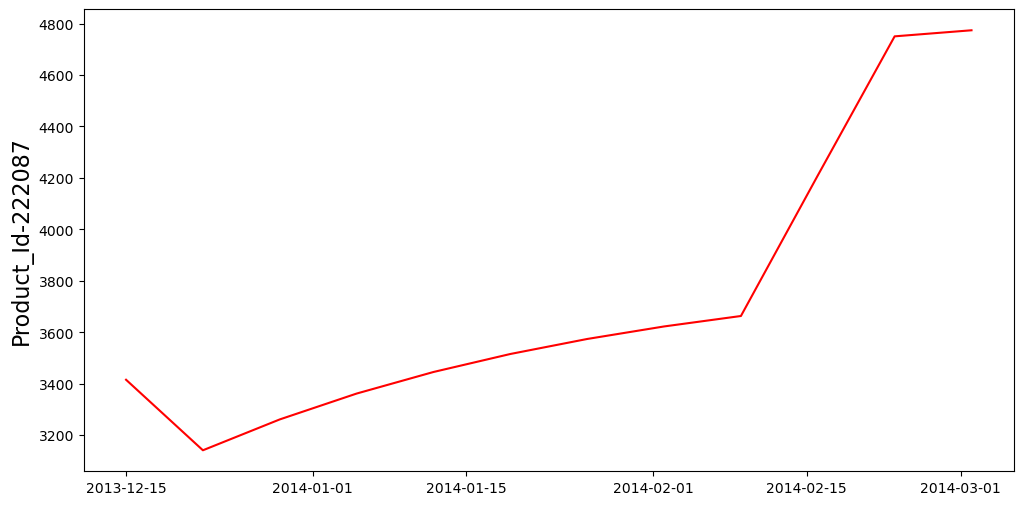

In [91]:
plt.figure(figsize=(12,6))
plt.plot(forecast12, color='red')
plt.ylabel('Product_Id-222087', fontsize=16)
plt.show()

# PRODUCT 13 : ID-320485

In [92]:
data13=create_data(320485)
data13

rolling_mean
date                    
2011-01-09   1206.171053
2011-01-16   1003.000000
2011-01-23   1169.000000
2011-01-30   1317.000000
2011-02-06   1217.500000
...                  ...
2013-11-10   1018.000000
2013-11-17   1081.000000
2013-11-24   1081.000000
2013-12-01   1081.000000
2013-12-08   1092.000000

[153 rows x 1 columns]

ADF Statistic: -3.649532
p-value: 0.004882


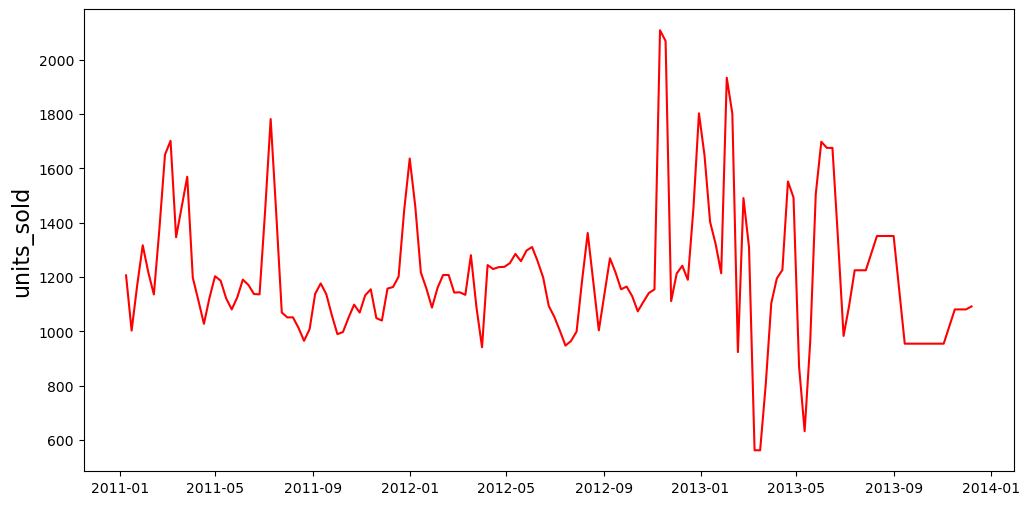

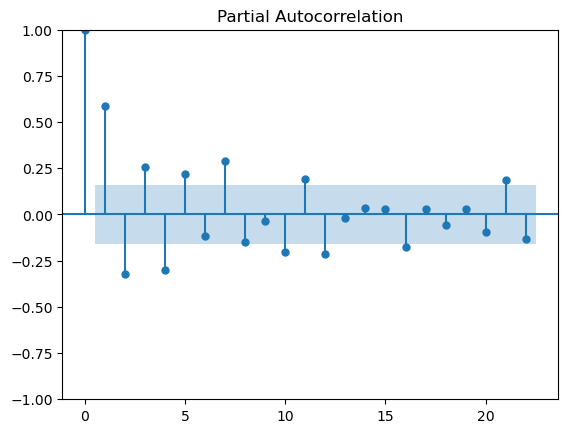

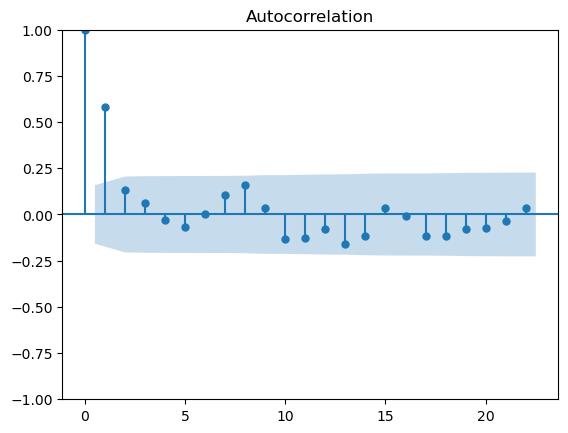

In [93]:
plot(320485)
dickey_fuller(320485)
corr_plot(320485)

In [94]:
model=auto_arima(data13,m=5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 5)   Log Likelihood                -993.037
Date:                            Sun, 15 Oct 2023   AIC                           2000.075
Time:                                    10:42:51   BIC                           2021.288
Sample:                                01-09-2011   HQIC                          2008.692
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    519.7552   2060.989      0.252      0.801   -3519.710    4559.220
ar.L1          0.6499      1.964      0.331      0.741      -3.200       4.500
ar.L2         -0.0557      0.357     -0.156      0.876      -0.755       0.644
ma.L1          0.4976      1.970      0.253      0.801      -3.363       4.359
ma.L2         -0.4873      1.943     -0.251      0.802      -4.295       3.321
ar.S.L5       -0.0619      0.087     -0.712      0.476      -0.232       0.109
sigma2      2.615e+04   1994.545     13.113      0.000    2.22e+04    3.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               672.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             2.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
forecast13=pd.DataFrame(model.predict(12))
forecast13.rename(columns={0:'320485_forecast'},inplace=True)
forecast13


320485_forecast
2013-12-15      1135.513592
2013-12-22      1194.867350
2013-12-29      1206.116017
2014-01-05      1209.905420
2014-01-12      1211.060642
2014-01-19      1209.348110
2014-01-26      1206.208218
2014-02-02      1205.805368
2014-02-09      1205.731786
2014-02-16      1205.748588
2014-02-23      1205.903109
2014-03-02      1206.124157

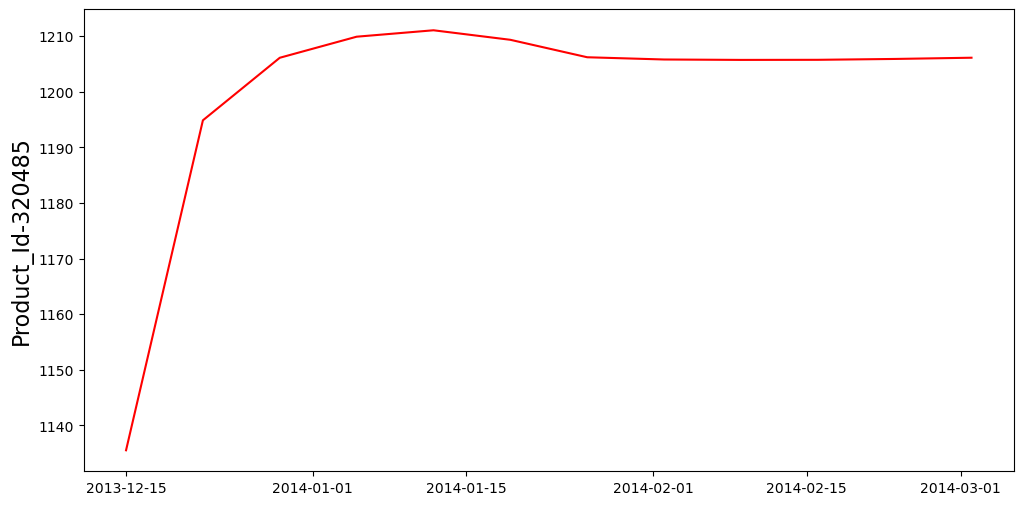

In [96]:
plt.figure(figsize=(12,6))
plt.plot(forecast13, color='red')
plt.ylabel('Product_Id-320485', fontsize=16)
plt.show()

# Product 14 : ID-378934

In [97]:
data14=create_data(378934)
data14

rolling_mean
date                    
2011-01-09    787.328947
2011-01-16    602.000000
2011-01-23    716.500000
2011-01-30    871.000000
2011-02-06    843.500000
...                  ...
2013-11-10    569.500000
2013-11-17    641.000000
2013-11-24    641.000000
2013-12-01    641.000000
2013-12-08    700.500000

[153 rows x 1 columns]

ADF Statistic: -3.088460
p-value: 0.027419


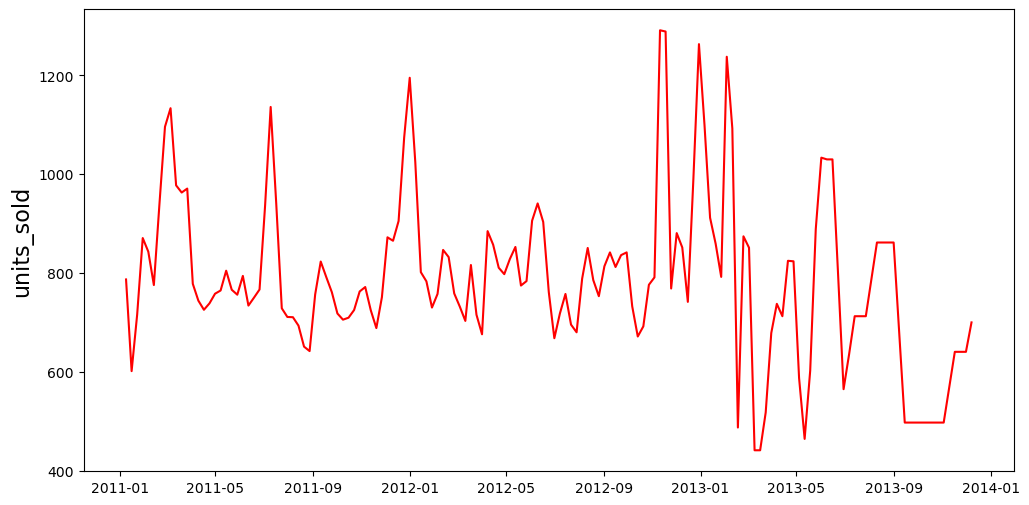

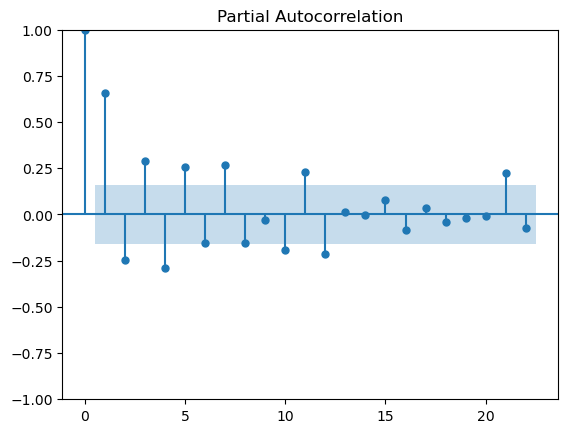

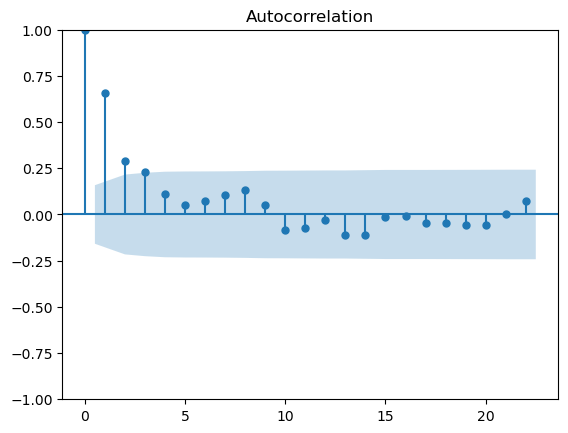

In [98]:
plot(378934)
dickey_fuller(378934)
corr_plot(378934)

In [99]:
model=auto_arima(data14,m=6)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  153
Model:             SARIMAX(5, 0, 0)x(1, 0, 0, 6)   Log Likelihood                -926.179
Date:                           Sun, 15 Oct 2023   AIC                           1868.358
Time:                                   10:43:24   BIC                           1892.601
Sample:                               01-09-2011   HQIC                          1878.206
                                    - 12-08-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    227.5122     70.716      3.217      0.001      88.912     366.113
ar.L1          1.0496      0.057     18.311      0.000       0.937       1.162
ar.L2         -0.7883      0.066    -11.855      0.000      -0.919      -0.658
ar.L3          0.7753      0.076     10.207      0.000       0.626       0.924
ar.L4         -0.7677      0.093     -8.228      0.000      -0.951      -0.585
ar.L5          0.5284      0.056      9.473      0.000       0.419       0.638
ar.S.L6       -0.4248      0.079     -5.402      0.000      -0.579      -0.271
sigma2      1.044e+04    771.704     13.526      0.000    8925.558     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):               161.44
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
forecast14=pd.DataFrame(model.predict(12))
forecast14.rename(columns={0:'378934_forecast'},inplace=True)
forecast14

378934_forecast
2013-12-15       720.351155
2013-12-22       701.690108
2013-12-29       714.091233
2014-01-05       719.466911
2014-01-12       716.669740
2014-01-19       718.883815
2014-01-26       719.027263
2014-02-02       730.589969
2014-02-09       748.677535
2014-02-16       752.109875
2014-02-23       751.645868
2014-03-02       764.312762

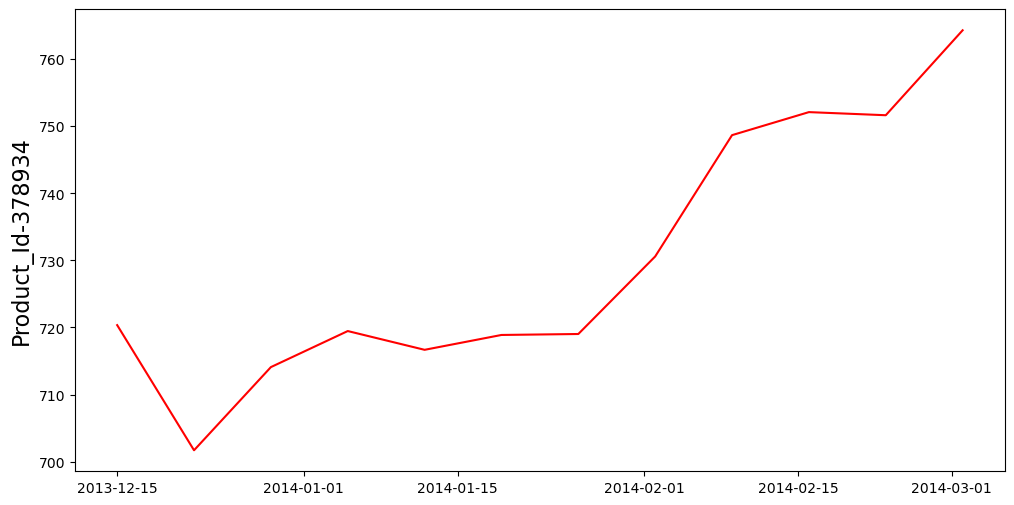

In [101]:
plt.figure(figsize=(12,6))
plt.plot(forecast14, color='red')
plt.ylabel('Product_Id-378934', fontsize=16)
plt.show()

# PRODUCT 15 : ID-222765


In [102]:
data15=create_data(222765)
data15

rolling_mean
date                    
2011-01-09   3858.009868
2011-01-16   4472.000000
2011-01-23   3605.500000
2011-01-30   2676.000000
2011-02-06   2548.000000
...                  ...
2013-11-10   3641.500000
2013-11-17   3574.000000
2013-11-24   3574.000000
2013-12-01   3574.000000
2013-12-08   3319.500000

[153 rows x 1 columns]

ADF Statistic: -3.866846
p-value: 0.002293


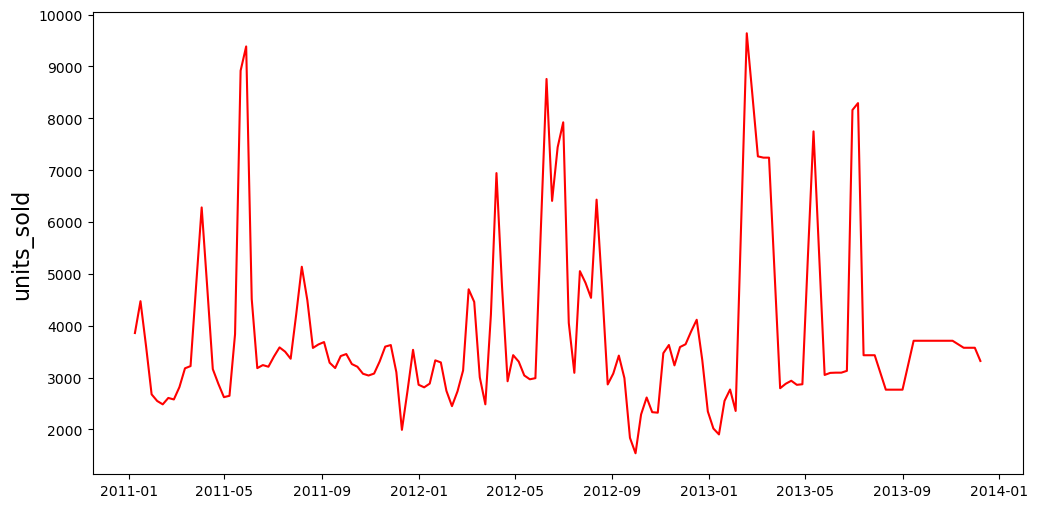

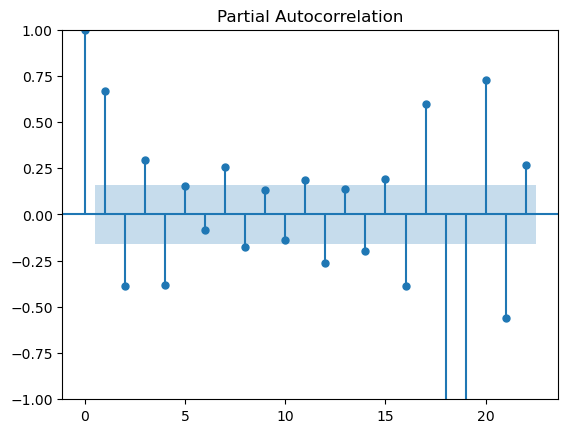

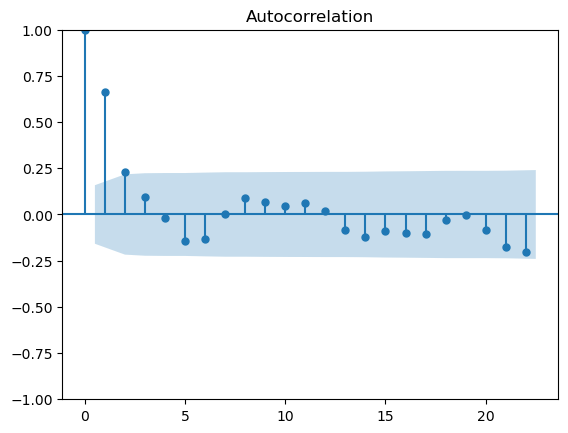

In [103]:
plot(222765)
dickey_fuller(222765)
corr_plot(222765)

In [104]:
model=auto_arima(data15,m=6)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(1, 0, 3)x(1, 0, [], 6)   Log Likelihood               -1264.052
Date:                            Sun, 15 Oct 2023   AIC                           2542.105
Time:                                    10:43:59   BIC                           2563.318
Sample:                                01-09-2011   HQIC                          2550.722
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1545.8620   3328.982      0.464      0.642   -4978.822    8070.546
ar.L1          0.6428      0.781      0.823      0.410      -0.888       2.173
ma.L1          0.6818      0.791      0.862      0.389      -0.869       2.232
ma.L2         -0.4184      1.094     -0.382      0.702      -2.564       1.727
ma.L3         -0.1421      0.333     -0.427      0.669      -0.794       0.510
ar.S.L6       -0.1236      0.112     -1.107      0.268      -0.342       0.095
sigma2       8.57e+05   8.32e+04     10.299      0.000    6.94e+05    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               526.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             2.42
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
forecast15=pd.DataFrame(model.predict(12))
forecast15.rename(columns={0:'222765_forecast'},inplace=True)
forecast15


222765_forecast
2013-12-15      3447.424078
2013-12-22      3733.426748
2013-12-29      3825.739743
2014-01-05      3847.208100
2014-01-12      3861.007529
2014-01-19      3901.326130
2014-01-26      3891.219987
2014-02-02      3859.543374
2014-02-09      3850.491890
2014-02-16      3849.353205
2014-02-23      3848.621281
2014-03-02      3844.264706

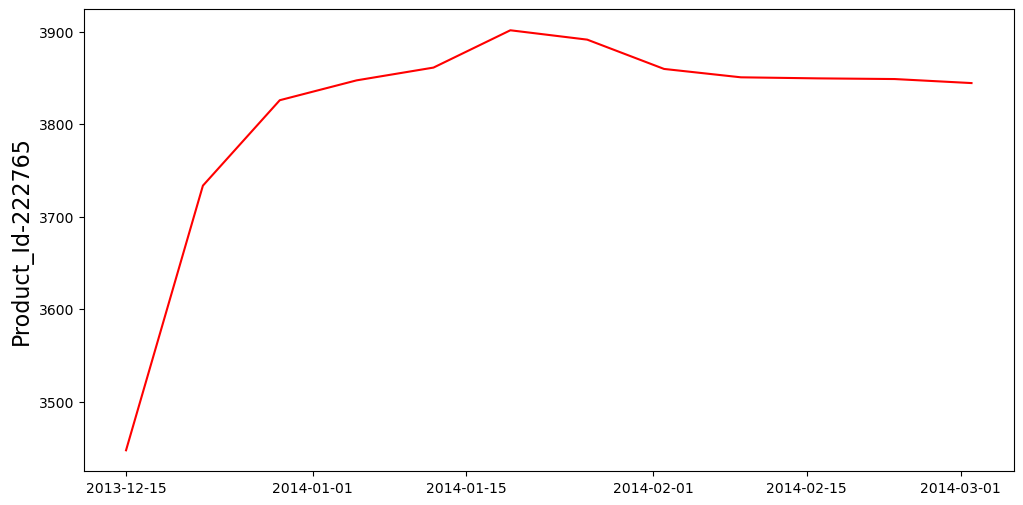

In [106]:
plt.figure(figsize=(12,6))
plt.plot(forecast15, color='red')
plt.ylabel('Product_Id-222765', fontsize=16)
plt.show()

# PRODUCT 16 : ID-245387


In [107]:
data16=create_data(245387)
data16

rolling_mean
date                    
2011-01-09   1163.598684
2011-01-16    594.000000
2011-01-23   1003.000000
2011-01-30   1362.000000
2011-02-06    990.500000
...                  ...
2013-11-10   1726.500000
2013-11-17   1403.000000
2013-11-24   1403.000000
2013-12-01   1403.000000
2013-12-08   2293.500000

[153 rows x 1 columns]

ADF Statistic: -3.493497
p-value: 0.008156


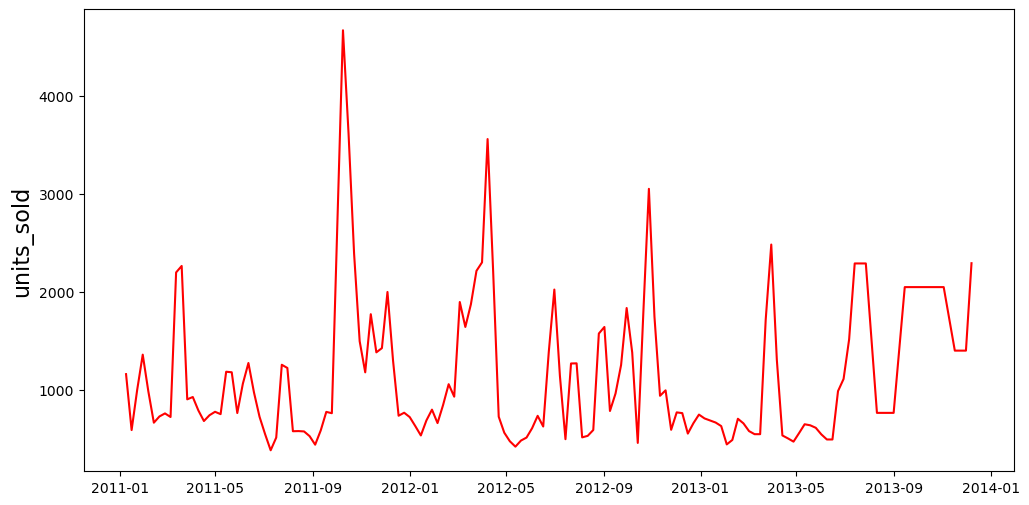

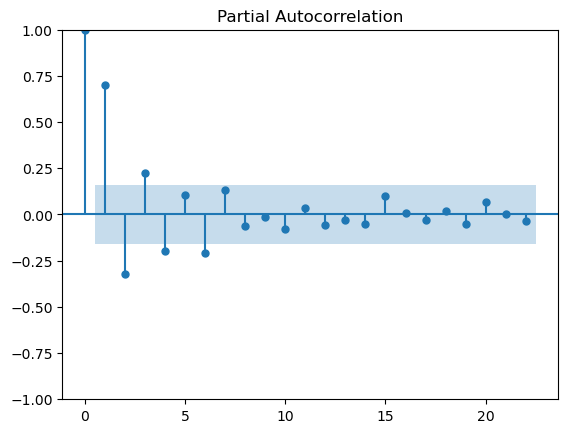

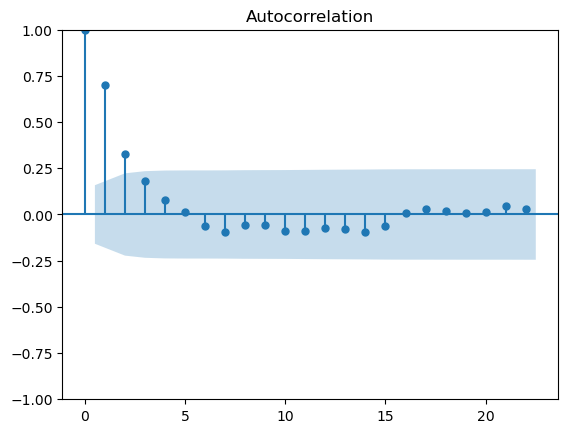

In [108]:
plot(245387)
dickey_fuller(245387)
corr_plot(245387)

In [109]:
model=auto_arima(data16,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  153
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 2)   Log Likelihood               -1149.728
Date:                             Sun, 15 Oct 2023   AIC                           2309.456
Time:                                     10:44:13   BIC                           2324.609
Sample:                                 01-09-2011   HQIC                          2315.611
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     59.1660     34.446      1.718      0.086      -8.348     126.680
ar.L1          0.9328      0.039     23.829      0.000       0.856       1.010
ar.S.L2        0.2487      0.108      2.300      0.021       0.037       0.461
ma.S.L2       -0.9372      0.069    -13.587      0.000      -1.072      -0.802
sigma2      1.914e+05   2.36e+04      8.124      0.000    1.45e+05    2.38e+05
===================================================================================
Ljung-Box (L1) (Q):                  13.76   Jarque-Bera (JB):               129.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             1.67
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
forecast16=pd.DataFrame(model.predict(12))
forecast16.rename(columns={0:'245387_forecast'},inplace=True)
forecast16


245387_forecast
2013-12-15      2088.083463
2013-12-22      1278.219400
2013-12-29      1238.757613
2014-01-05      1048.178938
2014-01-12      1048.483203
2014-01-19      1010.522626
2014-01-26      1019.403740
2014-02-02      1018.176367
2014-02-09      1028.047598
2014-02-16      1034.890056
2014-02-23      1044.012852
2014-03-02      1051.934521

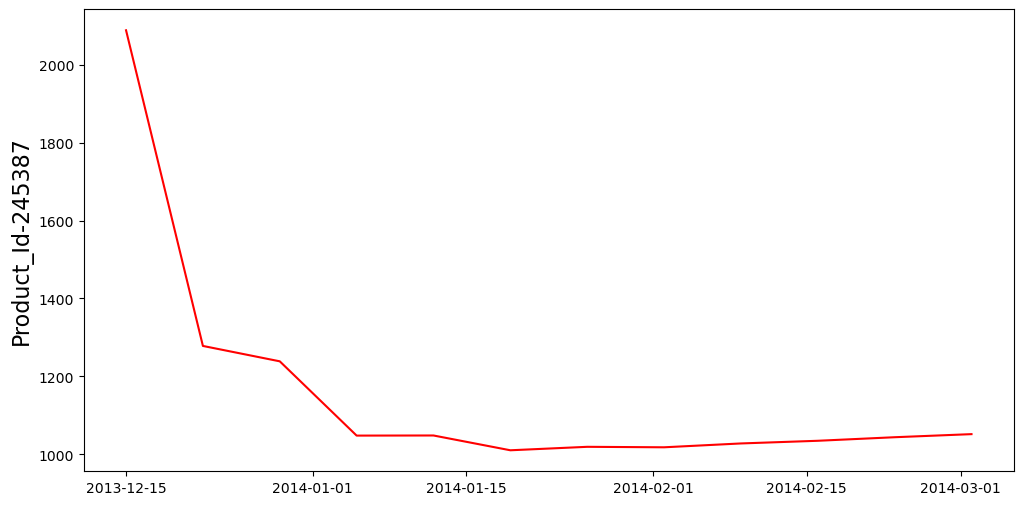

In [111]:
plt.figure(figsize=(12,6))
plt.plot(forecast16, color='red')
plt.ylabel('Product_Id-245387', fontsize=16)
plt.show()

# PROCUCT 17 : ID-245338

In [112]:
data17=create_data(245338)
data17

rolling_mean
date                    
2011-01-09   2149.914474
2011-01-16    988.000000
2011-01-23   1832.000000
2011-01-30   2453.000000
2011-02-06   1729.500000
...                  ...
2013-11-10   3370.000000
2013-11-17   2958.000000
2013-11-24   2958.000000
2013-12-01   2958.000000
2013-12-08   4510.000000

[153 rows x 1 columns]

ADF Statistic: -3.319401
p-value: 0.014033


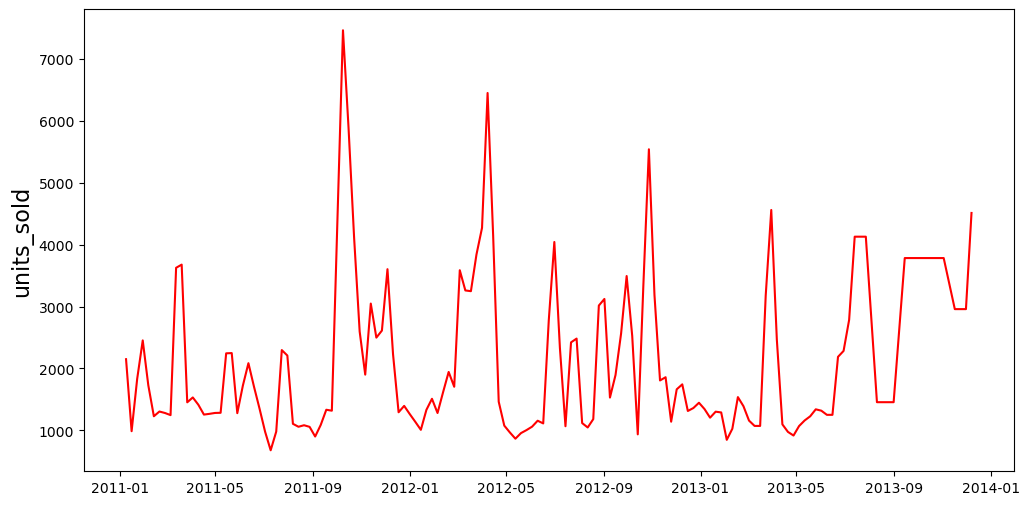

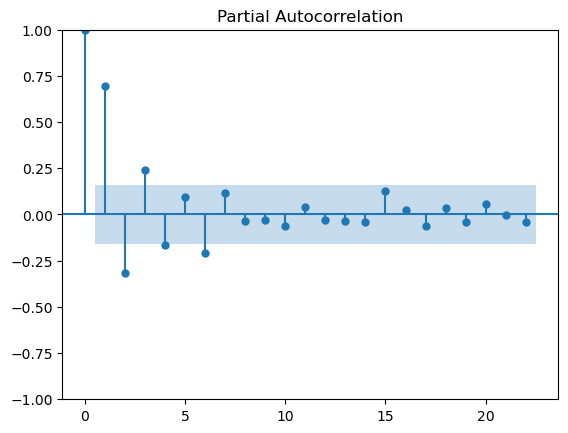

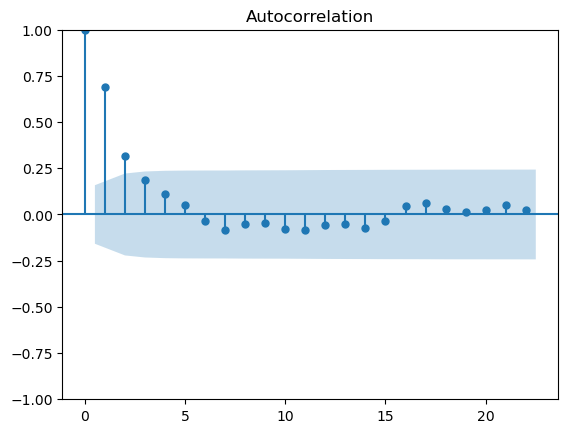

In [113]:
plot(245338)
dickey_fuller(245338)
corr_plot(245338)

In [114]:
model=auto_arima(data17,m=5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(4, 0, 1)x(2, 0, [], 5)   Log Likelihood               -1226.818
Date:                            Sun, 15 Oct 2023   AIC                           2471.636
Time:                                    10:44:40   BIC                           2498.910
Sample:                                01-09-2011   HQIC                          2482.715
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    759.3168    241.784      3.140      0.002     285.428    1233.206
ar.L1          0.8301      0.154      5.394      0.000       0.528       1.132
ar.L2         -0.5007      0.219     -2.284      0.022      -0.930      -0.071
ar.L3          0.5542      0.179      3.095      0.002       0.203       0.905
ar.L4         -0.4812      0.162     -2.973      0.003      -0.798      -0.164
ma.L1          0.5193      0.162      3.197      0.001       0.201       0.838
ar.S.L5        0.5650      0.159      3.550      0.000       0.253       0.877
ar.S.L10      -0.2128      0.132     -1.611      0.107      -0.472       0.046
sigma2      5.205e+05   6.11e+04      8.525      0.000    4.01e+05     6.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                49.31
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.12
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
forecast17=pd.DataFrame(model.predict(12))
forecast17.rename(columns={0:'245338_forecast'},inplace=True)
forecast17


245338_forecast
2013-12-15      4852.129899
2013-12-22      3268.528146
2013-12-29      2719.402409
2014-01-05      2511.746363
2014-01-12      2465.952416
2014-01-19      2430.670445
2014-01-26      1972.223447
2014-02-02      1698.303557
2014-02-09      1705.285244
2014-02-16      1779.452766
2014-02-23      1834.105382
2014-03-02      1870.410461

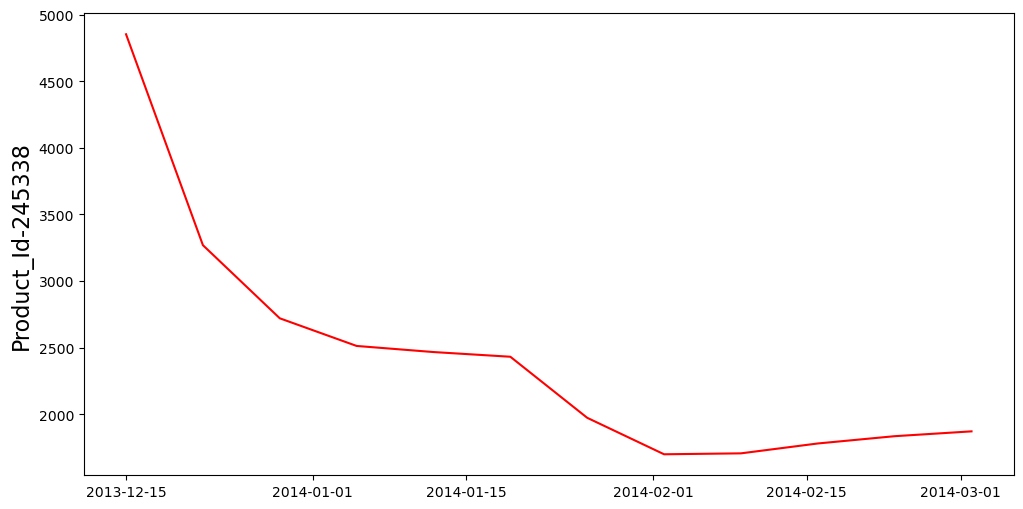

In [116]:
plt.figure(figsize=(12,6))
plt.plot(forecast17, color='red')
plt.ylabel('Product_Id-245338', fontsize=16)
plt.show()

# PRODUCT 18 : ID - 547934

In [117]:
data18=create_data(547934)
data18

rolling_mean
date                    
2011-01-09    709.411184
2011-01-16    481.000000
2011-01-23    486.000000
2011-01-30    494.000000
2011-02-06    909.000000
...                  ...
2013-11-10    869.000000
2013-11-17    560.000000
2013-11-24    560.000000
2013-12-01    560.000000
2013-12-08    517.000000

[153 rows x 1 columns]

ADF Statistic: -3.395821
p-value: 0.011102


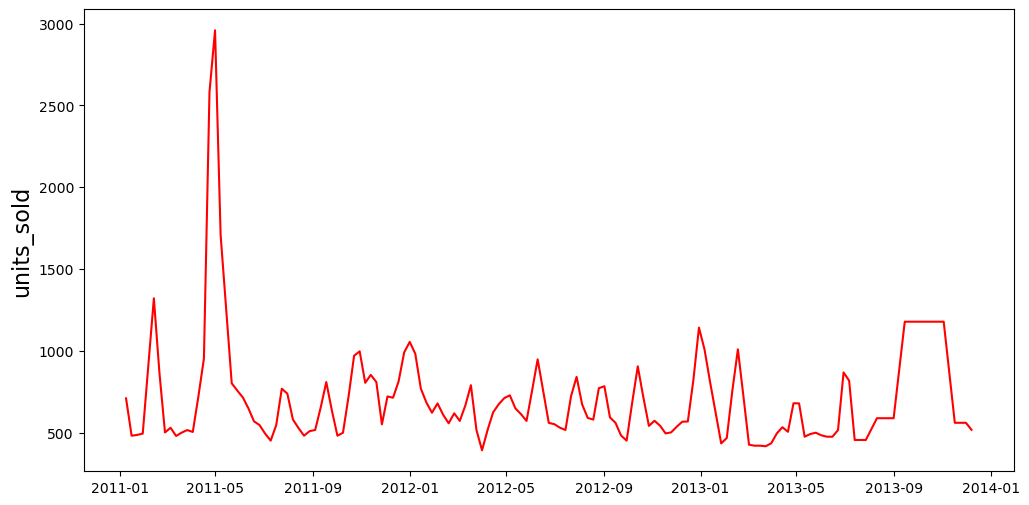

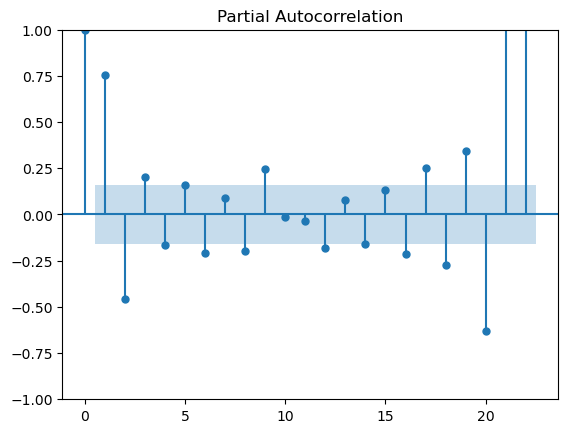

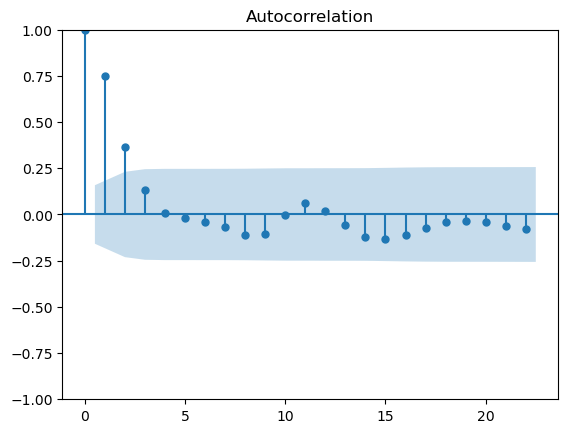

In [118]:
plot(547934)
dickey_fuller(547934)
corr_plot(547934)

In [119]:
model=auto_arima(data18,m=3)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  153
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1009.986
Date:                Sun, 15 Oct 2023   AIC                           2027.971
Time:                        10:45:04   BIC                           2040.093
Sample:                    01-09-2011   HQIC                          2032.895
                         - 12-08-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    398.9882     94.809      4.208      0.000     213.166     584.811
ar.L1          0.4372      0.105      4.161      0.000       0.231       0.643
ma.L1          0.9630      0.049     19.773      0.000       0.868       1.058
sigma2      3.099e+04   1370.684     22.609      0.000    2.83e+04    3.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             14611.32
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             5.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
forecast18=pd.DataFrame(model.predict(12))
forecast18.rename(columns={0:'547934_forecast'},inplace=True)
forecast18


547934_forecast
2013-12-15       558.829243
2013-12-22       643.282451
2013-12-29       680.201479
2014-01-05       696.340767
2014-01-12       703.396116
2014-01-19       706.480388
2014-01-26       707.828688
2014-02-02       708.418103
2014-02-09       708.675767
2014-02-16       708.788406
2014-02-23       708.837647
2014-03-02       708.859173

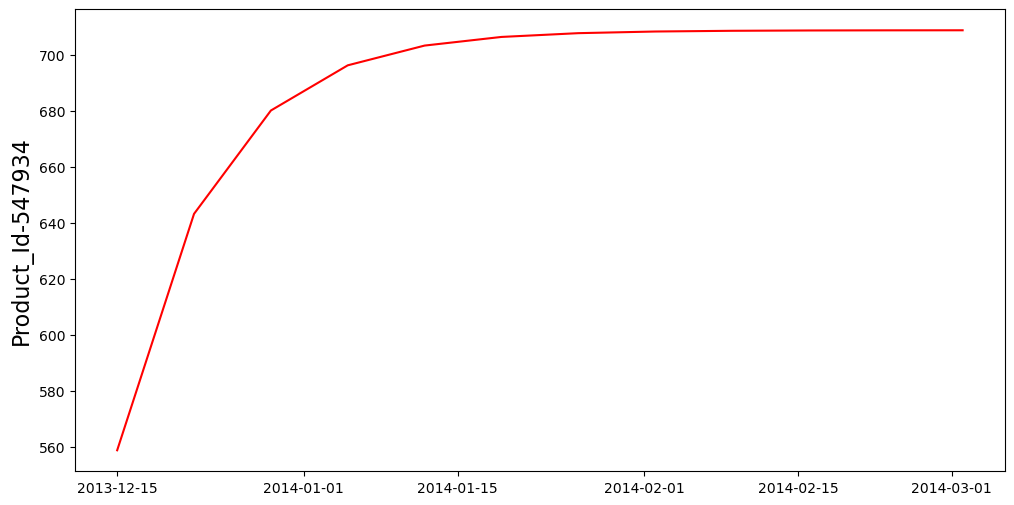

In [121]:
plt.figure(figsize=(12,6))
plt.plot(forecast18, color='red')
plt.ylabel('Product_Id-547934', fontsize=16)
plt.show()

# PRODUCT 19 : ID-300291


In [122]:
data19=create_data(300291)
data19

rolling_mean
date                    
2011-01-09    156.335526
2011-01-16    108.000000
2011-01-23     96.000000
2011-01-30    304.000000
2011-02-06    385.500000
...                  ...
2013-11-10    127.000000
2013-11-17    135.000000
2013-11-24    135.000000
2013-12-01    135.000000
2013-12-08    161.500000

[153 rows x 1 columns]

ADF Statistic: -4.408320
p-value: 0.000287


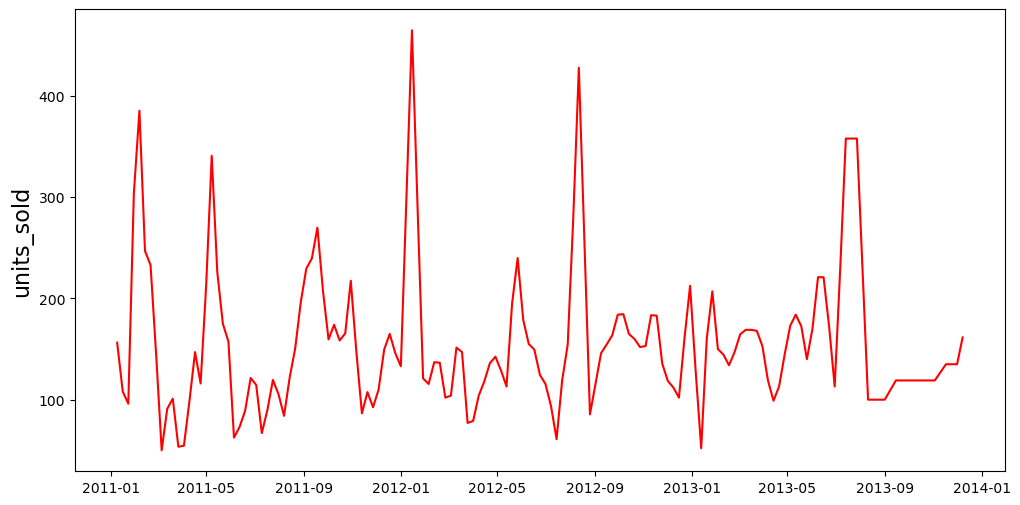

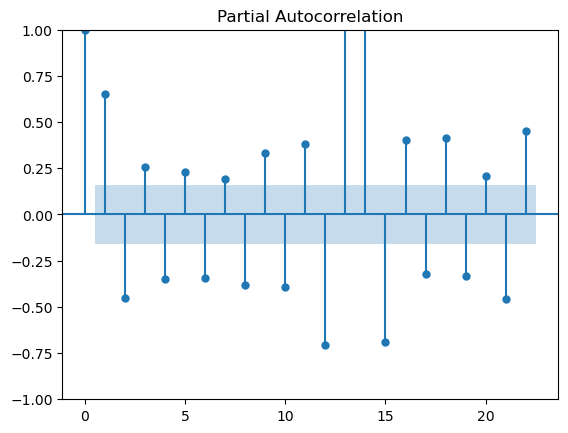

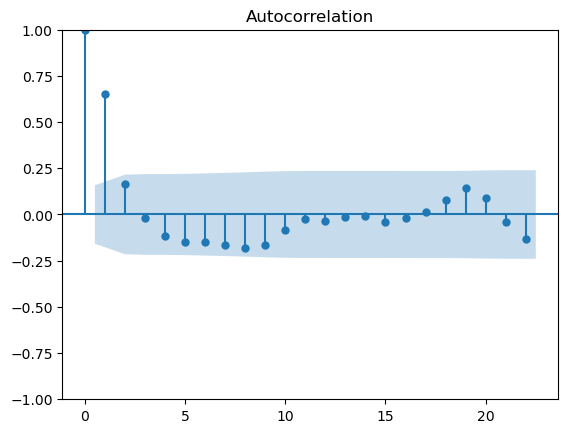

In [123]:
plot(300291)
dickey_fuller(300291)
corr_plot(300291)

In [124]:
model=auto_arima(data19,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  153
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 2)   Log Likelihood                -779.139
Date:                           Sun, 15 Oct 2023   AIC                           1572.277
Time:                                   10:45:21   BIC                           1593.491
Sample:                               01-09-2011   HQIC                          1580.895
                                    - 12-08-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.8263     10.677      3.168      0.002      12.900      54.752
ar.L1          0.5854      0.229      2.556      0.011       0.137       1.034
ma.L1          0.8095      0.206      3.930      0.000       0.406       1.213
ar.S.L2        0.4499      0.295      1.525      0.127      -0.128       1.028
ar.S.L4        0.0317      0.099      0.322      0.748      -0.162       0.225
ma.S.L2       -0.8792      0.100     -8.810      0.000      -1.075      -0.684
sigma2      1491.3693    132.974     11.216      0.000    1230.746    1751.993
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               128.73
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
forecast19=pd.DataFrame(model.predict(12))
forecast19.rename(columns={0:'300291_forecast'},inplace=True)
forecast19


300291_forecast
2013-12-15       187.833802
2013-12-22       180.962633
2013-12-29       173.460674
2014-01-05       169.934720
2014-01-12       166.648567
2014-01-19       164.407001
2014-01-26       162.434561
2014-02-02       161.164360
2014-02-09       160.084970
2014-02-16       159.391028
2014-02-23       158.812762
2014-03-02       158.442655

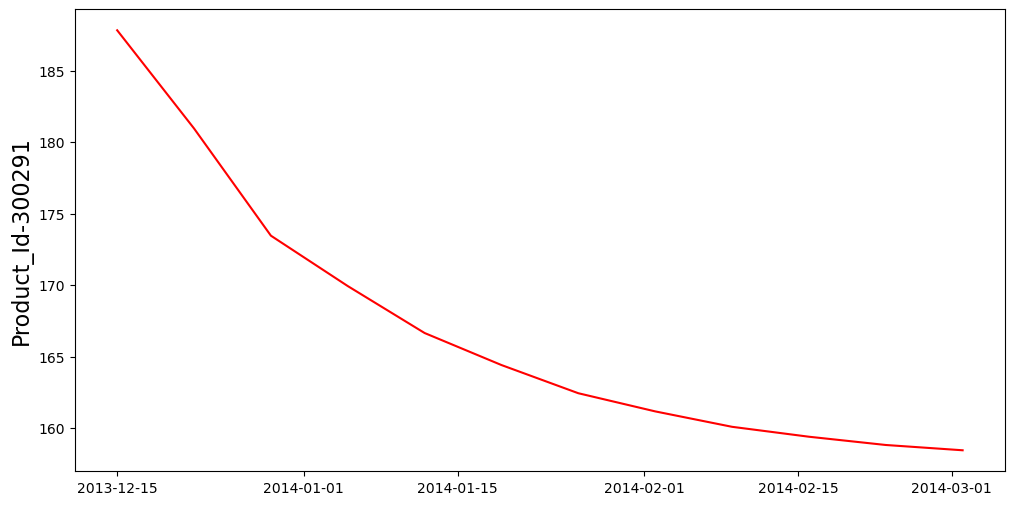

In [126]:
plt.figure(figsize=(12,6))
plt.plot(forecast19, color='red')
plt.ylabel('Product_Id-300291', fontsize=16)
plt.show()

# PRODUCT 20 : ID-217217

In [127]:
data20=create_data(217217)
data20

rolling_mean
date                    
2011-01-09    605.404605
2011-01-16    560.000000
2011-01-23    677.000000
2011-01-30    772.000000
2011-02-06    714.000000
...                  ...
2013-11-10    699.500000
2013-11-17    559.000000
2013-11-24    559.000000
2013-12-01    559.000000
2013-12-08    539.000000

[153 rows x 1 columns]

ADF Statistic: -4.322896
p-value: 0.000405


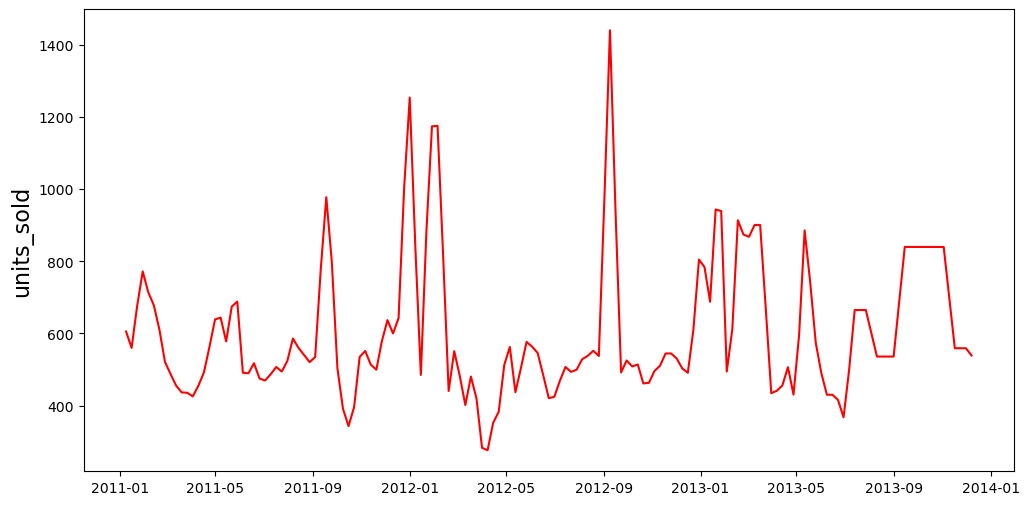

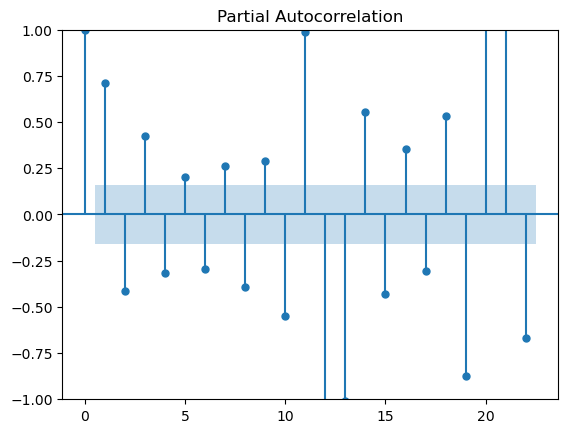

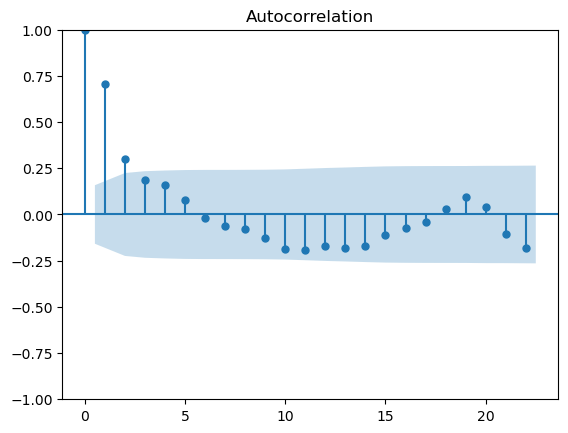

In [128]:
plot(217217)
dickey_fuller(217217)
corr_plot(217217)

In [129]:
model=auto_arima(data20,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 2)   Log Likelihood                -917.765
Date:                            Sun, 15 Oct 2023   AIC                           1845.530
Time:                                    10:45:32   BIC                           1860.682
Sample:                                01-09-2011   HQIC                          1851.685
                                     - 12-08-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    303.0677     57.138      5.304      0.000     191.078     415.057
ar.L1          0.5959      0.066      9.051      0.000       0.467       0.725
ma.L1          0.9599      0.034     28.273      0.000       0.893       1.026
ar.S.L2       -0.2435      0.067     -3.639      0.000      -0.375      -0.112
sigma2      9069.5058    798.288     11.361      0.000    7504.889    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               146.15
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             1.20
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
forecast20=pd.DataFrame(model.predict(12))
forecast20.rename(columns={0:'217217_forecast'},inplace=True)
forecast20


217217_forecast
2013-12-15       545.091903
2013-12-22       577.745675
2013-12-29       592.818722
2014-01-05       594.734282
2014-01-12       596.943188
2014-01-19       599.979741
2014-01-26       601.529266
2014-02-02       602.033764
2014-02-09       602.397654
2014-02-16       602.716456
2014-02-23       602.891019
2014-03-02       602.970211

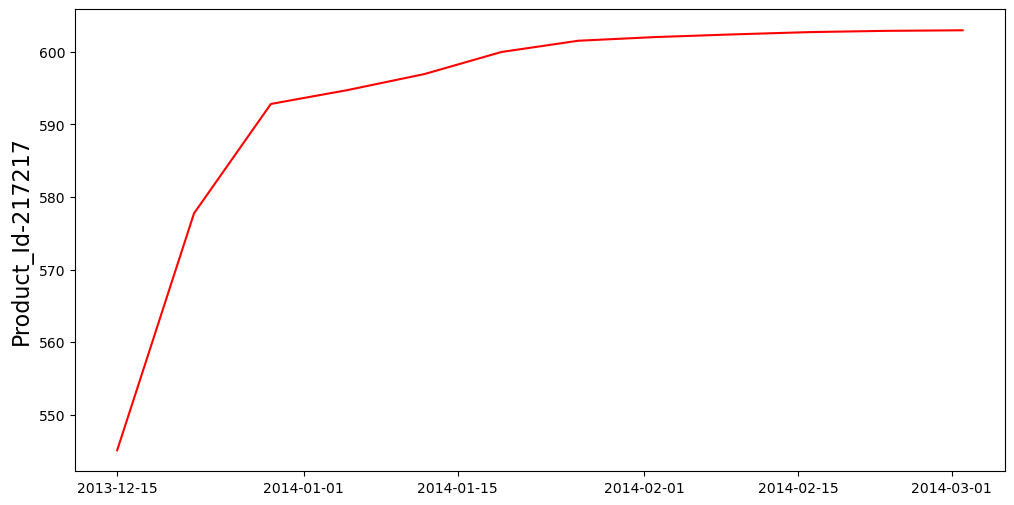

In [131]:
plt.figure(figsize=(12,6))
plt.plot(forecast20, color='red')
plt.ylabel('Product_Id-217217', fontsize=16)
plt.show()

# PRODUCT 21: ID-217777


In [132]:
data21=create_data(217777)
data21

rolling_mean
date                    
2011-01-09    519.069079
2011-01-16    517.000000
2011-01-23    579.500000
2011-01-30    596.000000
2011-02-06    560.500000
...                  ...
2013-11-10    647.000000
2013-11-17    541.000000
2013-11-24    541.000000
2013-12-01    541.000000
2013-12-08    484.500000

[153 rows x 1 columns]

ADF Statistic: -4.446128
p-value: 0.000246


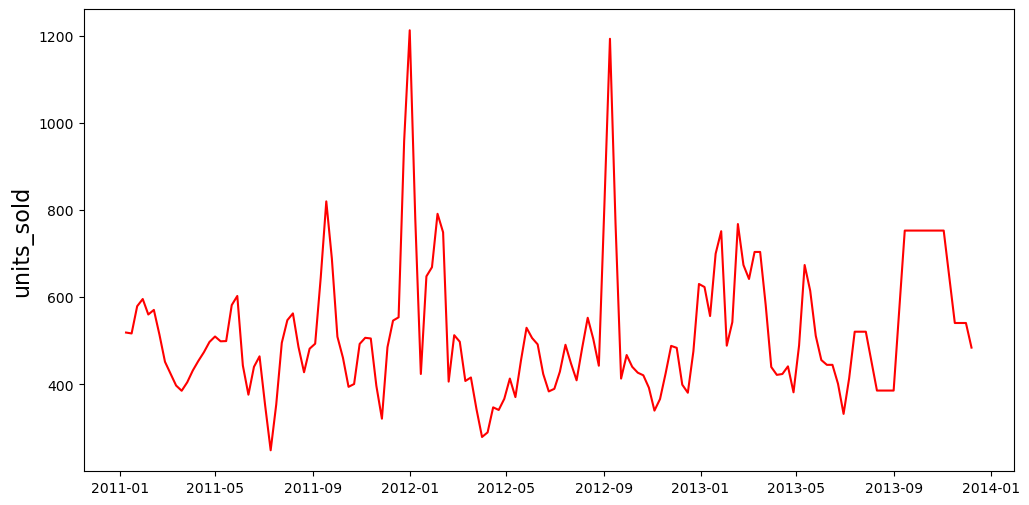

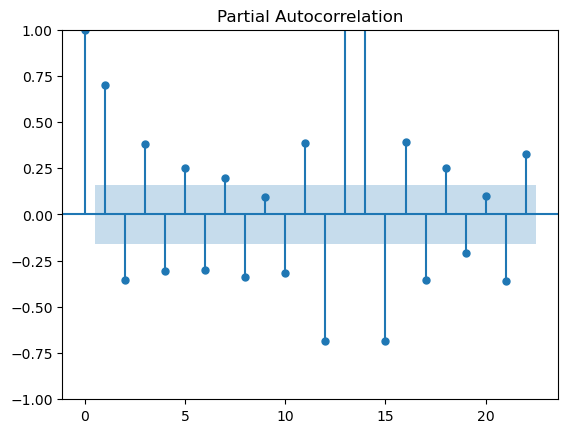

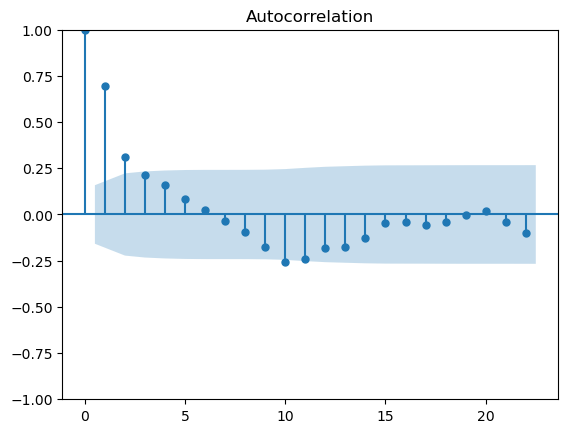

In [133]:
plot(217777)
dickey_fuller(217777)
corr_plot(217777)

In [134]:
model=auto_arima(data21,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  153
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 2)   Log Likelihood                -891.595
Date:                           Sun, 15 Oct 2023   AIC                           1795.191
Time:                                   10:45:48   BIC                           1813.373
Sample:                               01-09-2011   HQIC                          1802.577
                                    - 12-08-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    204.3835    106.756      1.914      0.056      -4.854     413.621
ar.L1          0.5358      0.066      8.094      0.000       0.406       0.666
ma.L1          0.9743      0.038     25.313      0.000       0.899       1.050
ar.S.L2        0.1491      0.408      0.366      0.715      -0.650       0.948
ma.S.L2       -0.3312      0.425     -0.779      0.436      -1.165       0.502
sigma2      6548.8322    530.486     12.345      0.000    5509.099    7588.565
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               249.61
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.45
Prob(H) (two-sided):                  0.66   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
forecast21=pd.DataFrame(model.predict(12))
forecast21.rename(columns={0:'217777_forecast'},inplace=True)
forecast21

217777_forecast
2013-12-15       451.416502
2013-12-22       488.558201
2013-12-29       509.962818
2014-01-05       514.407571
2014-01-12       517.013373
2014-01-19       517.362128
2014-01-26       517.582441
2014-02-02       517.544286
2014-02-09       517.528831
2014-02-16       517.497258
2014-02-23       517.481085
2014-03-02       517.468945

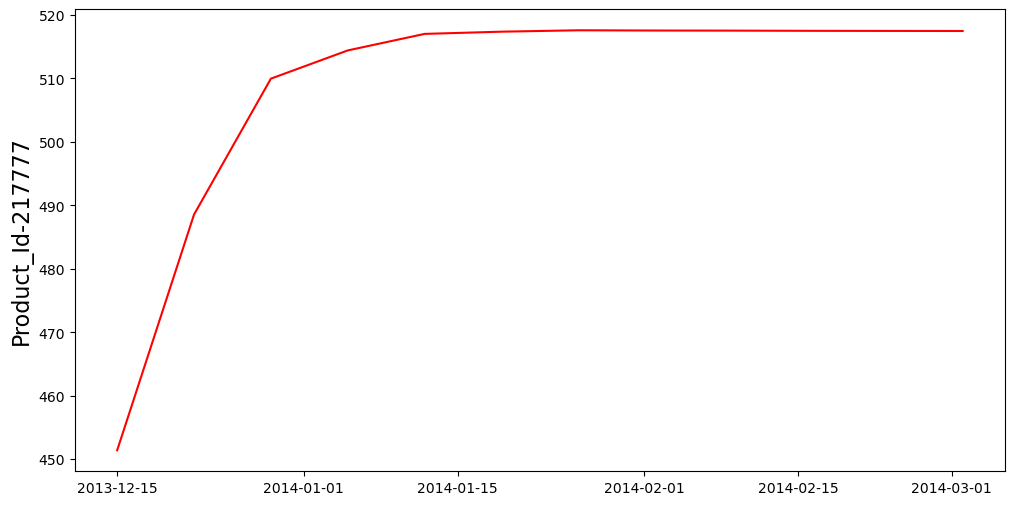

In [136]:
plt.figure(figsize=(12,6))
plt.plot(forecast21, color='red')
plt.ylabel('Product_Id-217777', fontsize=16)
plt.show()

# PRODUCT 22: ID-398721 

In [137]:
data22=create_data(398721)
data22

rolling_mean
date                    
2011-01-09    368.740132
2011-01-16    136.000000
2011-01-23    236.500000
2011-01-30    336.000000
2011-02-06    275.000000
...                  ...
2013-11-10    592.000000
2013-11-17    484.000000
2013-11-24    484.000000
2013-12-01    484.000000
2013-12-08    766.500000

[153 rows x 1 columns]

ADF Statistic: -3.716256
p-value: 0.003890


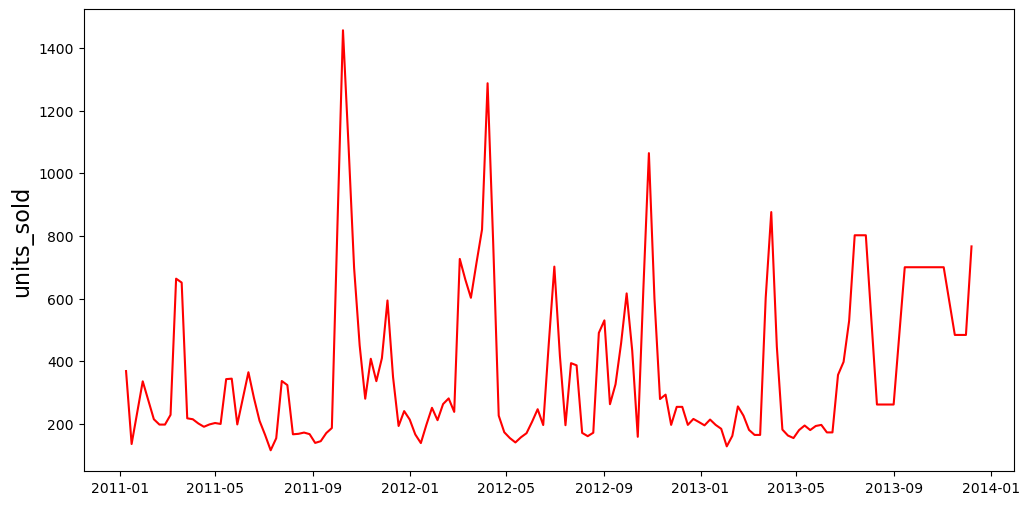

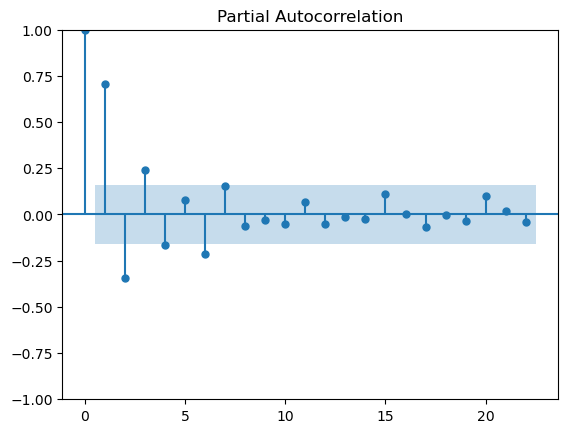

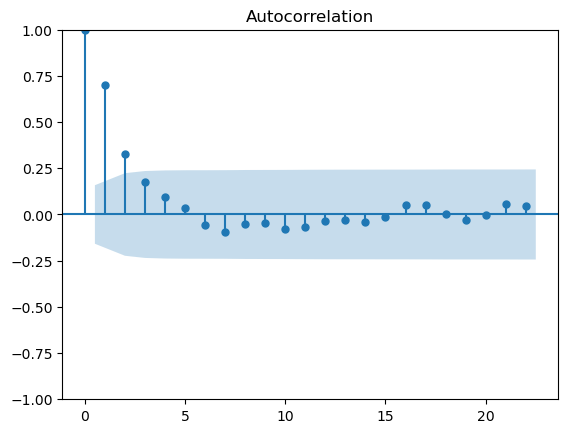

In [138]:
plot(398721)
dickey_fuller(398721)
corr_plot(398721)

In [139]:
model=auto_arima(data22,m=6)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  153
Model:             SARIMAX(5, 0, 1)x(0, 0, 1, 6)   Log Likelihood                -974.482
Date:                           Sun, 15 Oct 2023   AIC                           1966.964
Time:                                   10:46:41   BIC                           1994.238
Sample:                               01-09-2011   HQIC                          1978.044
                                    - 12-08-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    111.8513     71.433      1.566      0.117     -28.154     251.857
ar.L1          0.4163      0.074      5.637      0.000       0.272       0.561
ar.L2          0.0571      0.083      0.692      0.489      -0.105       0.219
ar.L3          0.0856      0.104      0.822      0.411      -0.118       0.290
ar.L4         -0.0284      0.085     -0.335      0.737      -0.194       0.137
ar.L5          0.1436      0.116      1.242      0.214      -0.083       0.370
ma.L1          0.9884      0.056     17.664      0.000       0.879       1.098
ma.S.L6       -0.1211      0.126     -0.960      0.337      -0.368       0.126
sigma2      1.911e+04   2318.879      8.241      0.000    1.46e+04    2.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               141.83
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.61
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
forecast22=pd.DataFrame(model.predict(12))
forecast22.rename(columns={0:'398721_forecast'},inplace=True)
forecast22


398721_forecast
2013-12-15       843.180857
2013-12-22       600.300489
2013-12-29       535.464188
2014-01-05       487.340956
2014-01-12       479.358615
2014-01-19       450.448043
2014-01-26       404.477599
2014-02-02       410.024025
2014-02-09       400.550975
2014-02-16       392.663088
2014-02-23       386.466748
2014-03-02       375.869525

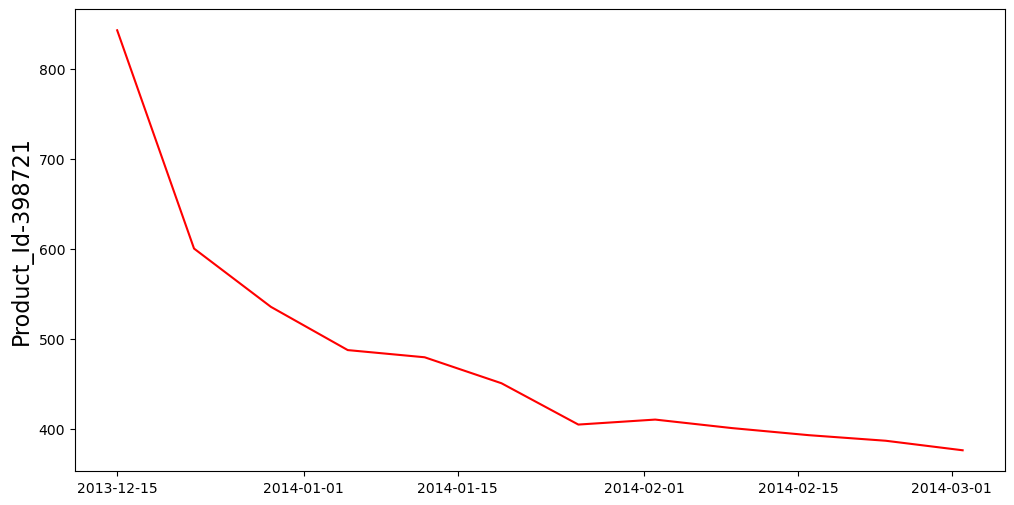

In [141]:
plt.figure(figsize=(12,6))
plt.plot(forecast22, color='red')
plt.ylabel('Product_Id-398721', fontsize=16)
plt.show()

# PRODUCT 23: ID-679023

In [142]:
data23=create_data(679023)
data23

rolling_mean
date                    
2011-01-09    143.253289
2011-01-16    196.000000
2011-01-23    158.500000
2011-01-30    132.000000
2011-02-06    126.000000
...                  ...
2013-11-10     96.000000
2013-11-17    119.000000
2013-11-24    119.000000
2013-12-01    119.000000
2013-12-08    142.000000

[153 rows x 1 columns]

ADF Statistic: -2.007754
p-value: 0.283184


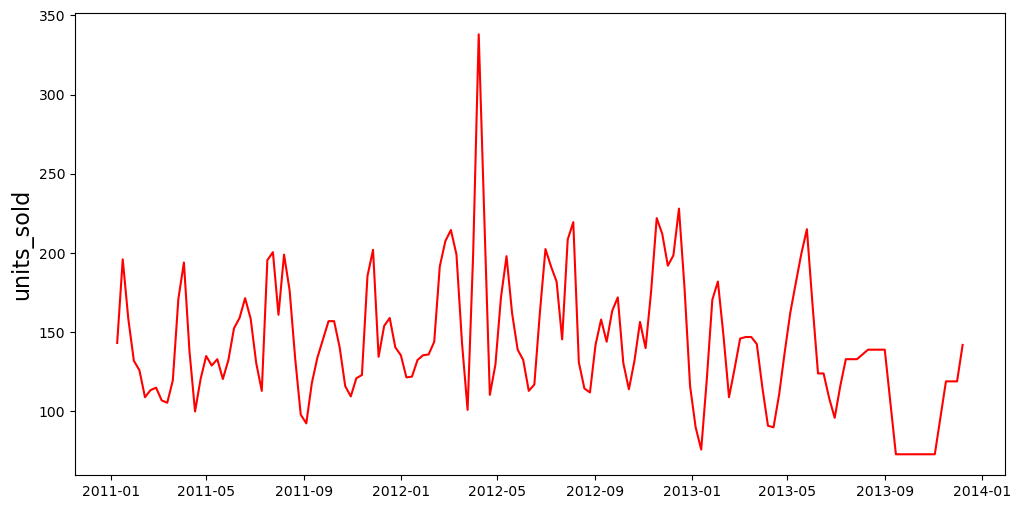

In [143]:
plot(679023)
dickey_fuller(679023)

In [144]:
data23_diff=data23.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data23_diff)
p_value= result[1]
p_value

1.3299130224668172e-09

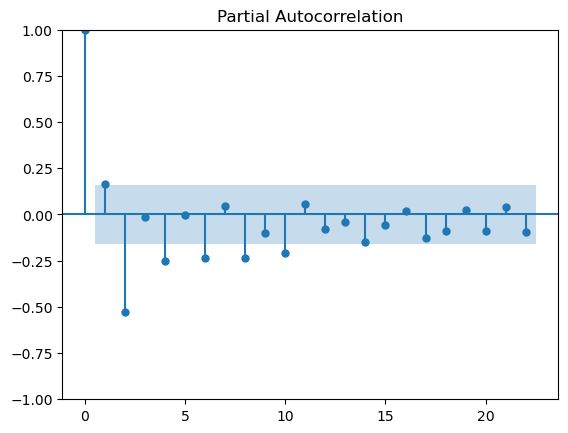

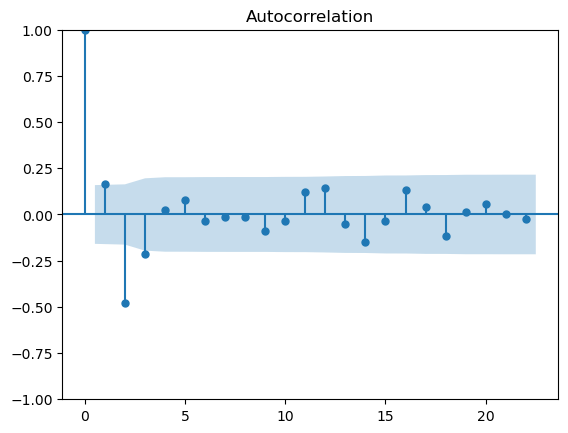

In [145]:
plot_pacf(data23_diff)
plot_acf(data23_diff)
plt.show()

In [146]:
model=auto_arima(data23_diff,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  152
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 2)   Log Likelihood                -698.710
Date:                             Sun, 15 Oct 2023   AIC                           1403.421
Time:                                     10:46:54   BIC                           1412.493
Sample:                                 01-16-2011   HQIC                          1407.106
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2981      0.052      5.784      0.000       0.197       0.399
ma.S.L2       -0.9441      0.034    -27.853      0.000      -1.011      -0.878
sigma2       559.4873     41.394     13.516      0.000     478.356     640.619
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               139.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             1.45
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
prediction_info23=model.predict(12)
prediction_info23=(prediction_info23+data23['rolling_mean'][-1])
forecast23=pd.DataFrame(prediction_info23)
forecast23.rename(columns={0:'679023_forecast'},inplace=True)
forecast23


679023_forecast
2013-12-15       150.784050
2013-12-22       126.568463
2013-12-29       137.399578
2014-01-05       140.628531
2014-01-12       141.591140
2014-01-19       141.878111
2014-01-26       141.963663
2014-02-02       141.989167
2014-02-09       141.996771
2014-02-16       141.999037
2014-02-23       141.999713
2014-03-02       141.999914

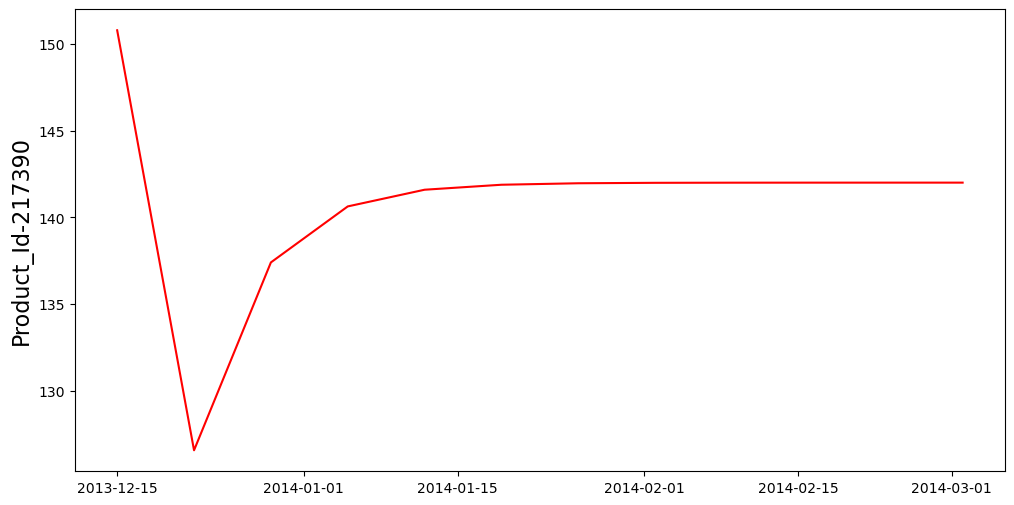

In [148]:
plt.figure(figsize=(12,6))
plt.plot(forecast23, color='red')
plt.ylabel('Product_Id-217390', fontsize=16)
plt.show()

# PRODUCT 24: ID-546789


In [149]:
data24=create_data(546789)
data24

rolling_mean
date                    
2011-01-09    165.684211
2011-01-16    212.000000
2011-01-23    173.000000
2011-01-30    145.500000
2011-02-06    152.000000
...                  ...
2013-11-10    122.000000
2013-11-17    138.000000
2013-11-24    138.000000
2013-12-01    138.000000
2013-12-08    170.000000

[153 rows x 1 columns]

ADF Statistic: -3.016230
p-value: 0.033406


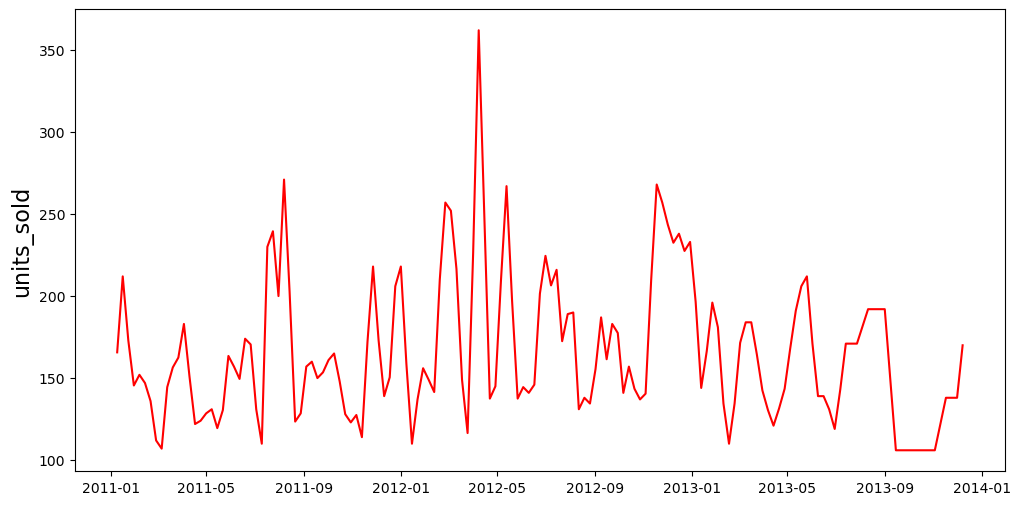

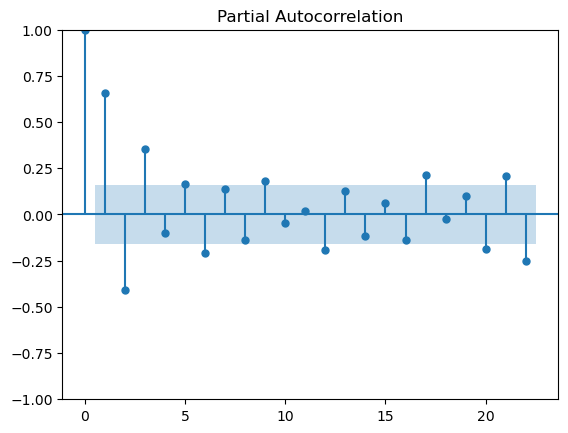

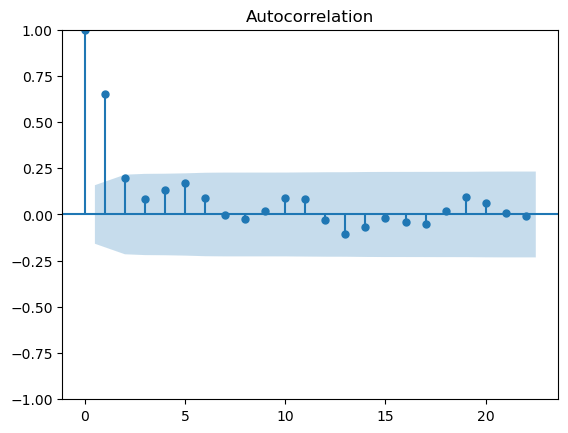

In [150]:
plot(546789)
dickey_fuller(546789)
corr_plot(546789)

In [151]:
model=auto_arima(data24,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  153
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 2)   Log Likelihood                -721.864
Date:                             Sun, 15 Oct 2023   AIC                           1451.728
Time:                                     10:47:08   BIC                           1463.850
Sample:                                 01-09-2011   HQIC                          1456.652
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3161      4.082      1.057      0.290      -3.684      12.316
ar.L1          0.9732      0.025     39.237      0.000       0.925       1.022
ma.S.L2       -0.8971      0.054    -16.514      0.000      -1.004      -0.791
sigma2       725.8730     79.587      9.120      0.000     569.885     881.861
===================================================================================
Ljung-Box (L1) (Q):                  12.93   Jarque-Bera (JB):                78.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             1.39
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
forecast24=pd.DataFrame(model.predict(12))
forecast24.rename(columns={0:'546789_forecast'},inplace=True)
forecast24


546789_forecast
2013-12-15       175.598902
2013-12-22       154.428028
2013-12-29       154.602851
2014-01-05       154.772985
2014-01-12       154.938556
2014-01-19       155.099688
2014-01-26       155.256498
2014-02-02       155.409104
2014-02-09       155.557617
2014-02-16       155.702147
2014-02-23       155.842802
2014-03-02       155.979685

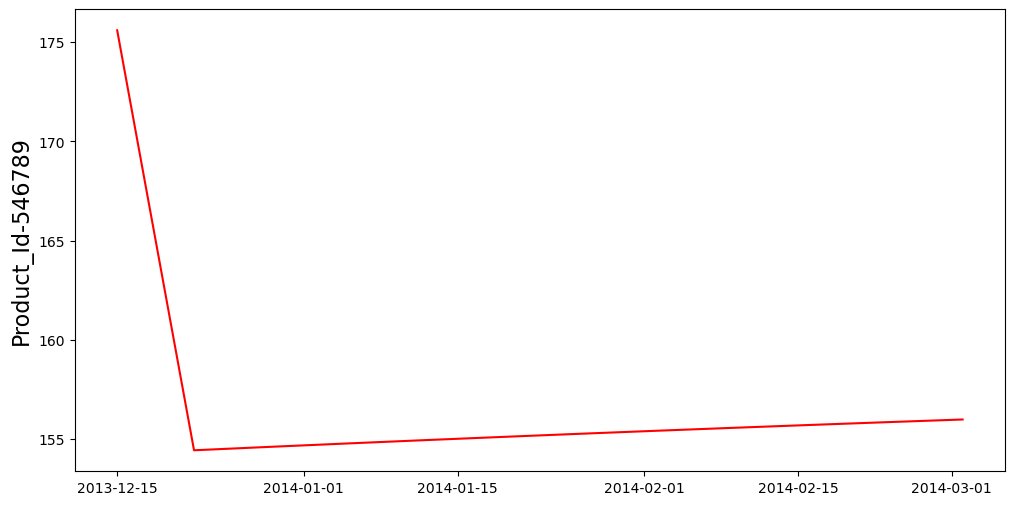

In [153]:
plt.figure(figsize=(12,6))
plt.plot(forecast24, color='red')
plt.ylabel('Product_Id-546789', fontsize=16)
plt.show()

# PRODUCT 25: ID-600934

In [154]:
data25=create_data(600934)
data25

rolling_mean
date                    
2011-01-09    141.845395
2011-01-16    109.000000
2011-01-23    114.000000
2011-01-30    114.000000
2011-02-06    100.500000
...                  ...
2013-11-10     46.000000
2013-11-17     45.000000
2013-11-24     45.000000
2013-12-01     45.000000
2013-12-08     49.500000

[153 rows x 1 columns]

ADF Statistic: -2.866934
p-value: 0.049330


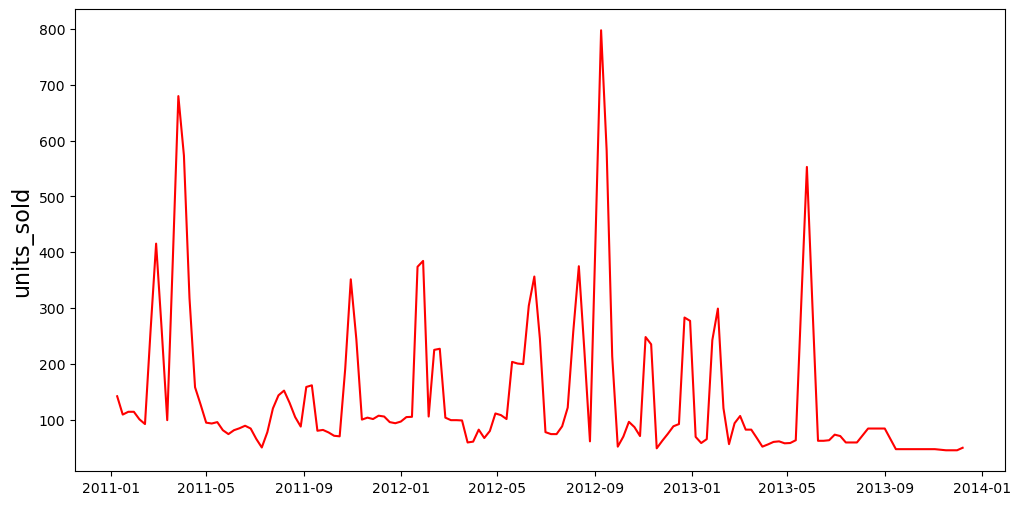

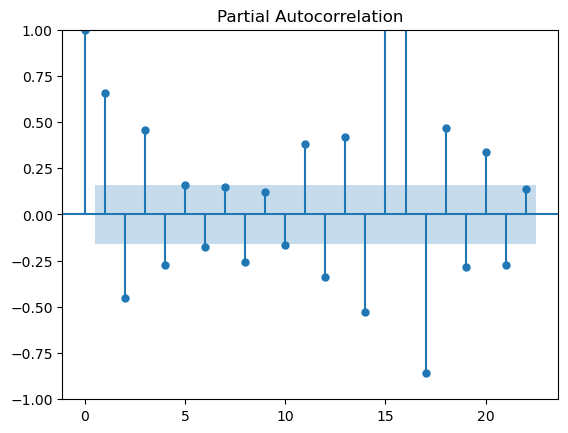

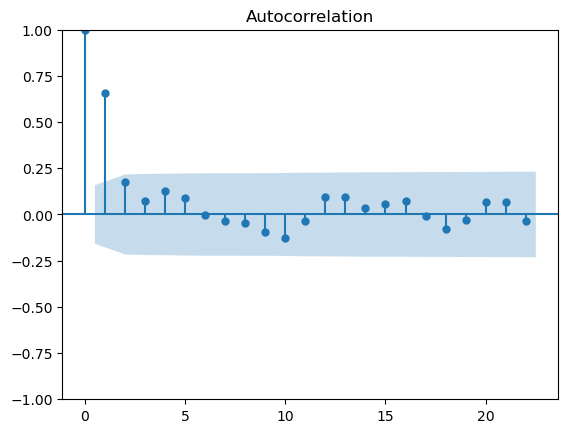

In [155]:
plot(600934)
dickey_fuller(600934)
corr_plot(600934)

In [156]:
model=auto_arima(data25,m=5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  153
Model:             SARIMAX(0, 0, 2)x(0, 0, [1], 5)   Log Likelihood                -865.317
Date:                             Sun, 15 Oct 2023   AIC                           1740.634
Time:                                     10:47:41   BIC                           1755.786
Sample:                                 01-09-2011   HQIC                          1746.789
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    141.2859     33.494      4.218      0.000      75.639     206.933
ma.L1          1.4779      0.066     22.287      0.000       1.348       1.608
ma.L2          0.4908      0.065      7.592      0.000       0.364       0.617
ma.S.L5        0.1373      0.098      1.395      0.163      -0.056       0.330
sigma2      4633.6421    489.750      9.461      0.000    3673.749    5593.535
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               337.63
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             2.14
Prob(H) (two-sided):                  0.87   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
forecast25=pd.DataFrame(model.predict(12))
forecast25.rename(columns={0:'600934_forecast'},inplace=True)
forecast25


600934_forecast
2013-12-15        81.771752
2013-12-22       118.645136
2013-12-29       129.616938
2014-01-05       129.617996
2014-01-12       130.235730
2014-01-19       134.684848
2014-01-26       139.772760
2014-02-02       141.285863
2014-02-09       141.285863
2014-02-16       141.285863
2014-02-23       141.285863
2014-03-02       141.285863

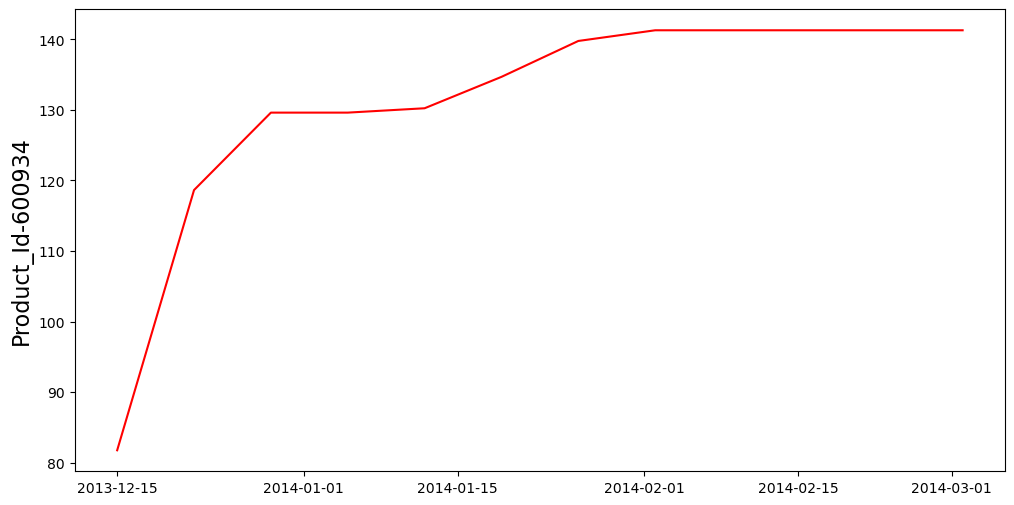

In [158]:
plt.figure(figsize=(12,6))
plt.plot(forecast25, color='red')
plt.ylabel('Product_Id-600934', fontsize=16)
plt.show()

# PRODUCT 26: ID-545621

In [159]:
data26=create_data(545621)
data26

rolling_mean
date                    
2011-01-09     14.828947
2011-01-16      4.000000
2011-01-23      9.000000
2011-01-30     11.500000
2011-02-06      9.000000
...                  ...
2013-11-10     19.500000
2013-11-17     27.000000
2013-11-24     27.000000
2013-12-01     27.000000
2013-12-08     24.500000

[153 rows x 1 columns]

ADF Statistic: -5.282330
p-value: 0.000006


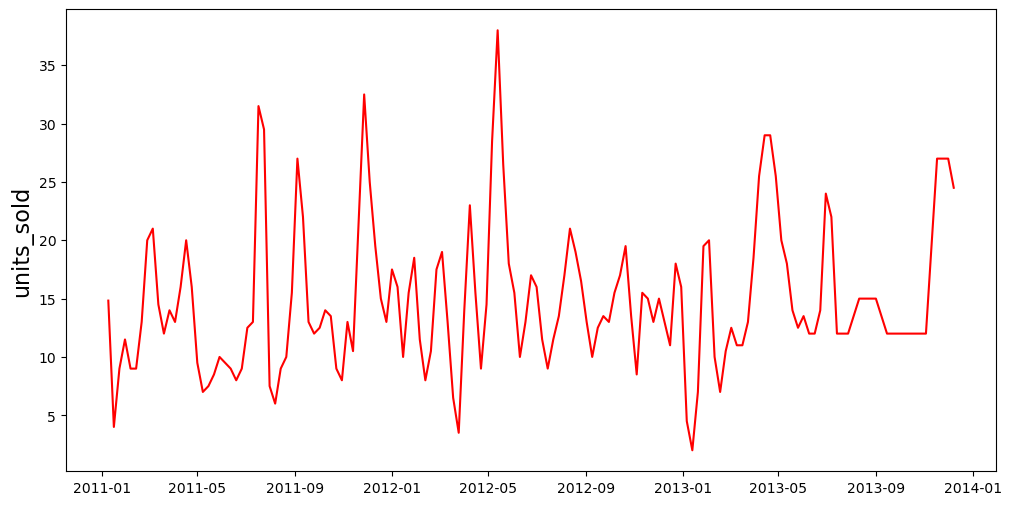

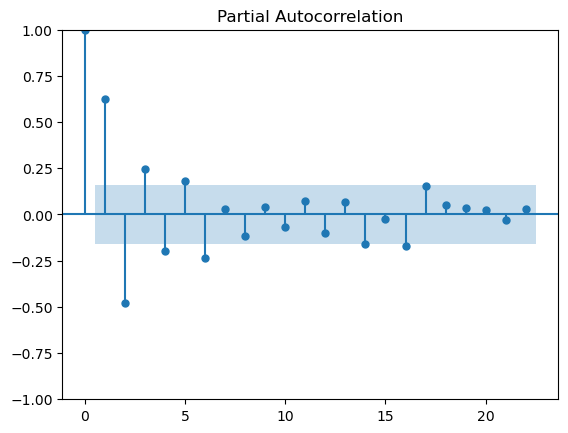

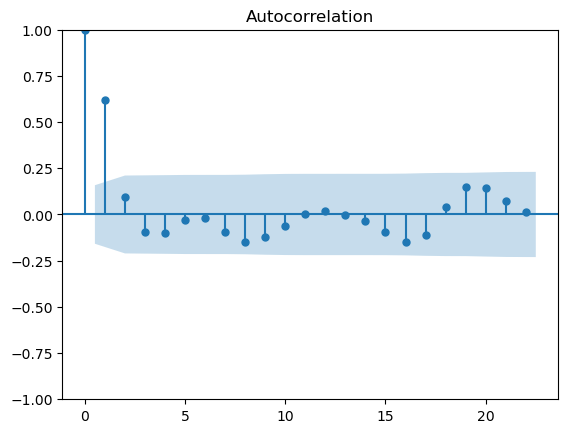

In [160]:
plot(545621)
dickey_fuller(545621)
corr_plot(545621)

In [161]:
model=auto_arima(data26,m=4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  153
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 4)   Log Likelihood                -411.878
Date:                           Sun, 15 Oct 2023   AIC                            837.755
Time:                                   10:48:31   BIC                            858.968
Sample:                               01-09-2011   HQIC                           846.372
                                    - 12-08-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9509      5.365      1.109      0.267      -4.565      16.467
ar.L1          0.3742      0.060      6.221      0.000       0.256       0.492
ar.L2         -0.1460      0.086     -1.702      0.089      -0.314       0.022
ma.L1          0.9886      0.040     24.530      0.000       0.910       1.068
ar.S.L4        0.4817      0.460      1.048      0.295      -0.420       1.383
ma.S.L4       -0.6215      0.411     -1.513      0.130      -1.426       0.184
sigma2        12.2586      1.253      9.784      0.000       9.803      14.714
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               100.13
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.08
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
forecast26=pd.DataFrame(model.predict(12))
forecast26.rename(columns={0:'545621_forecast'},inplace=True)
forecast26


545621_forecast
2013-12-15        18.718599
2013-12-22        14.018223
2013-12-29        13.084628
2014-01-05        13.106646
2014-01-12        13.455702
2014-01-19        14.173415
2014-01-26        14.381816
2014-02-02        14.203208
2014-02-09        14.204418
2014-02-16        14.515281
2014-02-23        14.627004
2014-03-02        14.550308

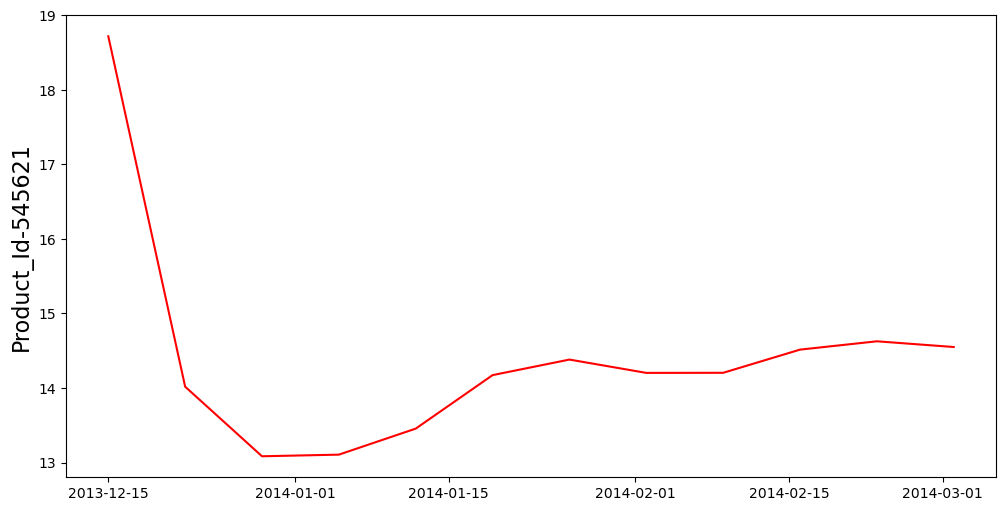

In [163]:
plt.figure(figsize=(12,6))
plt.plot(forecast26, color='red')
plt.ylabel('Product_Id-545621', fontsize=16)
plt.show()

# PRODUCT 27: ID-673209

In [164]:
data27=create_data(673209)
data27

rolling_mean
date                    
2011-01-09     35.578947
2011-01-16     11.000000
2011-01-23     25.000000
2011-01-30     35.500000
2011-02-06     23.500000
...                  ...
2013-11-10     44.500000
2013-11-17     53.000000
2013-11-24     53.000000
2013-12-01     53.000000
2013-12-08     60.000000

[153 rows x 1 columns]

ADF Statistic: -2.589480
p-value: 0.095191


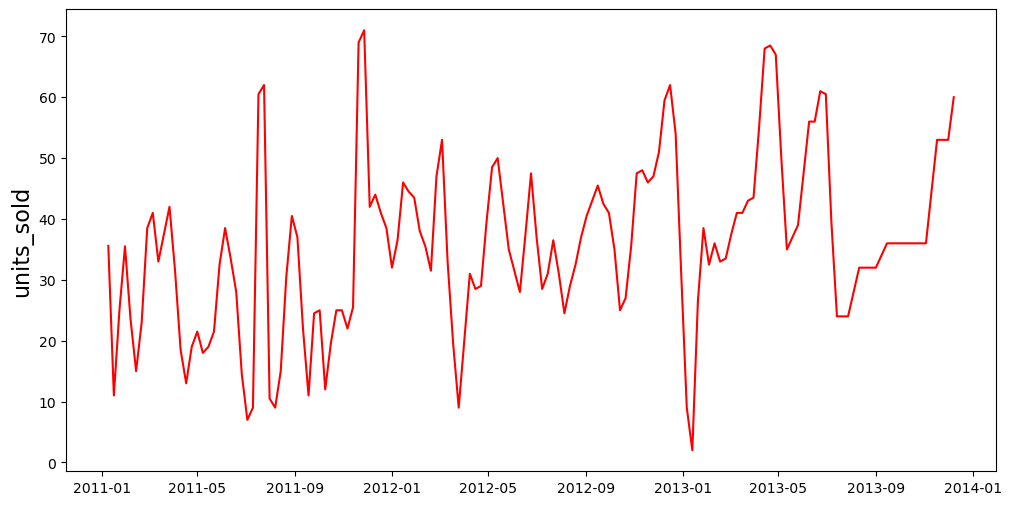

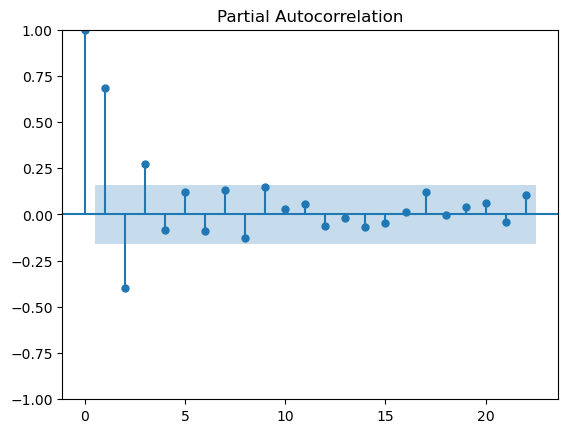

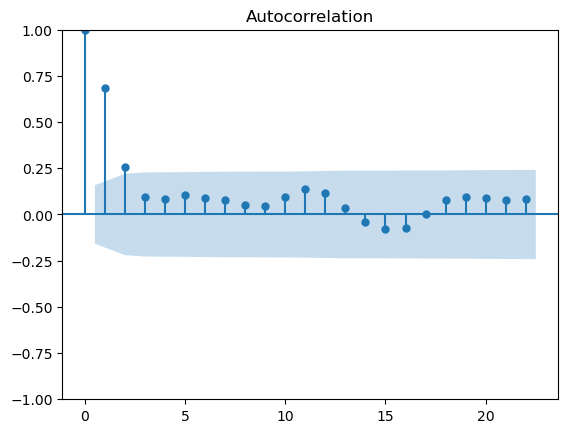

In [165]:
plot(673209)
dickey_fuller(673209)
corr_plot(673209)

In [166]:
data27_diff=data27.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data27_diff)
p_value= result[1]
p_value

1.4861512292323884e-09

Text(0, 0.5, 'units_sold')

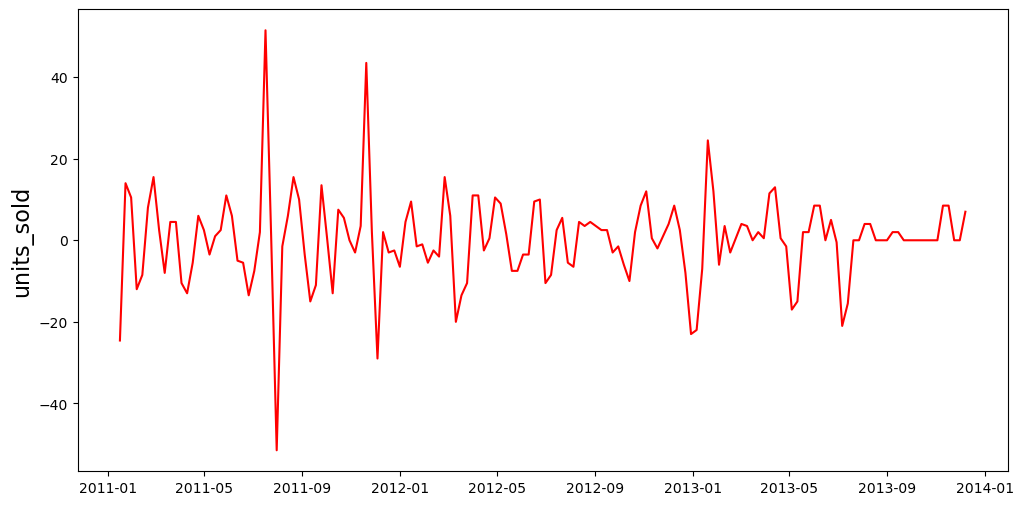

In [167]:
plt.figure(figsize=(12,6))
plt.plot(data27_diff, color='red')
plt.ylabel('units_sold', fontsize=16)

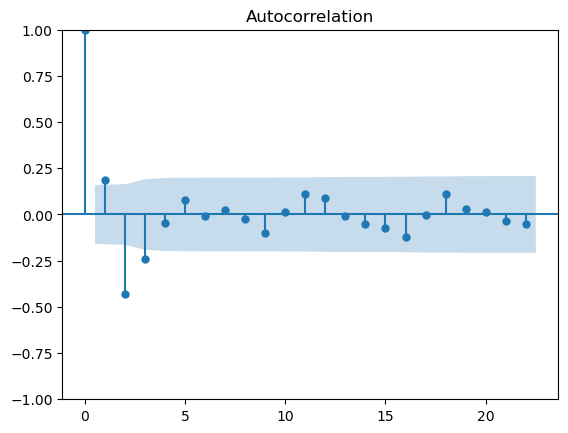

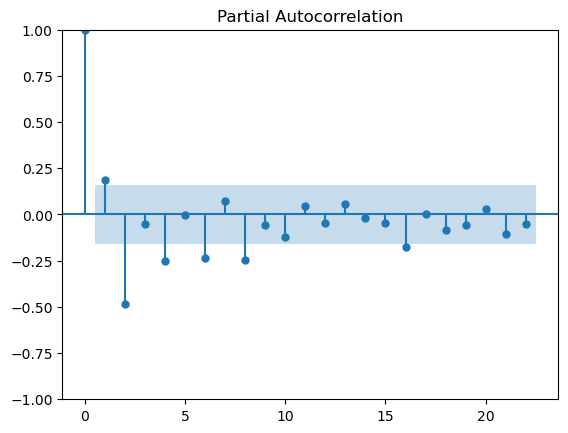

In [168]:
plot_acf(data27_diff)
plot_pacf(data27_diff)
plt.show()

In [169]:
model=auto_arima(data27_diff,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  152
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 2)   Log Likelihood                -531.144
Date:                             Sun, 15 Oct 2023   AIC                           1070.289
Time:                                     10:48:44   BIC                           1082.384
Sample:                                 01-16-2011   HQIC                          1075.202
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0823      0.043      1.918      0.055      -0.002       0.166
ar.L1          0.3047      0.058      5.226      0.000       0.190       0.419
ma.S.L2       -0.9759      0.054    -18.157      0.000      -1.081      -0.871
sigma2        61.0515      4.919     12.412      0.000      51.411      70.692
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               394.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
prediction_info27=model.predict(12)
prediction_info27=(prediction_info27+data27['rolling_mean'][-1])
forecast27=pd.DataFrame(prediction_info27)
forecast27.rename(columns={0:'673209_forecast'},inplace=True)
forecast27

673209_forecast
2013-12-15        59.530366
2013-12-22        50.006662
2013-12-29        57.037274
2014-01-05        59.179535
2014-01-12        59.832292
2014-01-19        60.031191
2014-01-26        60.091796
2014-02-02        60.110263
2014-02-09        60.115889
2014-02-16        60.117604
2014-02-23        60.118126
2014-03-02        60.118286

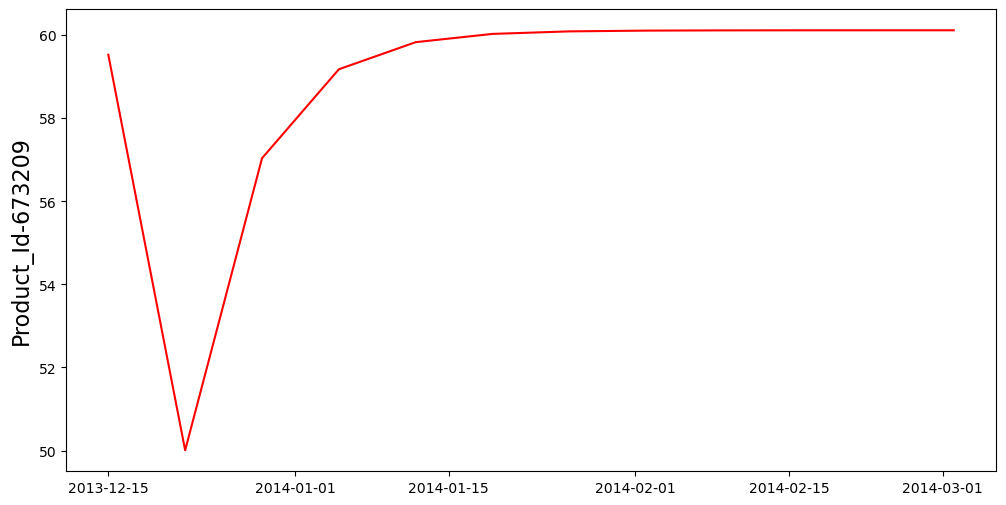

In [171]:
plt.figure(figsize=(12,6))
plt.plot(forecast27, color='red')
plt.ylabel('Product_Id-673209', fontsize=16)
plt.show()

# PRODUCT 28 : ID-327492

In [172]:
data28=create_data(327492)
data28

rolling_mean
date                    
2011-01-09     40.131579
2011-01-16     30.000000
2011-01-23     34.500000
2011-01-30     55.500000
2011-02-06     74.000000
...                  ...
2013-11-10     30.000000
2013-11-17     24.000000
2013-11-24     24.000000
2013-12-01     24.000000
2013-12-08     29.000000

[153 rows x 1 columns]

ADF Statistic: -2.215338
p-value: 0.200726


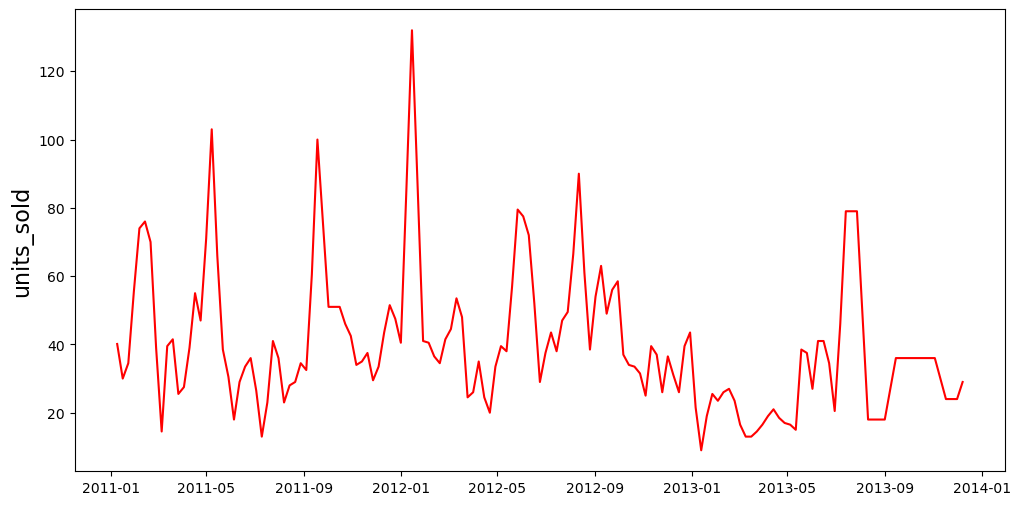

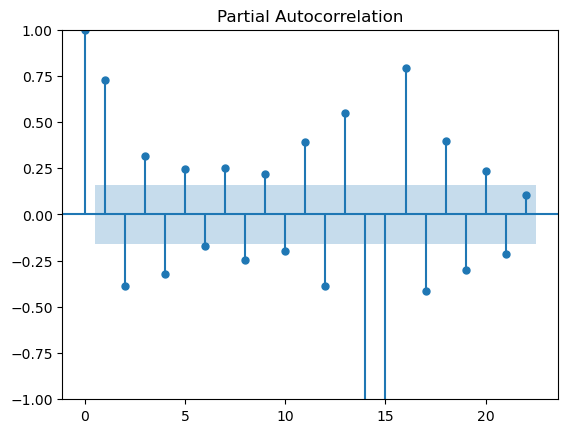

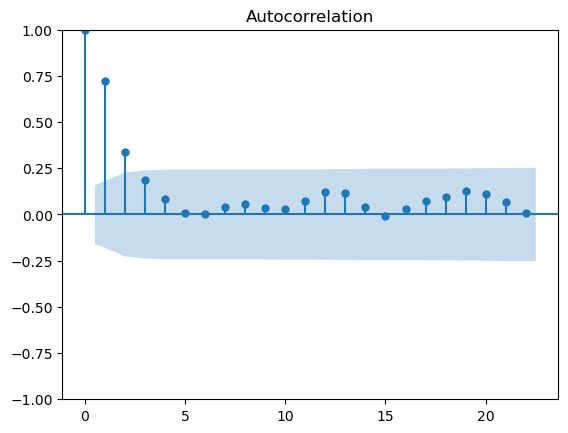

In [173]:
plot(327492)
dickey_fuller(327492)
corr_plot(327492)

In [174]:
data28_diff=data28.diff().dropna()#1ST ORDER DIFFERENCING
result = adfuller(data28_diff)
p_value= result[1]
p_value

2.8761724298324176e-05

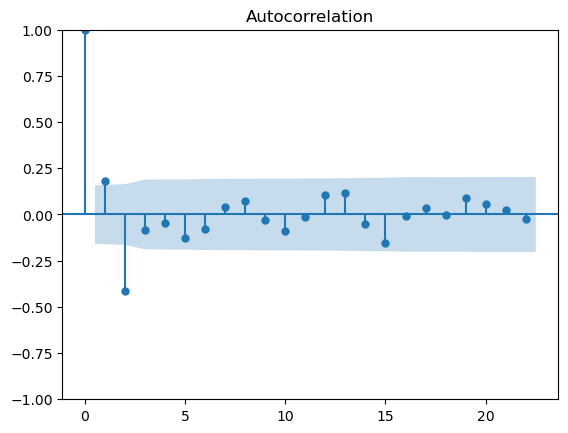

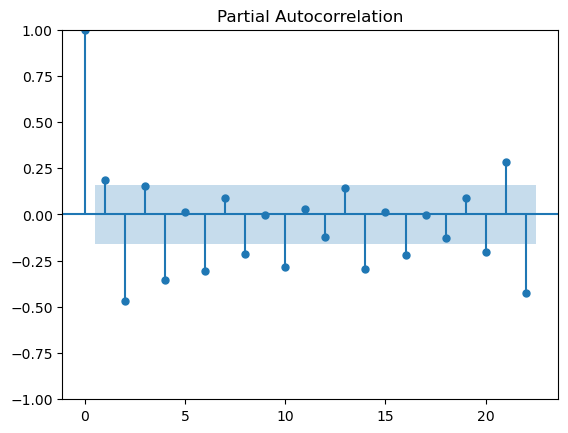

In [175]:
plot_acf(data28_diff)
plot_pacf(data28_diff)
plt.show()

In [176]:
model=auto_arima(data28_diff,m=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  152
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 2)   Log Likelihood                -575.879
Date:                             Sun, 15 Oct 2023   AIC                           1157.758
Time:                                     10:48:58   BIC                           1166.830
Sample:                                 01-16-2011   HQIC                          1161.443
                                      - 12-08-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4589      0.056      8.126      0.000       0.348       0.570
ma.S.L2       -0.9737      0.047    -20.798      0.000      -1.065      -0.882
sigma2       110.1968      9.588     11.494      0.000      91.406     128.988
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                83.13
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.12
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [177]:
prediction_info28=model.predict(12)
prediction_info28=(prediction_info28+data28['rolling_mean'][-1])
forecast28=pd.DataFrame(prediction_info28)
forecast28.rename(columns={0:'327492_forecast'},inplace=True)
forecast28

327492_forecast
2013-12-15        35.534621
2013-12-22        30.096307
2013-12-29        29.503117
2014-01-05        29.230891
2014-01-12        29.105960
2014-01-19        29.048627
2014-01-26        29.022316
2014-02-02        29.010241
2014-02-09        29.004700
2014-02-16        29.002157
2014-02-23        29.000990
2014-03-02        29.000454

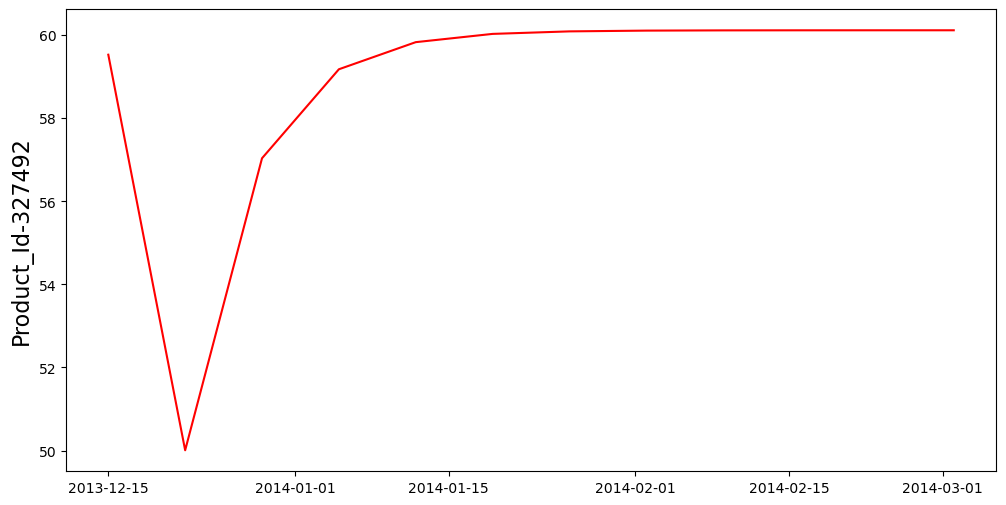

In [178]:
plt.figure(figsize=(12,6))
plt.plot(forecast27, color='red')
plt.ylabel('Product_Id-327492', fontsize=16)
plt.show()

# SO WE GET 28 FORECAST FOR 28 PRODUCTS WHICH WE HAVE ON OUR DATA
# BUT WE HAVE TO MERGE ALL INTO ONE DATAFRAME SO THAT WE CAN WORK WITH THAT & ALSO IT WILL BE MORE INTERPRETABLE

In [179]:
all_df=[forecast1,forecast2,forecast3,forecast4,
       forecast5,forecast6,forecast7,forecast8,
       forecast9,forecast10,forecast11,forecast12,
       forecast13,forecast14,forecast15,forecast16,
       forecast17,forecast18,forecast19,forecast20,
       forecast21,forecast22,forecast23,forecast24,
       forecast25,forecast26,forecast27,forecast28]

In [180]:
grand_forecast = pd.read_csv(r"C:\Users\Soumadeep\Desktop\BIA DOCUMENTS\CAPSTONE PROJECT\grand_forecasted_sales.csv")
grand_forecast.set_index('dates',inplace=True)
grand_forecast

216418       216419       216425       216233       217390  \
dates                                                                         
12/15/2013  6150.202975  4745.621679  2904.495756  4415.495756  11678.20297   
12/22/2013  6144.546762  4407.860569  2612.853861  4123.853861  11672.54676   
12/29/2013  6181.626716  4562.251613  2672.750979  4183.750979  11709.62672   
1/5/2014    6135.023802  4717.568880  2757.711617  4268.711617  11663.02380   
1/12/2014   6077.961368  4658.361226  2758.818203  4269.818203  11605.96137   
1/19/2014   6069.469596  4562.572155  2738.720955  4249.720955  11597.46960   
1/26/2014   6072.458160  4593.833978  2756.375793  4267.375793  11600.45816   
2/2/2014    6057.048050  4645.902017  2759.263763  4270.263763  11585.04805   
2/9/2014    6040.124265  4632.294853  2780.325934  4291.325934  11568.12426   
2/16/2014   6035.302106  4602.812033  2778.440215  4289.440215  11563.30211   
2/23/2014   6033.752259  4608.934453  2776.975447  4287.975447  11561.75226   
3/2/2014    6028.363969  4625.243806  2824.292294  4335.292294  11556.36397   

                 219009       219029       223245       223153       300021  \
dates                                                                         
12/15/2013  5157.968102  3138.068661  4191.385637  3031.657154  1654.951960   
12/22/2013  5469.932570  3452.186809  4875.197503  3581.792157  1621.659379   
12/29/2013  5546.241360  3547.002002  5296.791556  3503.817133  1680.522007   
1/5/2014    5786.364641  3535.949215  5580.044984  3801.572523  1752.589417   
1/12/2014   5958.271728  3498.510013  5674.109431  4206.379797  1639.869458   
1/19/2014   5938.022605  3476.675914  5593.521163  3310.491507  1619.000000   
1/26/2014   5965.141179  3474.732840  5423.404893  3001.817162  1735.057854   
2/2/2014    6036.346849  3483.143064  5262.561510  3338.113957  1700.378347   
2/9/2014    6100.839831  3544.386404  5177.190362  3230.727536  1607.190309   
2/16/2014   6095.337380  3612.270710  5181.984377  4295.014666  1683.535406   
2/23/2014   6098.879383  3634.357964  5248.762661  5045.236662  1735.644910   
3/2/2014    6069.414352  3632.704546  5330.963690  4509.506433  1639.253121   

            ...      300291      217217      217777      398721      679023  \
dates       ...                                                               
12/15/2013  ...  187.833802  545.091903  451.416502  843.180857  150.784050   
12/22/2013  ...  180.962633  577.745675  488.558201  600.300489  126.568463   
12/29/2013  ...  173.460674  592.818723  509.962818  535.464188  137.399578   
1/5/2014    ...  169.934720  594.734282  514.407571  487.340956  140.628531   
1/12/2014   ...  166.648568  596.943188  517.013373  479.358615  141.591140   
1/19/2014   ...  164.407001  599.979741  517.362128  450.448043  141.878111   
1/26/2014   ...  162.434561  601.529266  517.582441  404.477598  141.963663   
2/2/2014    ...  161.164360  602.033764  517.544286  410.024025  141.989167   
2/9/2014    ...  160.084970  602.397654  517.528831  400.550975  141.996771   
2/16/2014   ...  159.391028  602.716456  517.497258  392.663088  141.999037   
2/23/2014   ...  158.812762  602.891019  517.481084  386.466748  141.999713   
3/2/2014    ...  158.442655  602.970211  517.468945  375.869526  141.999914   

                546789      600934     545621     673209     327492  
dates                                                                
12/15/2013  175.598902   81.771752  18.718599  59.530366  35.534621  
12/22/2013  154.428028  118.645136  14.018223  50.006662  30.096307  
12/29/2013  154.602851  129.616938  13.084628  57.037274  29.503117  
1/5/2014    154.772985  129.617996  13.106646  59.179535  29.230891  
1/12/2014   154.938556  130.235730  13.455702  59.832292  29.105960  
1/19/2014   155.099688  134.684848  14.173415  60.031191  29.048627  
1/26/2014   155.256498  139.772760  14.381816  60.091796  29.022316  
2/2/2014    155.409104  141.285863  14.203208  60.110263  29.01024

THIS IS THE FINAL 12 WEEK FORECASTED SALES DATAFRAME

In [181]:
grand_forecast.to_csv('grand_forecasted_sales.csv')


WE CONVERT IT TO CSV & STORE IT FOR FUTURE REFERENCE

# INVENTORY OPTIMIZATION

Inventory Optimization is the strategic management of inventory levels to ensure that the right amount of goods is available at the right time to meet customer demand while minimizing costs.

Inventory Optimization aims to strike a balance between having sufficient stock to meet demand without carrying excess inventory that ties up capital and storage space. Effective inventory optimization helps businesses reduce carrying costs, improve cash flow, and enhance customer satisfaction.

we can use the demand forecasts to optimize inventory levels by implementing strategies like reorder points, safety stock, and economic order quantity (EOQ) calculations.

As we don't have any information about that retail chains that's why we assume some things:

1.Lead time (number of days it takes to replenish inventory) = 1

2.Service level (probability of not stocking out) = 0.95

3.Holding Cost = 0.1

4.Stockout Cost = 10

THIS ASSUMPTION VARRY BUSINESS WISE. HERE WE TAKE THESE VALUES AS AN EXAMPLE


HERE WE FIND OUT 4 THINGS OF EVERY PRODUCT'S INVENTORY. THEY ARE :

1. OPTIMAL ORDER QUANTITY
2. REORDER POINT
3. SAFETY STOCK
4. TOTAL COST

The newsvendor model is a mathematical model used to determine the optimal inventory levels for a product with uncertain demand. It is commonly used in situations where the demand is uncertain, and the product is perishable, such as fresh vegetables at a farmers market or bread at a bakery. The newsvendor formula can be used to calculate the optimal order quantity, which is given by the formula:

Q* = F(1 - (P - C)/F)

where Q* is the optimal order quantity, F is the cumulative distribution function of demand, P is the selling price, and C is the unit cost

NOW HERE THE PLAN IS :
1. At first we derive those 4 components of every product one by one & lastly we create a dataframe with all informations combined
2. then do some EDA on that dataframe to mine some insights from them

In [182]:
lead_time = 1
service_level = 0.95 
holding_cost=0.1
stockout_cost=10

# PRODUCT 1 : ID-216418

In [183]:
initial_inventory = data1['rolling_mean'].sum()
i=0
data1['INVENTORY']=data1['rolling_mean'].sum()
data1['INVENTORY'][-1]=data1['rolling_mean'][-1]
for i in range(1,153):
    data1['INVENTORY'][i]=data1['INVENTORY'][i-1]-data1['rolling_mean'][i-1]
data1


rolling_mean  INVENTORY
date                               
2011-01-09       5989.75  916431.75
2011-01-16       4695.00  910442.00
2011-01-23       5213.50  905747.00
2011-01-30       6233.50  900533.50
2011-02-06       5892.50  894300.00
...                  ...        ...
2013-11-10       6106.00   31979.50
2013-11-17       6506.00   25873.50
2013-11-24       6506.00   19367.50
2013-12-01       6506.00   12861.50
2013-12-08       6355.50    6355.50

[153 rows x 2 columns]

In [184]:
z1 = np.abs(np.percentile(forecast1, 100 * (1 - service_level)))
order_quantity1 = np.ceil(forecast1.mean() + z1).astype(int)
reorder_point1 = forecast1.mean() * lead_time + z1
safety_stock1 = reorder_point1 - forecast1.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity1)
total_stockout_cost = stockout_cost * np.maximum(0, forecast1.mean() * lead_time - initial_inventory)
total_cost1 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity1)
print("Reorder Point:", reorder_point1)
print("Safety Stock:", safety_stock1)
print("Total Cost:", total_cost1)

Optimal Order Quantity: 216418_forecast    12117
dtype: int32
Reorder Point: 216418_forecast    12116.817531
dtype: float64
Safety Stock: 216418_forecast    6031.327528
dtype: float64
Total Cost: 216418_forecast    92249.025
dtype: float64


# PRODUCT 2 : ID - 216419

In [185]:
initial_inventory = data2['rolling_mean'].sum()
i=0
data2['INVENTORY']=data2['rolling_mean'].sum()
data2['INVENTORY'][-1]=data2['rolling_mean'][-1]
for i in range(1,153):
    data2['INVENTORY'][i]=data2['INVENTORY'][i-1]-data2['rolling_mean'][i-1]
data2

rolling_mean      INVENTORY
date                                   
2011-01-09   4694.960526  718328.960526
2011-01-16   4502.000000  713634.000000
2011-01-23   5422.000000  709132.000000
2011-01-30   6873.000000  703710.000000
2011-02-06   6146.500000  696837.000000
...                  ...            ...
2013-11-10   4132.500000   21721.000000
2013-11-17   4323.000000   17588.500000
2013-11-24   4323.000000   13265.500000
2013-12-01   4323.000000    8942.500000
2013-12-08   4619.500000    4619.500000

[153 rows x 2 columns]

In [186]:
z2 = np.abs(np.percentile(forecast2, 100 * (1 - service_level)))
order_quantity2 = np.ceil(forecast2.mean() + z2).astype(int)
reorder_point2 = forecast2.mean() * lead_time + z2
safety_stock2 = reorder_point2 - forecast2.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity2)
total_stockout_cost = stockout_cost * np.maximum(0, forecast2.mean() * lead_time - initial_inventory)
total_cost2 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity2)
print("Reorder Point:", reorder_point2)
print("Safety Stock:", safety_stock2)
print("Total Cost:", total_cost2)

Optimal Order Quantity: 216419_forecast    9107
dtype: int32
Reorder Point: 216419_forecast    9106.380415
dtype: float64
Safety Stock: 216419_forecast    4492.775643
dtype: float64
Total Cost: 216419_forecast    72288.246053
dtype: float64


# PRODUCT 3: ID-216425

In [187]:
initial_inventory = data3['rolling_mean'].sum()
i=0
data3['INVENTORY']=data3['rolling_mean'].sum()
data3['INVENTORY'][-1]=data3['rolling_mean'][-1]
for i in range(1,153):
    data3['INVENTORY'][i]=data3['INVENTORY'][i-1]-data3['rolling_mean'][i-1]
data3

rolling_mean      INVENTORY
date                                   
2011-01-09   2223.944079  340263.444079
2011-01-16   1726.000000  338039.500000
2011-01-23   1913.000000  336313.500000
2011-01-30   2052.500000  334400.500000
2011-02-06   2002.500000  332348.000000
...                  ...            ...
2013-11-10   2539.000000   12917.000000
2013-11-17   2539.000000   10378.000000
2013-11-24   2539.000000    7839.000000
2013-12-01   2539.000000    5300.000000
2013-12-08   2761.000000    2761.000000

[153 rows x 2 columns]

In [188]:
z3 = np.abs(np.percentile(forecast3, 100 * (1 - service_level)))
order_quantity3 = np.ceil(forecast3.mean() + z3).astype(int)
reorder_point3 = forecast3.mean() * lead_time + z3
safety_stock3 = reorder_point3 - forecast3.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity3)
total_stockout_cost = stockout_cost * np.maximum(0, forecast3.mean() * lead_time - initial_inventory)
total_cost3 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity3)
print("Reorder Point:", reorder_point3)
print("Safety Stock:", safety_stock3)
print("Total Cost:", total_cost3)

Optimal Order Quantity: 216425_forecast    5406
dtype: int32
Reorder Point: 216425_forecast    5405.882677
dtype: float64
Safety Stock: 216425_forecast    2645.797276
dtype: float64
Total Cost: 216425_forecast    34296.644408
dtype: float64


# PRODUCT 4 : ID-216233

In [189]:
initial_inventory = data4['rolling_mean'].sum()
i=0
data4['INVENTORY']=data4['rolling_mean'].sum()
data4['INVENTORY'][-1]=data4['rolling_mean'][-1]
for i in range(1,153):
    data4['INVENTORY'][i]=data4['INVENTORY'][i-1]-data4['rolling_mean'][i-1]
data4

rolling_mean      INVENTORY
date                                   
2011-01-09   3378.740132  516947.240132
2011-01-16   3578.000000  513568.500000
2011-01-23   3337.500000  509990.500000
2011-01-30   2967.000000  506653.000000
2011-02-06   2722.000000  503686.000000
...                  ...            ...
2013-11-10   3457.000000   18400.000000
2013-11-17   3557.000000   14943.000000
2013-11-24   3557.000000   11386.000000
2013-12-01   3557.000000    7829.000000
2013-12-08   4272.000000    4272.000000

[153 rows x 2 columns]

In [190]:
z4 = np.abs(np.percentile(forecast4, 100 * (1 - service_level)))
order_quantity4 = np.ceil(forecast4.mean() + z4).astype(int)
reorder_point4 = forecast4.mean() * lead_time + z4
safety_stock4 = reorder_point4 - forecast4.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity4)
total_stockout_cost = stockout_cost * np.maximum(0, forecast4.mean() * lead_time - initial_inventory)
total_cost4 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity4)
print("Reorder Point:", reorder_point4)
print("Safety Stock:", safety_stock4)
print("Total Cost:", total_cost4)

Optimal Order Quantity: 216233_forecast    8428
dtype: int32
Reorder Point: 216233_forecast    8427.882677
dtype: float64
Safety Stock: 216233_forecast    4156.797276
dtype: float64
Total Cost: 216233_forecast    52116.124013
dtype: float64


# PRODUCT 5: ID-217390

In [191]:
initial_inventory = data5['rolling_mean'].sum()
i=0
data5['INVENTORY']=data5['rolling_mean'].sum()
data5['INVENTORY'][-1]=data5['rolling_mean'][-1]
for i in range(1,153):
    data5['INVENTORY'][i]=data5['INVENTORY'][i-1]-data5['rolling_mean'][i-1]
data5

rolling_mean      INVENTORY
date                                   
2011-01-09   4358.355263  666828.355263
2011-01-16   4312.000000  662470.000000
2011-01-23   4641.000000  658158.000000
2011-01-30   4834.000000  653517.000000
2011-02-06   4478.500000  648683.000000
...                  ...            ...
2013-11-10   5316.000000   30746.000000
2013-11-17   6634.000000   25430.000000
2013-11-24   6634.000000   18796.000000
2013-12-01   6634.000000   12162.000000
2013-12-08   5528.000000    5528.000000

[153 rows x 2 columns]

In [192]:
z5 = np.abs(np.percentile(forecast5, 100 * (1 - service_level)))
order_quantity5 = np.ceil(forecast5.mean() + z5).astype(int)
reorder_point5 = forecast5.mean() * lead_time + z5
safety_stock5 = reorder_point5 - forecast5.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity5)
total_stockout_cost = stockout_cost * np.maximum(0, forecast5.mean() * lead_time - initial_inventory)
total_cost5 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity5)
print("Reorder Point:", reorder_point5)
print("Safety Stock:", safety_stock5)
print("Total Cost:", total_cost5)

Optimal Order Quantity: 217390_forecast    23173
dtype: int32
Reorder Point: 217390_forecast    23172.817531
dtype: float64
Safety Stock: 217390_forecast    11559.327528
dtype: float64
Total Cost: 217390_forecast    67841.485526
dtype: float64


# PRODUCT 6: ID-219009

In [193]:
initial_inventory = data6['rolling_mean'].sum()
i=0
data6['INVENTORY']=data6['rolling_mean'].sum()
data6['INVENTORY'][-1]=data6['rolling_mean'][-1]
for i in range(1,153):
    data6['INVENTORY'][i]=data6['INVENTORY'][i-1]-data6['rolling_mean'][i-1]
data6

rolling_mean     INVENTORY
date                                  
2011-01-09   7147.138158  1.093512e+06
2011-01-16   3026.000000  1.086365e+06
2011-01-23   3948.000000  1.083339e+06
2011-01-30   4454.500000  1.079391e+06
2011-02-06   4378.500000  1.074936e+06
...                  ...           ...
2013-11-10   6000.000000  3.209050e+04
2013-11-17   6739.000000  2.609050e+04
2013-11-24   6739.000000  1.935150e+04
2013-12-01   6739.000000  1.261250e+04
2013-12-08   5873.500000  5.873500e+03

[153 rows x 2 columns]

In [194]:
z6 = np.abs(np.percentile(forecast6, 100 * (1 - service_level)))
order_quantity6 = np.ceil(forecast6.mean() + z6).astype(int)
reorder_point6 = forecast6.mean() * lead_time + z6
safety_stock6 = reorder_point6 - forecast6.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity6)
total_stockout_cost = stockout_cost * np.maximum(0, forecast6.mean() * lead_time - initial_inventory)
total_cost6 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity6)
print("Reorder Point:", reorder_point6)
print("Safety Stock:", safety_stock6)
print("Total Cost:", total_cost6)

Optimal Order Quantity: 219009_forecast    11182
dtype: int32
Reorder Point: 219009_forecast    11181.445224
dtype: float64
Safety Stock: 219009_forecast    5329.548559
dtype: float64
Total Cost: 219009_forecast    109910.313816
dtype: float64


# PRODUCT 7 : ID-219029

In [195]:
initial_inventory = data7['rolling_mean'].sum()
i=0
data7['INVENTORY']=data7['rolling_mean'].sum()
data7['INVENTORY'][-1]=data7['rolling_mean'][-1]
for i in range(1,153):
    data7['INVENTORY'][i]=data7['INVENTORY'][i-1]-data7['rolling_mean'][i-1]
data7

rolling_mean      INVENTORY
date                                   
2011-01-09   3747.993421  573442.993421
2011-01-16   2736.000000  569695.000000
2011-01-23   2883.000000  566959.000000
2011-01-30   2639.500000  564076.000000
2011-02-06   2473.500000  561436.500000
...                  ...            ...
2013-11-10   2911.000000   14273.500000
2013-11-17   2835.000000   11362.500000
2013-11-24   2835.000000    8527.500000
2013-12-01   2835.000000    5692.500000
2013-12-08   2857.500000    2857.500000

[153 rows x 2 columns]

In [196]:
z7 = np.abs(np.percentile(forecast7, 100 * (1 - service_level)))
order_quantity7 = np.ceil(forecast7.mean() + z7).astype(int)
reorder_point7 = forecast7.mean() * lead_time + z7
safety_stock7 = reorder_point7 - forecast7.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity7)
total_stockout_cost = stockout_cost * np.maximum(0, forecast7.mean() * lead_time - initial_inventory)
total_cost7 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity7)
print("Reorder Point:", reorder_point7)
print("Safety Stock:", safety_stock7)
print("Total Cost:", total_cost7)

Optimal Order Quantity: 219029_forecast    6814
dtype: int32
Reorder Point: 219029_forecast    6813.332655
dtype: float64
Safety Stock: 219029_forecast    3310.833643
dtype: float64
Total Cost: 219029_forecast    57684.999342
dtype: float64


# PRODUCT 8: ID-223245

In [197]:
initial_inventory = data8['rolling_mean'].sum()
i=0
data8['INVENTORY']=data8['rolling_mean'].sum()
data8['INVENTORY'][-1]=data8['rolling_mean'][-1]
for i in range(1,153):
    data8['INVENTORY'][i]=data8['INVENTORY'][i-1]-data8['rolling_mean'][i-1]
data8

rolling_mean      INVENTORY
date                                   
2011-01-09   5276.838816  807356.338816
2011-01-16   2198.000000  802079.500000
2011-01-23   3064.500000  799881.500000
2011-01-30   3822.000000  796817.000000
2011-02-06   3345.500000  792995.000000
...                  ...            ...
2013-11-10   3584.000000   15213.000000
2013-11-17   2825.000000   11629.000000
2013-11-24   2825.000000    8804.000000
2013-12-01   2825.000000    5979.000000
2013-12-08   3154.000000    3154.000000

[153 rows x 2 columns]

In [198]:
z8 = np.abs(np.percentile(forecast8, 100 * (1 - service_level)))
order_quantity8 = np.ceil(forecast8.mean() + z8).astype(int)
reorder_point8 = forecast8.mean() * lead_time + z8
safety_stock8 = reorder_point8 - forecast8.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity8)
total_stockout_cost = stockout_cost * np.maximum(0, forecast8.mean() * lead_time - initial_inventory)
total_cost8 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity8)
print("Reorder Point:", reorder_point8)
print("Safety Stock:", safety_stock8)
print("Total Cost:", total_cost8)

Optimal Order Quantity: 223245_forecast    9804
dtype: int32
Reorder Point: 223245_forecast    9803.808644
dtype: float64
Safety Stock: 223245_forecast    4567.482163
dtype: float64
Total Cost: 223245_forecast    81225.833882
dtype: float64


# PRODUCT 9: ID-223153

In [199]:
initial_inventory = data9['rolling_mean'].sum()
i=0
data9['INVENTORY']=data9['rolling_mean'].sum()
data9['INVENTORY'][-1]=data9['rolling_mean'][-1]
for i in range(1,153):
    data9['INVENTORY'][i]=data9['INVENTORY'][i-1]-data9['rolling_mean'][i-1]
data9

rolling_mean      INVENTORY
date                                   
2011-01-09   3687.753289  564226.253289
2011-01-16   1054.000000  560538.500000
2011-01-23   2751.000000  559484.500000
2011-01-30   3560.000000  556733.500000
2011-02-06   1786.000000  553173.500000
...                  ...            ...
2013-11-10   1687.000000    9611.000000
2013-11-17   1925.000000    7924.000000
2013-11-24   1925.000000    5999.000000
2013-12-01   1925.000000    4074.000000
2013-12-08   2149.000000    2149.000000

[153 rows x 2 columns]

In [200]:
z9 = np.abs(np.percentile(forecast9, 100 * (1 - service_level)))
order_quantity9 = np.ceil(forecast9.mean() + z9).astype(int)
reorder_point9 = forecast9.mean() * lead_time + z9
safety_stock9 = reorder_point9 - forecast9.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity9)
total_stockout_cost = stockout_cost * np.maximum(0, forecast9.mean() * lead_time - initial_inventory)
total_cost9 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity9)
print("Reorder Point:", reorder_point9)
print("Safety Stock:", safety_stock9)
print("Total Cost:", total_cost9)

Optimal Order Quantity: 223153_forecast    6757
dtype: int32
Reorder Point: 223153_forecast    6756.239715
dtype: float64
Safety Stock: 223153_forecast    3018.229157
dtype: float64
Total Cost: 223153_forecast    56760.475329
dtype: float64


# PRODUCT 10: ID-300021

In [201]:
initial_inventory = data10['rolling_mean'].sum()
i=0
data10['INVENTORY']=data10['rolling_mean'].sum()
data10['INVENTORY'][-1]=data10['rolling_mean'][-1]
for i in range(1,153):
    data10['INVENTORY'][i]=data10['INVENTORY'][i-1]-data10['rolling_mean'][i-1]
data10

rolling_mean      INVENTORY
date                                   
2011-01-09   1984.289474  303596.289474
2011-01-16   1736.000000  301612.000000
2011-01-23   1646.000000  299876.000000
2011-01-30   1939.000000  298230.000000
2011-02-06   1995.000000  296291.000000
...                  ...            ...
2013-11-10   1608.000000    8358.500000
2013-11-17   1691.000000    6750.500000
2013-11-24   1691.000000    5059.500000
2013-12-01   1691.000000    3368.500000
2013-12-08   1677.500000    1677.500000

[153 rows x 2 columns]

In [202]:
z10 = np.abs(np.percentile(forecast10, 100 * (1 - service_level)))
order_quantity10 = np.ceil(forecast10.mean() + z10).astype(int)
reorder_point10 = forecast10.mean() * lead_time + z10
safety_stock10 = reorder_point10 - forecast10.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity10)
total_stockout_cost = stockout_cost * np.maximum(0, forecast10.mean() * lead_time - initial_inventory)
total_cost10 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity10)
print("Reorder Point:", reorder_point10)
print("Safety Stock:", safety_stock10)
print("Total Cost:", total_cost10)

Optimal Order Quantity: 300021_forecast    3287
dtype: int32
Reorder Point: 300021_forecast    3286.156653
dtype: float64
Safety Stock: 300021_forecast    1613.685639
dtype: float64
Total Cost: 300021_forecast    30523.978947
dtype: float64


# PRODUCT 11: ID-219844

In [203]:
initial_inventory = data11['rolling_mean'].sum()
i=0
data11['INVENTORY']=data11['rolling_mean'].sum()
data11['INVENTORY'][-1]=data11['rolling_mean'][-1]
for i in range(1,153):
    data11['INVENTORY'][i]=data11['INVENTORY'][i-1]-data11['rolling_mean'][i-1]
data11

rolling_mean      INVENTORY
date                                   
2011-01-09    783.631579  119895.631579
2011-01-16    693.000000  119112.000000
2011-01-23    976.500000  118419.000000
2011-01-30   1171.500000  117442.500000
2011-02-06    970.000000  116271.000000
...                  ...            ...
2013-11-10    816.500000    3470.500000
2013-11-17    671.000000    2654.000000
2013-11-24    671.000000    1983.000000
2013-12-01    671.000000    1312.000000
2013-12-08    641.000000     641.000000

[153 rows x 2 columns]

In [204]:
z11 = np.abs(np.percentile(forecast11, 100 * (1 - service_level)))
order_quantity11 = np.ceil(forecast11.mean() + z11).astype(int)
reorder_point11 = forecast11.mean() * lead_time + z11
safety_stock11 = reorder_point11 - forecast11.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity11)
total_stockout_cost = stockout_cost * np.maximum(0, forecast11.mean() * lead_time - initial_inventory)
total_cost11 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity11)
print("Reorder Point:", reorder_point11)
print("Safety Stock:", safety_stock11)
print("Total Cost:", total_cost11)

Optimal Order Quantity: 219844_forecast    1455
dtype: int32
Reorder Point: 219844_forecast    1454.428735
dtype: float64
Safety Stock: 219844_forecast    692.771566
dtype: float64
Total Cost: 219844_forecast    12062.313158
dtype: float64


# PRODUCT 12: ID-222087

In [205]:
initial_inventory = data12['rolling_mean'].sum()
i=0
data12['INVENTORY']=data12['rolling_mean'].sum()
data12['INVENTORY'][-1]=data12['rolling_mean'][-1]
for i in range(1,153):
    data12['INVENTORY'][i]=data12['INVENTORY'][i-1]-data12['rolling_mean'][i-1]
data12

rolling_mean      INVENTORY
date                                   
2011-01-09   5122.421053  783730.421053
2011-01-16   3855.000000  778608.000000
2011-01-23   5370.500000  774753.000000
2011-01-30   6169.000000  769382.500000
2011-02-06   4566.000000  763213.500000
...                  ...            ...
2013-11-10  10492.000000   25725.500000
2013-11-17   3846.000000   15233.500000
2013-11-24   3846.000000   11387.500000
2013-12-01   3846.000000    7541.500000
2013-12-08   3695.500000    3695.500000

[153 rows x 2 columns]

In [206]:
z12 = np.abs(np.percentile(forecast12, 100 * (1 - service_level)))
order_quantity12 = np.ceil(forecast12.mean() + z12).astype(int)
reorder_point12 = forecast12.mean() * lead_time + z12
safety_stock12 = reorder_point12 - forecast12.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity12)
total_stockout_cost = stockout_cost * np.maximum(0, forecast12.mean() * lead_time - initial_inventory)
total_cost12 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity12)
print("Reorder Point:", reorder_point12)
print("Safety Stock:", safety_stock12)
print("Total Cost:", total_cost12)

Optimal Order Quantity: 222087_forecast    6936
dtype: int32
Reorder Point: 222087_forecast    6935.586407
dtype: float64
Safety Stock: 222087_forecast    3207.541006
dtype: float64
Total Cost: 222087_forecast    78719.842105
dtype: float64


# PRODUCT 13: ID-320485

In [207]:
initial_inventory = data13['rolling_mean'].sum()
i=0
data13['INVENTORY']=data13['rolling_mean'].sum()
data13['INVENTORY'][-1]=data13['rolling_mean'][-1]
for i in range(1,153):
    data13['INVENTORY'][i]=data13['INVENTORY'][i-1]-data13['rolling_mean'][i-1]
data13

rolling_mean      INVENTORY
date                                   
2011-01-09   1206.171053  184544.171053
2011-01-16   1003.000000  183338.000000
2011-01-23   1169.000000  182335.000000
2011-01-30   1317.000000  181166.000000
2011-02-06   1217.500000  179849.000000
...                  ...            ...
2013-11-10   1018.000000    5353.000000
2013-11-17   1081.000000    4335.000000
2013-11-24   1081.000000    3254.000000
2013-12-01   1081.000000    2173.000000
2013-12-08   1092.000000    1092.000000

[153 rows x 2 columns]

In [208]:
z13 = np.abs(np.percentile(forecast13, 100 * (1 - service_level)))
order_quantity13 = np.ceil(forecast13.mean() + z13).astype(int)
reorder_point13 = forecast13.mean() * lead_time + z13
safety_stock13 = reorder_point13 - forecast13.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity13)
total_stockout_cost = stockout_cost * np.maximum(0, forecast13.mean() * lead_time - initial_inventory)
total_cost13 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity13)
print("Reorder Point:", reorder_point13)
print("Safety Stock:", safety_stock13)
print("Total Cost:", total_cost13)

Optimal Order Quantity: 320485_forecast    2369
dtype: int32
Reorder Point: 320485_forecast    2368.352522
dtype: float64
Safety Stock: 320485_forecast    1168.158159
dtype: float64
Total Cost: 320485_forecast    18572.867105
dtype: float64


# PRODUCT 14: ID - 378934

In [209]:
initial_inventory = data14['rolling_mean'].sum()
i=0
data14['INVENTORY']=data14['rolling_mean'].sum()
data14['INVENTORY'][-1]=data14['rolling_mean'][-1]
for i in range(1,153):
    data14['INVENTORY'][i]=data14['INVENTORY'][i-1]-data14['rolling_mean'][i-1]
data14

rolling_mean      INVENTORY
date                                   
2011-01-09    787.328947  120461.328947
2011-01-16    602.000000  119674.000000
2011-01-23    716.500000  119072.000000
2011-01-30    871.000000  118355.500000
2011-02-06    843.500000  117484.500000
...                  ...            ...
2013-11-10    569.500000    3193.000000
2013-11-17    641.000000    2623.500000
2013-11-24    641.000000    1982.500000
2013-12-01    641.000000    1341.500000
2013-12-08    700.500000     700.500000

[153 rows x 2 columns]

In [210]:
z14 = np.abs(np.percentile(forecast14, 100 * (1 - service_level)))
order_quantity14 = np.ceil(forecast14.mean() + z14).astype(int)
reorder_point14 = forecast14.mean() * lead_time + z14
safety_stock14 = reorder_point14 - forecast14.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity14)
total_stockout_cost = stockout_cost * np.maximum(0, forecast14.mean() * lead_time - initial_inventory)
total_cost14 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity14)
print("Reorder Point:", reorder_point14)
print("Safety Stock:", safety_stock14)
print("Total Cost:", total_cost14)

Optimal Order Quantity: 378934_forecast    1439
dtype: int32
Reorder Point: 378934_forecast    1438.303746
dtype: float64
Safety Stock: 378934_forecast    708.510727
dtype: float64
Total Cost: 378934_forecast    12118.082895
dtype: float64


# PRODUCT 15: ID-222765

In [211]:
initial_inventory = data15['rolling_mean'].sum()
i=0
data15['INVENTORY']=data15['rolling_mean'].sum()
data15['INVENTORY'][-1]=data15['rolling_mean'][-1]
for i in range(1,153):
    data15['INVENTORY'][i]=data15['INVENTORY'][i-1]-data15['rolling_mean'][i-1]
data15


rolling_mean      INVENTORY
date                                   
2011-01-09   3858.009868  590275.509868
2011-01-16   4472.000000  586417.500000
2011-01-23   3605.500000  581945.500000
2011-01-30   2676.000000  578340.000000
2011-02-06   2548.000000  575664.000000
...                  ...            ...
2013-11-10   3641.500000   17683.000000
2013-11-17   3574.000000   14041.500000
2013-11-24   3574.000000   10467.500000
2013-12-01   3574.000000    6893.500000
2013-12-08   3319.500000    3319.500000

[153 rows x 2 columns]

In [212]:
z15 = np.abs(np.percentile(forecast15, 100 * (1 - service_level)))
order_quantity15 = np.ceil(forecast15.mean() + z15).astype(int)
reorder_point15 = forecast15.mean() * lead_time + z15
safety_stock15 = reorder_point15 - forecast15.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity15)
total_stockout_cost = stockout_cost * np.maximum(0, forecast15.mean() * lead_time - initial_inventory)
total_cost15 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity15)
print("Reorder Point:", reorder_point15)
print("Safety Stock:", safety_stock15)
print("Total Cost:", total_cost15)

Optimal Order Quantity: 222765_forecast    7419
dtype: int32
Reorder Point: 222765_forecast    7418.027777
dtype: float64
Safety Stock: 222765_forecast    3604.725546
dtype: float64
Total Cost: 222765_forecast    59398.500987
dtype: float64


# PRODUCT 16 : ID-245387

In [213]:
initial_inventory = data16['rolling_mean'].sum()
i=0
data16['INVENTORY']=data16['rolling_mean'].sum()
data16['INVENTORY'][-1]=data16['rolling_mean'][-1]
for i in range(1,153):
    data16['INVENTORY'][i]=data16['INVENTORY'][i-1]-data16['rolling_mean'][i-1]
data16

rolling_mean      INVENTORY
date                                   
2011-01-09   1163.598684  178030.598684
2011-01-16    594.000000  176867.000000
2011-01-23   1003.000000  176273.000000
2011-01-30   1362.000000  175270.000000
2011-02-06    990.500000  173908.000000
...                  ...            ...
2013-11-10   1726.500000    8229.000000
2013-11-17   1403.000000    6502.500000
2013-11-24   1403.000000    5099.500000
2013-12-01   1403.000000    3696.500000
2013-12-08   2293.500000    2293.500000

[153 rows x 2 columns]

In [214]:
z16 = np.abs(np.percentile(forecast16, 100 * (1 - service_level)))
order_quantity16 = np.ceil(forecast16.mean() + z16).astype(int)
reorder_point16 = forecast16.mean() * lead_time + z16
safety_stock16 = reorder_point16 - forecast16.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity16)
total_stockout_cost = stockout_cost * np.maximum(0, forecast16.mean() * lead_time - initial_inventory)
total_cost16 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity16)
print("Reorder Point:", reorder_point16)
print("Safety Stock:", safety_stock16)
print("Total Cost:", total_cost16)

Optimal Order Quantity: 245387_forecast    2174
dtype: int32
Reorder Point: 245387_forecast    2173.791382
dtype: float64
Safety Stock: 245387_forecast    1014.732183
dtype: float64
Total Cost: 245387_forecast    17911.759868
dtype: float64


# PRODUCT 17: ID-245338

In [215]:
initial_inventory = data17['rolling_mean'].sum()
i=0
data17['INVENTORY']=data17['rolling_mean'].sum()
data17['INVENTORY'][-1]=data17['rolling_mean'][-1]
for i in range(1,153):
    data17['INVENTORY'][i]=data17['INVENTORY'][i-1]-data17['rolling_mean'][i-1]
data17

rolling_mean      INVENTORY
date                                   
2011-01-09   2149.914474  328936.914474
2011-01-16    988.000000  326787.000000
2011-01-23   1832.000000  325799.000000
2011-01-30   2453.000000  323967.000000
2011-02-06   1729.500000  321514.000000
...                  ...            ...
2013-11-10   3370.000000   16754.000000
2013-11-17   2958.000000   13384.000000
2013-11-24   2958.000000   10426.000000
2013-12-01   2958.000000    7468.000000
2013-12-08   4510.000000    4510.000000

[153 rows x 2 columns]

In [216]:
z17 = np.abs(np.percentile(forecast17, 100 * (1 - service_level)))
order_quantity17 = np.ceil(forecast17.mean() + z17).astype(int)
reorder_point17 = forecast17.mean() * lead_time + z17
safety_stock17 = reorder_point17 - forecast17.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity17)
total_stockout_cost = stockout_cost * np.maximum(0, forecast17.mean() * lead_time - initial_inventory)
total_cost17 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity17)
print("Reorder Point:", reorder_point17)
print("Safety Stock:", safety_stock17)
print("Total Cost:", total_cost17)

Optimal Order Quantity: 245338_forecast    4128
dtype: int32
Reorder Point: 245338_forecast    4127.827696
dtype: float64
Safety Stock: 245338_forecast    1702.143485
dtype: float64
Total Cost: 245338_forecast    33100.091447
dtype: float64


# PRODUCT 18: ID-547934

In [217]:
initial_inventory = data18['rolling_mean'].sum()
i=0
data18['INVENTORY']=data18['rolling_mean'].sum()
data18['INVENTORY'][-1]=data18['rolling_mean'][-1]
for i in range(1,153):
    data18['INVENTORY'][i]=data18['INVENTORY'][i-1]-data18['rolling_mean'][i-1]
data18

rolling_mean      INVENTORY
date                                   
2011-01-09    709.411184  108539.911184
2011-01-16    481.000000  107830.500000
2011-01-23    486.000000  107349.500000
2011-01-30    494.000000  106863.500000
2011-02-06    909.000000  106369.500000
...                  ...            ...
2013-11-10    869.000000    3066.000000
2013-11-17    560.000000    2197.000000
2013-11-24    560.000000    1637.000000
2013-12-01    560.000000    1077.000000
2013-12-08    517.000000     517.000000

[153 rows x 2 columns]

In [218]:
z18 = np.abs(np.percentile(forecast18, 100 * (1 - service_level)))
order_quantity18 = np.ceil(forecast18.mean() + z18).astype(int)
reorder_point18 = forecast18.mean() * lead_time + z18
safety_stock18 = reorder_point18 - forecast18.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity18)
total_stockout_cost = stockout_cost * np.maximum(0, forecast18.mean() * lead_time - initial_inventory)
total_cost18 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity18)
print("Reorder Point:", reorder_point18)
print("Safety Stock:", safety_stock18)
print("Total Cost:", total_cost18)

Optimal Order Quantity: 547934_forecast    1292
dtype: int32
Reorder Point: 547934_forecast    1291.940026
dtype: float64
Safety Stock: 547934_forecast    605.278507
dtype: float64
Total Cost: 547934_forecast    10918.591118
dtype: float64


# PRODUCT 19: ID-300291

In [219]:
initial_inventory = data19['rolling_mean'].sum()
i=0
data19['INVENTORY']=data19['rolling_mean'].sum()
data19['INVENTORY'][-1]=data19['rolling_mean'][-1]
for i in range(1,153):
    data19['INVENTORY'][i]=data19['INVENTORY'][i-1]-data19['rolling_mean'][i-1]
data19

rolling_mean     INVENTORY
date                                  
2011-01-09    156.335526  23919.335526
2011-01-16    108.000000  23763.000000
2011-01-23     96.000000  23655.000000
2011-01-30    304.000000  23559.000000
2011-02-06    385.500000  23255.000000
...                  ...           ...
2013-11-10    127.000000    693.500000
2013-11-17    135.000000    566.500000
2013-11-24    135.000000    431.500000
2013-12-01    135.000000    296.500000
2013-12-08    161.500000    161.500000

[153 rows x 2 columns]

In [220]:
z19 = np.abs(np.percentile(forecast19, 100 * (1 - service_level)))
order_quantity19 = np.ceil(forecast19.mean() + z19).astype(int)
reorder_point19 = forecast19.mean() * lead_time + z19
safety_stock19 = reorder_point19 - forecast19.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity19)
total_stockout_cost = stockout_cost * np.maximum(0, forecast19.mean() * lead_time - initial_inventory)
total_cost19 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity19)
print("Reorder Point:", reorder_point19)
print("Safety Stock:", safety_stock19)
print("Total Cost:", total_cost19)

Optimal Order Quantity: 300291_forecast    326
dtype: int32
Reorder Point: 300291_forecast    325.611025
dtype: float64
Safety Stock: 300291_forecast    158.646214
dtype: float64
Total Cost: 300291_forecast    2408.233553
dtype: float64


# PRODUCT 20 : ID-217217

In [221]:
initial_inventory = data20['rolling_mean'].sum()
i=0
data20['INVENTORY']=data20['rolling_mean'].sum()
data20['INVENTORY'][-1]=data20['rolling_mean'][-1]
for i in range(1,153):
    data20['INVENTORY'][i]=data20['INVENTORY'][i-1]-data20['rolling_mean'][i-1]
data20

rolling_mean     INVENTORY
date                                  
2011-01-09    605.404605  92626.904605
2011-01-16    560.000000  92021.500000
2011-01-23    677.000000  91461.500000
2011-01-30    772.000000  90784.500000
2011-02-06    714.000000  90012.500000
...                  ...           ...
2013-11-10    699.500000   2915.500000
2013-11-17    559.000000   2216.000000
2013-11-24    559.000000   1657.000000
2013-12-01    559.000000   1098.000000
2013-12-08    539.000000    539.000000

[153 rows x 2 columns]

In [222]:
z20 = np.abs(np.percentile(forecast20, 100 * (1 - service_level)))
order_quantity20 = np.ceil(forecast20.mean() + z20).astype(int)
reorder_point20 = forecast20.mean() * lead_time + z20
safety_stock20 = reorder_point20 - forecast20.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity20)
total_stockout_cost = stockout_cost * np.maximum(0, forecast20.mean() * lead_time - initial_inventory)
total_cost20 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity20)
print("Reorder Point:", reorder_point20)
print("Safety Stock:", safety_stock20)
print("Total Cost:", total_cost20)

Optimal Order Quantity: 217217_forecast    1157
dtype: int32
Reorder Point: 217217_forecast    1156.539134
dtype: float64
Safety Stock: 217217_forecast    563.051477
dtype: float64
Total Cost: 217217_forecast    9320.540461
dtype: float64


# PRODUCT 21 : ID-217777

In [223]:
initial_inventory = data21['rolling_mean'].sum()
i=0
data21['INVENTORY']=data21['rolling_mean'].sum()
data21['INVENTORY'][-1]=data21['rolling_mean'][-1]
for i in range(1,153):
    data21['INVENTORY'][i]=data21['INVENTORY'][i-1]-data21['rolling_mean'][i-1]
data21


rolling_mean     INVENTORY
date                                  
2011-01-09    519.069079  79417.569079
2011-01-16    517.000000  78898.500000
2011-01-23    579.500000  78381.500000
2011-01-30    596.000000  77802.000000
2011-02-06    560.500000  77206.000000
...                  ...           ...
2013-11-10    647.000000   2754.500000
2013-11-17    541.000000   2107.500000
2013-11-24    541.000000   1566.500000
2013-12-01    541.000000   1025.500000
2013-12-08    484.500000    484.500000

[153 rows x 2 columns]

In [224]:
z21 = np.abs(np.percentile(forecast21, 100 * (1 - service_level)))
order_quantity21 = np.ceil(forecast21.mean() + z21).astype(int)
reorder_point21 = forecast21.mean() * lead_time + z21
safety_stock21 = reorder_point21 - forecast21.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity21)
total_stockout_cost = stockout_cost * np.maximum(0, forecast21.mean() * lead_time - initial_inventory)
total_cost21 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity21)
print("Reorder Point:", reorder_point21)
print("Safety Stock:", safety_stock21)
print("Total Cost:", total_cost21)

Optimal Order Quantity: 217777_forecast    981
dtype: int32
Reorder Point: 217777_forecast    980.49639
dtype: float64
Safety Stock: 217777_forecast    471.844437
dtype: float64
Total Cost: 217777_forecast    7990.806908
dtype: float64


# PRODUCT 22: ID-398721

In [225]:
initial_inventory = data22['rolling_mean'].sum()
i=0
data22['INVENTORY']=data22['rolling_mean'].sum()
data22['INVENTORY'][-1]=data22['rolling_mean'][-1]
for i in range(1,153):
    data22['INVENTORY'][i]=data22['INVENTORY'][i-1]-data22['rolling_mean'][i-1]
data22

rolling_mean     INVENTORY
date                                  
2011-01-09    368.740132  56417.240132
2011-01-16    136.000000  56048.500000
2011-01-23    236.500000  55912.500000
2011-01-30    336.000000  55676.000000
2011-02-06    275.000000  55340.000000
...                  ...           ...
2013-11-10    592.000000   2810.500000
2013-11-17    484.000000   2218.500000
2013-11-24    484.000000   1734.500000
2013-12-01    484.000000   1250.500000
2013-12-08    766.500000    766.500000

[153 rows x 2 columns]

In [226]:
z22 = np.abs(np.percentile(forecast22, 100 * (1 - service_level)))
order_quantity22 = np.ceil(forecast22.mean() + z22).astype(int)
reorder_point22 = forecast22.mean() * lead_time + z22
safety_stock22 = reorder_point22- forecast22.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity22)
total_stockout_cost = stockout_cost * np.maximum(0, forecast22.mean() * lead_time - initial_inventory)
total_cost22 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity22)
print("Reorder Point:", reorder_point22)
print("Safety Stock:", safety_stock22)
print("Total Cost:", total_cost22)

Optimal Order Quantity: 398721_forecast    863
dtype: int32
Reorder Point: 398721_forecast    862.21009
dtype: float64
Safety Stock: 398721_forecast    381.697998
dtype: float64
Total Cost: 398721_forecast    5684.874013
dtype: float64


# PRODUCT 23 : ID-679023

In [227]:
initial_inventory = data23['rolling_mean'].sum()
i=0
data23['INVENTORY']=data23['rolling_mean'].sum()
data23['INVENTORY'][-1]=data23['rolling_mean'][-1]
for i in range(1,153):
    data23['INVENTORY'][i]=data23['INVENTORY'][i-1]-data23['rolling_mean'][i-1]
data23

rolling_mean     INVENTORY
date                                  
2011-01-09    143.253289  21917.753289
2011-01-16    196.000000  21774.500000
2011-01-23    158.500000  21578.500000
2011-01-30    132.000000  21420.000000
2011-02-06    126.000000  21288.000000
...                  ...           ...
2013-11-10     96.000000    595.000000
2013-11-17    119.000000    499.000000
2013-11-24    119.000000    380.000000
2013-12-01    119.000000    261.000000
2013-12-08    142.000000    142.000000

[153 rows x 2 columns]

In [228]:
z23 = np.abs(np.percentile(forecast23, 100 * (1 - service_level)))
order_quantity23 = np.ceil(forecast23.mean() + z23).astype(int)
reorder_point23 = forecast23.mean() * lead_time + z23
safety_stock23 = reorder_point23 - forecast23.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity23)
total_stockout_cost = stockout_cost * np.maximum(0, forecast23.mean() * lead_time - initial_inventory)
total_cost23 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity23)
print("Reorder Point:", reorder_point23)
print("Safety Stock:", safety_stock23)
print("Total Cost:", total_cost23)

Optimal Order Quantity: 679023_forecast    274
dtype: int32
Reorder Point: 679023_forecast    273.425422
dtype: float64
Safety Stock: 679023_forecast    132.525577
dtype: float64
Total Cost: 679023_forecast    2205.475329
dtype: float64


# PRODUCT 24: ID-546789

In [229]:
initial_inventory = data24['rolling_mean'].sum()
i=0
data24['INVENTORY']=data24['rolling_mean'].sum()
data24['INVENTORY'][-1]=data24['rolling_mean'][-1]
for i in range(1,153):
    data24['INVENTORY'][i]=data24['INVENTORY'][i-1]-data24['rolling_mean'][i-1]
data24

rolling_mean     INVENTORY
date                                  
2011-01-09    165.684211  25349.684211
2011-01-16    212.000000  25184.000000
2011-01-23    173.000000  24972.000000
2011-01-30    145.500000  24799.000000
2011-02-06    152.000000  24653.500000
...                  ...           ...
2013-11-10    122.000000    706.000000
2013-11-17    138.000000    584.000000
2013-11-24    138.000000    446.000000
2013-12-01    138.000000    308.000000
2013-12-08    170.000000    170.000000

[153 rows x 2 columns]

In [230]:
z24 = np.abs(np.percentile(forecast24, 100 * (1 - service_level)))
order_quantity24 = np.ceil(forecast24.mean() + z24).astype(int)
reorder_point24 = forecast24.mean() * lead_time + z24
safety_stock24 = reorder_point24 - forecast24.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity24)
total_stockout_cost = stockout_cost * np.maximum(0, forecast24.mean() * lead_time - initial_inventory)
total_cost24 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity24)
print("Reorder Point:", reorder_point24)
print("Safety Stock:", safety_stock24)
print("Total Cost:", total_cost24)

Optimal Order Quantity: 546789_forecast    312
dtype: int32
Reorder Point: 546789_forecast    311.456586
dtype: float64
Safety Stock: 546789_forecast    154.524181
dtype: float64
Total Cost: 546789_forecast    2550.568421
dtype: float64


# PRODUCT 25: ID-600934

In [231]:
initial_inventory = data25['rolling_mean'].sum()
i=0
data25['INVENTORY']=data25['rolling_mean'].sum()
data25['INVENTORY'][-1]=data25['rolling_mean'][-1]
for i in range(1,153):
    data25['INVENTORY'][i]=data25['INVENTORY'][i-1]-data25['rolling_mean'][i-1]
data25

rolling_mean     INVENTORY
date                                  
2011-01-09    141.845395  21702.345395
2011-01-16    109.000000  21560.500000
2011-01-23    114.000000  21451.500000
2011-01-30    114.000000  21337.500000
2011-02-06    100.500000  21223.500000
...                  ...           ...
2013-11-10     46.000000    230.500000
2013-11-17     45.000000    184.500000
2013-11-24     45.000000    139.500000
2013-12-01     45.000000     94.500000
2013-12-08     49.500000     49.500000

[153 rows x 2 columns]

In [232]:
z25 = np.abs(np.percentile(forecast25, 100 * (1 - service_level)))
order_quantity25 = np.ceil(forecast25.mean() + z25).astype(int)
reorder_point25 = forecast25.mean() * lead_time + z25
safety_stock25 = reorder_point25 - forecast25.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity25)
total_stockout_cost = stockout_cost * np.maximum(0, forecast25.mean() * lead_time - initial_inventory)
total_cost25 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity25)
print("Reorder Point:", reorder_point25)
print("Safety Stock:", safety_stock25)
print("Total Cost:", total_cost25)

Optimal Order Quantity: 600934_forecast    233
dtype: int32
Reorder Point: 600934_forecast    232.949986
dtype: float64
Safety Stock: 600934_forecast    102.052113
dtype: float64
Total Cost: 600934_forecast    2181.884539
dtype: float64


# PRODUCT 26: ID- 545621

In [233]:
initial_inventory = data26['rolling_mean'].sum()
i=0
data26['INVENTORY']=data26['rolling_mean'].sum()
data26['INVENTORY'][-1]=data26['rolling_mean'][-1]
for i in range(1,153):
    data26['INVENTORY'][i]=data26['INVENTORY'][i-1]-data26['rolling_mean'][i-1]
data26


rolling_mean    INVENTORY
date                                 
2011-01-09     14.828947  2268.828947
2011-01-16      4.000000  2254.000000
2011-01-23      9.000000  2250.000000
2011-01-30     11.500000  2241.000000
2011-02-06      9.000000  2229.500000
...                  ...          ...
2013-11-10     19.500000   125.000000
2013-11-17     27.000000   105.500000
2013-11-24     27.000000    78.500000
2013-12-01     27.000000    51.500000
2013-12-08     24.500000    24.500000

[153 rows x 2 columns]

In [234]:
z26 = np.abs(np.percentile(forecast26, 100 * (1 - service_level)))
order_quantity26 = np.ceil(forecast26.mean() + z26).astype(int)
reorder_point26 = forecast26.mean() * lead_time + z26
safety_stock26 = reorder_point26 - forecast26.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity26)
total_stockout_cost = stockout_cost * np.maximum(0, forecast26.mean() * lead_time - initial_inventory)
total_cost26 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity26)
print("Reorder Point:", reorder_point26)
print("Safety Stock:", safety_stock26)
print("Total Cost:", total_cost26)

Optimal Order Quantity: 545621_forecast    28
dtype: int32
Reorder Point: 545621_forecast    27.516675
dtype: float64
Safety Stock: 545621_forecast    13.096738
dtype: float64
Total Cost: 545621_forecast    228.282895
dtype: float64


# PRODUCT 27: ID- 673209

In [235]:
initial_inventory = data27['rolling_mean'].sum()
i=0
data27['INVENTORY']=data27['rolling_mean'].sum()
data27['INVENTORY'][-1]=data27['rolling_mean'][-1]
for i in range(1,153):
    data27['INVENTORY'][i]=data27['INVENTORY'][i-1]-data27['rolling_mean'][i-1]
data27

rolling_mean    INVENTORY
date                                 
2011-01-09     35.578947  5443.578947
2011-01-16     11.000000  5408.000000
2011-01-23     25.000000  5397.000000
2011-01-30     35.500000  5372.000000
2011-02-06     23.500000  5336.500000
...                  ...          ...
2013-11-10     44.500000   263.500000
2013-11-17     53.000000   219.000000
2013-11-24     53.000000   166.000000
2013-12-01     53.000000   113.000000
2013-12-08     60.000000    60.000000

[153 rows x 2 columns]

In [236]:
z27 = np.abs(np.percentile(forecast27, 100 * (1 - service_level)))
order_quantity27 = np.ceil(forecast27.mean() + z27).astype(int)
reorder_point27 = forecast27.mean() * lead_time + z27
safety_stock27 = reorder_point27 - forecast27.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity27)
total_stockout_cost = stockout_cost * np.maximum(0, forecast27.mean() * lead_time - initial_inventory)
total_cost27 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity27)
print("Reorder Point:", reorder_point27)
print("Safety Stock:", safety_stock27)
print("Total Cost:", total_cost27)

Optimal Order Quantity: 673209_forecast    113
dtype: int32
Reorder Point: 673209_forecast    112.730939
dtype: float64
Safety Stock: 673209_forecast    53.873499
dtype: float64
Total Cost: 673209_forecast    550.007895
dtype: float64


# PRODUCT 28: ID-327492

In [237]:
initial_inventory = data28['rolling_mean'].sum()
i=0
data28['INVENTORY']=data28['rolling_mean'].sum()
data28['INVENTORY'][-1]=data28['rolling_mean'][-1]
for i in range(1,153):
    data28['INVENTORY'][i]=data28['INVENTORY'][i-1]-data28['rolling_mean'][i-1]
data28

rolling_mean    INVENTORY
date                                 
2011-01-09     40.131579  6140.131579
2011-01-16     30.000000  6100.000000
2011-01-23     34.500000  6070.000000
2011-01-30     55.500000  6035.500000
2011-02-06     74.000000  5980.000000
...                  ...          ...
2013-11-10     30.000000   131.000000
2013-11-17     24.000000   101.000000
2013-11-24     24.000000    77.000000
2013-12-01     24.000000    53.000000
2013-12-08     29.000000    29.000000

[153 rows x 2 columns]

In [238]:
z28 = np.abs(np.percentile(forecast28, 100 * (1 - service_level)))
order_quantity28 = np.ceil(forecast28.mean() + z28).astype(int)
reorder_point28 = forecast28.mean() * lead_time + z28
safety_stock28 = reorder_point28 - forecast28.mean() * lead_time
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity28)
total_stockout_cost = stockout_cost * np.maximum(0, forecast28.mean() * lead_time - initial_inventory)
total_cost28 = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity28)
print("Reorder Point:", reorder_point28)
print("Safety Stock:", safety_stock28)
print("Total Cost:", total_cost28)

Optimal Order Quantity: 327492_forecast    59
dtype: int32
Reorder Point: 327492_forecast    58.714114
dtype: float64
Safety Stock: 327492_forecast    29.000749
dtype: float64
Total Cost: 327492_forecast    616.963158
dtype: float64


# ALL 4 INDICES OF ALL THE PRODUCTS ARE DETERMINED
# NOW WE HAVE TO COMBINE THEM ALL TO ONE PLACE

In [239]:
optimization=pd.read_csv(r"C:\Users\Soumadeep\Desktop\BIA DOCUMENTS\CAPSTONE PROJECT\INVENTORY OPTIMIZATION.csv")
optimization.set_index('sku_id',inplace=True)
optimization

optimal order quantity  re-order point  safety stock  total cost
sku_id                                                                  
216418                   12117        12116.82       6031.33    92249.02
216419                    9107         9106.38       4492.77    72288.25
216425                    5406         5405.88       2645.80    34296.64
216233                    8428         8427.88       4156.80    52116.12
217390                   23173        23172.82      11559.33    67841.48
219009                   11182        11181.44       5329.55   109910.31
219029                    6814         6813.33       3310.83    57684.99
223245                    9804         9803.81       4567.48    81225.83
223153                    6757         5756.24       3018.23    56760.47
300021                    3287         3286.16       1613.68    30523.98
219844                    1455         1454.43        692.77    12062.31
222087                    6936         6935.59       3207.54    78719.84
320485                    2369         2368.35       1168.16    18572.87
378934                    1439         1438.30        708.51    12118.08
222765                    7419         7418.03       3604.72    59398.50
245387                    2174         2173.79       1014.73    17911.76
245338                    4218         4127.83       1702.14    33100.09
547934                    1292         1291.94        605.28    10918.59
300291                     326          325.61        158.65     2408.23
217217                    1157         1156.54        563.05     9320.54
217777                     981          980.49        471.84     7990.81
398721                     863          862.21        381.69     5684.87
679023                     274          273.42        132.52     2205.47
546789                     312          311.46        154.52     2550.57
600934                     233          232.95        102.05     2181.88
545621                      28           27.52         13.10      228.28
673209                     113          112.73         53.87      550.00
327492                      59           58.71         29.00      616.96

THESE ARE MY COMBINED INVENTORY OPTIMIZATION DATAFRAME FOR EVERY SKU_ID

In [240]:
# BASIC INFORMATION
optimization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 216418 to 327492
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   optimal order quantity  28 non-null     int64  
 1   re-order point          28 non-null     float64
 2   safety stock            28 non-null     float64
 3   total cost              28 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [241]:
#DESCRIPTION OF THE DATA
optimization.describe().mean()

optimal order quantity     5389.297291
re-order point             5382.609753
safety stock               2649.355872
total cost                32218.510540
dtype: float64

From these mean values we can say that this retail chain is not performing well & the demand for any product is very less

we say that because this retail chain has 76 stores & 28 products which is good enough but after that this retail chain reorders any product when the inventory reaches 5382 mark 

that means there is no really huge demand available overall for this retail chain

<Axes: >

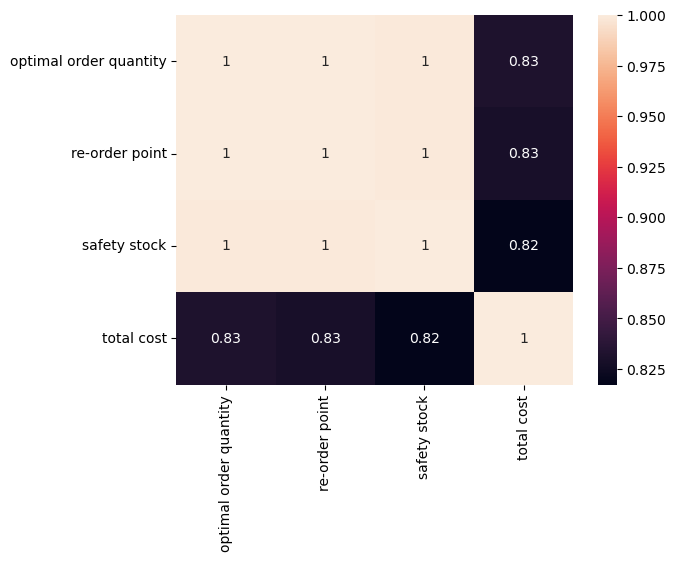

In [242]:
#CHECKING FOR ANY RELATIONSHIPS BETWEEN THESE INDICES
optimization.corr()
import seaborn as sns
sns.heatmap(optimization.corr(),annot=True)

from this heatmap we can clearly see that there is a strong relation between those inventory indices

all values are affected if any value changes

In [243]:
optimization['optimal order quantity'].nlargest(n=5)


sku_id
217390    23173
216418    12117
219009    11182
223245     9804
216419     9107
Name: optimal order quantity, dtype: int64

so these 5 product's have the highest demand as we replenish these product's inventory by ordering these large amounts from suppliers

now these 5 products are high demanding for this retail chain

In [244]:
optimization['total cost'].nlargest(n=5)


sku_id
219009    109910.31
216418     92249.02
223245     81225.83
222087     78719.84
216419     72288.25
Name: total cost, dtype: float64

there is a interesting fact is coming if we summerize all these information

among the 5 high demanding products there have 4 products such that they create also high cost

these products are :
1. 219009
2. 216418
3. 223245
4. 216419

Although they are high demanding but also creates high cost inventory

In [245]:
optimization['total cost'].nsmallest(n=5)


sku_id
545621     228.28
673209     550.00
327492     616.96
600934    2181.88
679023    2205.47
Name: total cost, dtype: float64

these products are of low cost but if they have high demand?
let's see

In [246]:
optimization['re-order point'].where(optimization.index==545621)
optimization['re-order point'].where(optimization.index==673209)
optimization['re-order point'].where(optimization.index==327492)
optimization['re-order point'].where(optimization.index==600934)
optimization['re-order point'].where(optimization.index==679023)

# we see that they are not on high demand 



sku_id
216418       NaN
216419       NaN
216425       NaN
216233       NaN
217390       NaN
219009       NaN
219029       NaN
223245       NaN
223153       NaN
300021       NaN
219844       NaN
222087       NaN
320485       NaN
378934       NaN
222765       NaN
245387       NaN
245338       NaN
547934       NaN
300291       NaN
217217       NaN
217777       NaN
398721       NaN
679023    273.42
546789       NaN
600934       NaN
545621       NaN
673209       NaN
327492       NaN
Name: re-order point, dtype: float64